In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
import torch.optim as optim
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Baseline analysis 

In [2]:
# Load dataset
filename = "./data/wine.csv"
df = pd.read_csv(filename)
df = df.drop('index', axis=1)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
# !pip install seaborn

In [4]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

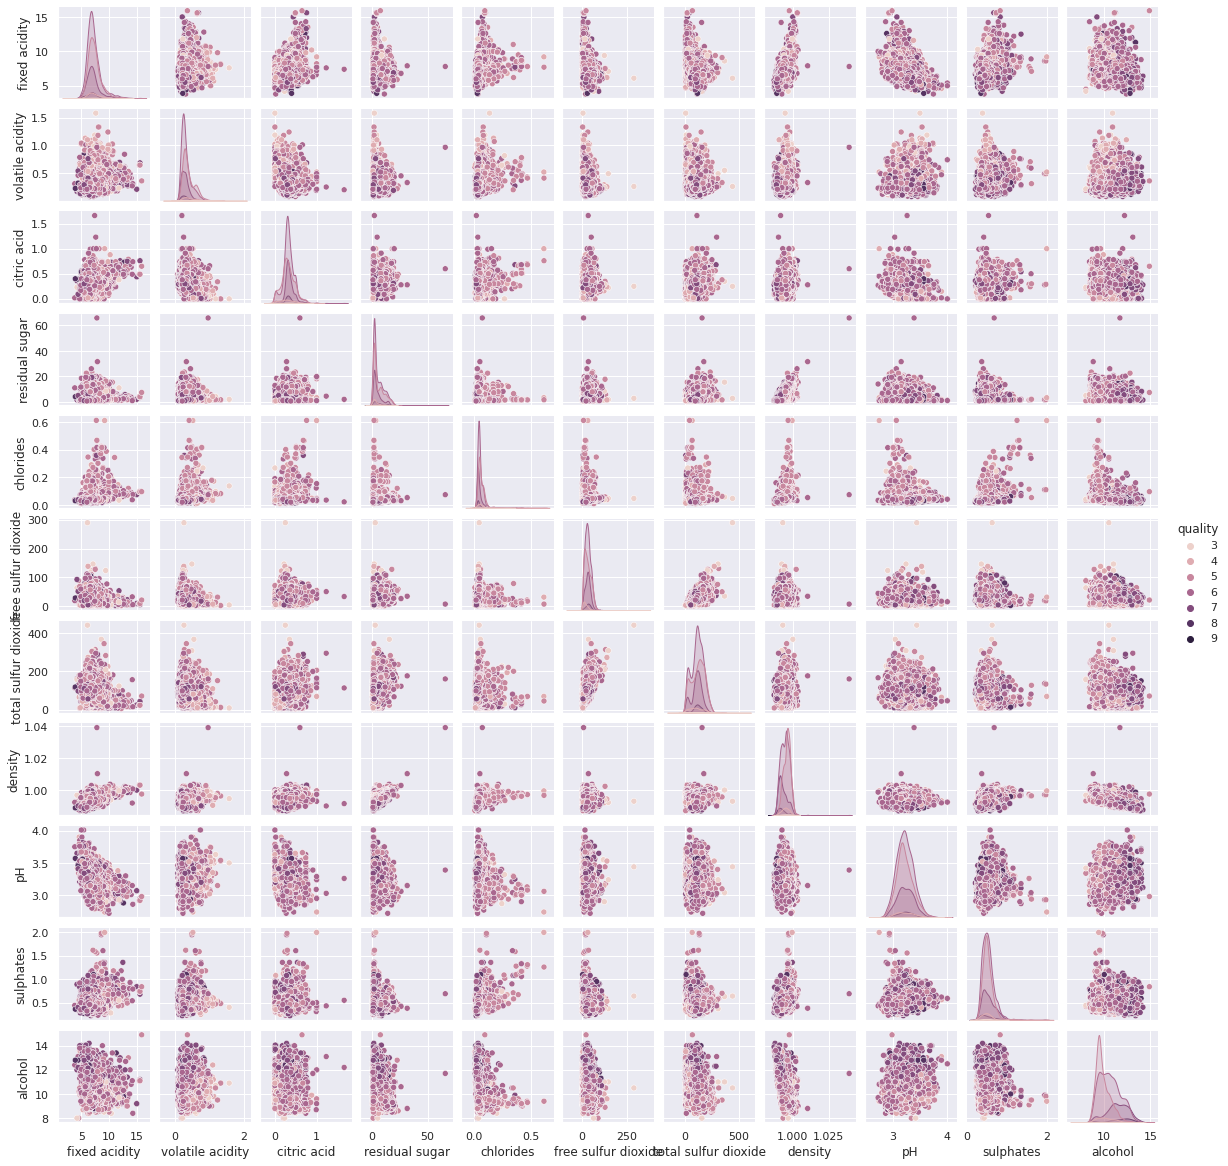

In [5]:
import seaborn as sns 
sns.set()
sns.pairplot(df, hue='quality', height=1.5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [7]:
print(df.shape)
print(df["quality"].value_counts())

(6497, 12)
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


<AxesSubplot:title={'center':'count'}>

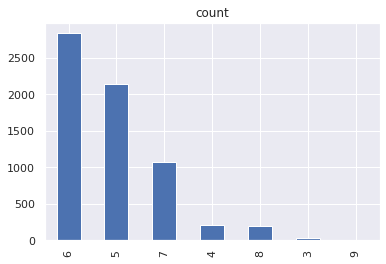

In [8]:
# plotting the labels
sample_count = df['quality'].value_counts()
sample_count.plot(kind='bar', title='count')

In [9]:
print(df.isnull().sum()) 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# machine learning : classifier

In [10]:
# separating target from features
features = df.drop('quality', axis=1)
target = df['quality']

In [11]:
X = np.array(features)
X.shape

(6497, 11)

In [12]:
y = np.array(target)
y.shape

(6497,)

In [13]:
# splitting to test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


## ML : Randomforest classifier 

In [15]:
# using the Random Forest to model
from sklearn.ensemble import RandomForestClassifier

In [16]:
#initiate the model
clf = RandomForestClassifier()

In [17]:
# fit and score
clf.fit(X_train, y_train)
clf.score(X_train, y_train) #1.0 :it overfits the training data set??? 

1.0

In [18]:
# score test set
clf.score(X_test, y_test)

0.68

In [19]:
clf.estimators_    #estimators_list of DecisionTreeClassifier
                         #The collection of fitted sub-estimators.

[DecisionTreeClassifier(max_features='auto', random_state=220820877),
 DecisionTreeClassifier(max_features='auto', random_state=673426947),
 DecisionTreeClassifier(max_features='auto', random_state=1015997151),
 DecisionTreeClassifier(max_features='auto', random_state=1941661623),
 DecisionTreeClassifier(max_features='auto', random_state=1889831076),
 DecisionTreeClassifier(max_features='auto', random_state=1063647116),
 DecisionTreeClassifier(max_features='auto', random_state=991668623),
 DecisionTreeClassifier(max_features='auto', random_state=1676260352),
 DecisionTreeClassifier(max_features='auto', random_state=783092618),
 DecisionTreeClassifier(max_features='auto', random_state=1425241854),
 DecisionTreeClassifier(max_features='auto', random_state=369587819),
 DecisionTreeClassifier(max_features='auto', random_state=915797358),
 DecisionTreeClassifier(max_features='auto', random_state=956216963),
 DecisionTreeClassifier(max_features='auto', random_state=156597654),
 DecisionTreeC

# Resampling the training set

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [21]:
#smote = SMOTE(sampling_strategy='minority')
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [22]:
y_train

array([8, 7, 6, ..., 9, 9, 9])

In [23]:
# plotting the labels
sample_count = np.unique(y_train, return_counts=True)
# classes = zip(*sample_count)[0]
# count = zip(*sample_count)[1]
# x_pos = np.arange(len(classes)) 
# plt.bar(x_pos, score,align='center', title = 'count')
# plt.xticks(x_pos, count)


In [24]:
sample_count

(array([3, 4, 5, 6, 7, 8, 9]),
 array([2276, 2276, 2276, 2276, 2276, 2276, 2276]))

## ML: classifiers with best parameters

### Random forest : best param and resample data

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [26]:
#using a GridSearchCv to determine the best parameters for this model
from sklearn.ensemble import RandomForestClassifier
param = {'n_estimators':[10, 20, 30, 40, 50, 100],
            'criterion':["gini", "entropy"],
            'max_depth': [1, 2, 5, 10],
            'min_samples_leaf': [1, 10, 20],
            }

In [27]:
grid = GridSearchCV(RandomForestClassifier(), param_grid= param, scoring='accuracy', cv=5)

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 10, 20],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring='accuracy')

In [29]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10)

In [30]:
grid.best_score_

0.8696344869330463

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [32]:
#initiate the model with best params
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, n_estimators= 100)

In [33]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [34]:
clf.score(X_train, y_train)

0.9226085864925935

In [35]:
y_pred = clf.predict(X_test)
y_pred

array([6, 5, 5, ..., 5, 7, 5])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)

0.5792307692307692

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.20      0.30      0.24        40
           5       0.64      0.72      0.68       444
           6       0.68      0.48      0.56       560
           7       0.45      0.65      0.53       207
           8       0.40      0.49      0.44        41

    accuracy                           0.58      1300
   macro avg       0.40      0.44      0.41      1300
weighted avg       0.60      0.58      0.58      1300



# Feature normalization

### DecisionTreeClassifier : best param and resample data

In [39]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=5)

In [40]:
# Setting all the parameters we want to test
params = {
    'max_features' : np.arange(0.1,1,0.1).tolist(), #Number of features to consider as a FRACTION of all features
    'max_depth': [1,2,4,8, None] # Depth of the tree
}

In [41]:
#using a GridSearchCv to determine the best parameters for this model
grid = GridSearchCV(decision_tree, param_grid= params, scoring='accuracy', cv=5)  # Use 5 folds  

In [42]:
# As we are also doing cross-validation on the training set, the testing set X_test is untouched
result = grid.fit(X_train, y_train)

In [43]:
result.best_estimator_

DecisionTreeClassifier(max_features=0.30000000000000004, random_state=5)

In [44]:
result.best_score_

0.906730516767053

In [45]:
result.best_params_

{'max_depth': None, 'max_features': 0.30000000000000004}

In [46]:
#initiate the model with best params 
clf_2 = DecisionTreeClassifier(random_state=5, max_depth = None, max_features = 0.5)

In [47]:
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_features=0.5, random_state=5)

In [48]:
clf_2.score(X_train, y_train)

1.0

In [49]:
y_pred_2 = clf_2.predict(X_test)
y_pred_2

array([5, 5, 6, ..., 6, 5, 6])

In [50]:
accuracy_score(y_test, y_pred_2)

0.5969230769230769

In [51]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.23      0.25      0.24        40
           5       0.67      0.64      0.65       444
           6       0.61      0.62      0.62       560
           7       0.54      0.55      0.55       207
           8       0.40      0.51      0.45        41

    accuracy                           0.60      1300
   macro avg       0.41      0.43      0.42      1300
weighted avg       0.60      0.60      0.60      1300



/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

#  Deep learning using Pytorch

In [52]:
# Creating a test/train split
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]

target = pd.get_dummies(df['quality']).values # One hot encode
target[:5]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [53]:
# Selecting the features and the target
X_train = df_train.drop('quality', axis = 1).values
X_test = df_test.drop('quality', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197, 7)
(1300, 7)


In [54]:
#change the type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [55]:
#transform into pytorch
X_train = torch.tensor(X_train)   
y_train = torch.tensor(y_train)   
X_test = torch.tensor(X_test)   
y_test = torch.tensor(y_test)

In [56]:
X_train[:5]

tensor([[7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
         3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00],
        [7.8000e+00, 8.8000e-01, 0.0000e+00, 2.6000e+00, 9.8000e-02, 2.5000e+01,
         6.7000e+01, 9.9680e-01, 3.2000e+00, 6.8000e-01, 9.8000e+00],
        [7.8000e+00, 7.6000e-01, 4.0000e-02, 2.3000e+00, 9.2000e-02, 1.5000e+01,
         5.4000e+01, 9.9700e-01, 3.2600e+00, 6.5000e-01, 9.8000e+00],
        [1.1200e+01, 2.8000e-01, 5.6000e-01, 1.9000e+00, 7.5000e-02, 1.7000e+01,
         6.0000e+01, 9.9800e-01, 3.1600e+00, 5.8000e-01, 9.8000e+00],
        [7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
         3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00]])

In [57]:
y_train[:5]

tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])

In [58]:
# the neural network architecture of our baseline
nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['quality']))
nb_classes

7

In [59]:
import torch.nn as nn

class Network(nn.Module):

    def __init__(self, nb_features):    
        """Here we define the layers
        """

        super().__init__()
        
        self.layer_1 = nn.Linear(nb_features,nb_hidden_neurons)  
        self.layer_2 = nn.Linear(nb_hidden_neurons,nb_hidden_neurons) 
        self.layer_3 = nn.Linear(nb_hidden_neurons,nb_classes) 
        
        

    def forward(self,x):   #forward pass of the neural network learning process
        """Here we combine the layers
        ReLU activation function for the first layers 
        Softmax activation function for the last layer
        """
        
        activation_function = nn.ReLU() 
        last_layer_activation = nn.Softmax(dim=1)
        
        output_first_layer = activation_function(self.layer_1(x)) 
        output_second_layer = activation_function(self.layer_2(output_first_layer)) 
        prediction = last_layer_activation(self.layer_3(output_second_layer))
        return prediction

In [60]:
my_nn = Network(nb_features=X_train.shape[1])
my_nn

Network(
  (layer_1): Linear(in_features=11, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=7, bias=True)
)

In [61]:
import torch.optim
# we define the criterion by which the cost is calculated, 
    #our learning rate and our optimizer, MSELoss, 0.001 and Adam, respectiely.
criterion = nn.MSELoss()    #criterion = loss
learning_rate = 0.001       
optimizer = optim.Adam(my_nn.parameters(), lr=learning_rate ) #Adam optimizer 

In [62]:
#training process
def training(batch_size : int, nb_steps_loss_sum : int):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,10): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):  
            
            # To Get input and output
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
#             print(target)
            
            optimizer.zero_grad() # - zero gradient buffers
            outputs =  my_nn.forward(input_batch) # - to compute the forward pass
#             print(outputs)
            loss = criterion(outputs,target) # - to compute the loss
            loss.backward() # - backpropagate
            optimizer.step() # - to do a step
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb+= 1
        
    return loss_list


/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


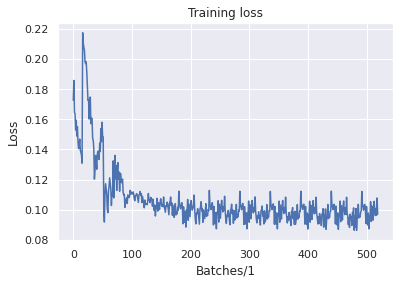

In [63]:
nb_steps_loss_sum = 1
loss = training(batch_size=100, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()
plt.close()

In [64]:
len(loss)

520

In [65]:
def computeScore(X, y):
    correct = 0
    total = y.shape[0]   #we are doing prediction on all items in one shot
    batch_size = 1
    with torch.no_grad():
        # TO COMPLETE:
    
        # - compute the prediction of the neural network
        output = my_nn.forward(X)  
        # - get the max of the prediction (e.g. get the most likely class) (to do)
        # This can be done using `torch.max`.
        _,predicted = torch.max(output,1)    #predicted = predicted index of the max value and '_' for the max value, we could give another name to the variable (ex: a) instead of '_'...only working with tuple like this output : https://pytorch.org/docs/stable/generated/torch.max.html
        # - get the max of the target (e.g. correct class)
        _,target_pred = torch.max(y,1)

        # - check if the prediction is correct and count it
#             correct += (predicted == target_pred).sum().item() 

#         print(predicted)
#         print(target_pred)

        for idx in range(0, X.shape[0], batch_size):
            if predicted[idx] == target_pred[idx]:
                correct += 1

        # - count every sample

    accuracy = correct/total * 100
    print(f"Accuracy of the network on the {total} samples: {accuracy:.2f}%")
    

In [66]:
computeScore(X_train, y_train)
computeScore(X_test, y_test)

Accuracy of the network on the 5197 samples: 41.95%
Accuracy of the network on the 1300 samples: 50.31%


# Using resampled data

In [68]:
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [69]:
# separating target from features
features_2 = df.drop('quality', axis=1)
target_2 = pd.get_dummies(df['quality']).values # One hot encode


In [70]:
target_2

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [71]:
X = np.array(features_2)
X.shape

(6497, 11)

In [72]:
y = np.array(target_2)
y.shape

(6497, 7)

In [73]:
# splitting to test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197, 7)
(1300, 7)


In [75]:
#smote = SMOTE(sampling_strategy='minority')
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4 5 6] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [76]:
#change the type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
#transform into pytorch
X_train = torch.tensor(X_train)   
y_train = torch.tensor(y_train)   
X_test = torch.tensor(X_test)   
y_test = torch.tensor(y_test)

In [77]:
X_train.size()

torch.Size([15904, 11])

In [78]:
y_train.size()

torch.Size([15904, 7])

In [79]:
y_train[0]

tensor([0., 0., 1., 0., 0., 0., 0.])

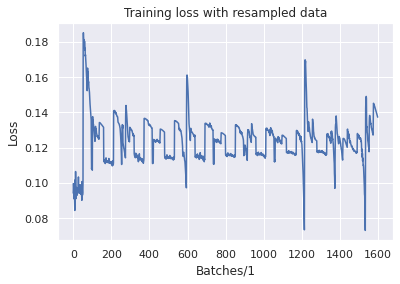

In [80]:
nb_steps_loss_sum = 1
loss = training(batch_size=100, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss with resampled data")
plt.show()
plt.close()

In [81]:
computeScore(X_train, y_train)
computeScore(X_test, y_test)

Accuracy of the network on the 15904 samples: 14.29%
Accuracy of the network on the 1300 samples: 3.38%


# Deep learning using hyperparameters optimizer RayTune

In [3]:
import torch.optim
import torch.nn as nn
from ray import tune
#!conda install -c conda-forge ray-tune

In [4]:
# Creating a test/train split
train_test_split_fraction = 0.80
split_index = int(df.shape[0] * train_test_split_fraction)
df_train = df[:split_index]
df_test = df[split_index:]

target = pd.get_dummies(df['quality']).values # One hot encode

# Selecting the features and the target
X_train = df_train.drop('quality', axis = 1).values
X_test = df_test.drop('quality', axis = 1).values

y_train = target[:split_index]
y_test = target[split_index:]

#change the type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

#transform into pytorch
X_train = torch.tensor(X_train)   
y_train = torch.tensor(y_train)   
X_test = torch.tensor(X_test)   
y_test = torch.tensor(y_test)

nb_classes = len(pd.unique(df['quality']))
nb_classes

7

In [5]:
import torch.nn as nn

class Network(nn.Module):

    def __init__(self, nb_features, nb_hidden_neurons):    
        """Here we define the layers
        """

        super().__init__()
        
        self.layer_1 = nn.Linear(nb_features,nb_hidden_neurons)  
        self.layer_2 = nn.Linear(nb_hidden_neurons,nb_hidden_neurons) 
        self.layer_last = nn.Linear(nb_hidden_neurons,nb_classes) 
        
        

    def forward(self,x, nb_hidden_layers, activation_function):   #forward pass of the neural network learning process
        """Here we combine the layers

        """
        
        activation_function = nn.ReLU() 
        last_layer_activation = nn.Softmax()
        
        output_first_layer = activation_function(self.layer_1(x)) 
        output_hidden_layer = activation_function(self.layer_2(output_first_layer))
        for i in range(1, nb_hidden_layers):
            output_hidden_layer = activation_function(self.layer_2(output_hidden_layer))
            
        prediction = last_layer_activation(self.layer_last(output_hidden_layer))
        return prediction

In [6]:
def test(X,y,config, checkpoint_dir=None):
    my_nn = Network(nb_features=X_train.shape[1], nb_hidden_neurons=config['hidden_neuron'])
    correct = 0
    total = 0
    batch_size = config['batch_size']
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):
            
            total +=1
            
            output = my_nn(X.float(), nb_hidden_layers = config['nb_layers'], activation_function = config['activation'] )
            
            predicted = torch.max(output, 1)
            
            target_pred = torch.max(y, 1)
            
            if predicted[1][idx] == target_pred[1][idx]:
                correct += 1
                
    accuracy = correct/total
    return accuracy

In [7]:
#training process
def training(config, checkpoint_dir=None):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """
    
    nb_steps_loss_sum = 10
    my_nn = Network(nb_features=X_train.shape[1], nb_hidden_neurons=config['hidden_neuron'])
    loss_list = []
    running_loss = 0
    batch_nb = 0
    
    # we define the criterion by which the cost is calculated, 
        #our learning rate and our optimizer(Adam), MSELoss
    
    criterion = nn.MSELoss()              #criterion = loss
    batch_size = config['batch_size']
    learning_rate = config['lr']       
    optimizer = optim.Adam(my_nn.parameters(), lr=learning_rate ) #Adam optimizer 
    

    for epoch in range(0,config['epoch']):       # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):  
            
            # To Get input and output
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
#             print(target)
            
            optimizer.zero_grad()           # - zero gradient buffers
            
            y_pred =  my_nn(input_batch.float(), nb_hidden_layers = config['nb_layers'], activation_function = config['activation'] )    # - to compute the forward pass
#             print(outputs)
            
            loss = criterion(y_pred,target.float())     # - to compute the loss
            loss.backward()         # - backpropagate
            optimizer.step()        # - to do a step
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb+= 1
        
    tune.report(mean_loss=abs(loss_list[len(loss_list)-1]))   #to take as the mean loss, the last element of the list_loss
    #acc_train = test(X_train, y_train, config)
    #acc_test = test(X_test, Y_test, config)
    #tune.report(acc_train=acc_train, acc_test=acc_test)

In [8]:
search_space = {
    'lr': tune.grid_search([0.001, 0.01, 0.1, 1]),
    'hidden_neuron': tune.grid_search([20,40, 50, 100, 200]),
    'epoch' : tune.grid_search([10, 20, 50]),
    'batch_size': tune.grid_search([20, 30]),
    'nb_layers': tune.grid_search([3, 5, 6]),
    'activation': tune.grid_search([nn.SiLU(), nn.ReLU()])
    
}
analysis = tune.run(training, config=search_space)

2021-03-04 12:45:52,964	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


2021-03-04 12:45:55,577	WARNING worker.py:1091 -- The dashboard on node abdellah-Latitude-E7270 failed with the following error:
Traceback (most recent call last):
  File "/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/ray/dashboard/dashboard.py", line 961, in <module>
    metrics_export_address=metrics_export_address)
  File "/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/ray/dashboard/dashboard.py", line 512, in __init__
    build_dir = setup_static_dir(self.app)
  File "/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/ray/dashboard/dashboard.py", line 411, in setup_static_dir
    "&& npm run build)", build_dir)
FileNotFoundError: [Errno 2] Dashboard build directory not found. If installing from source, please follow the additional steps required to build the dashboard(cd python/ray/dashboard/client && npm ci && npm run build): '/home/abdellah/anaconda3/envs/pytorch/lib/python3.7/site-packages/ray/dashboard/client/build'

Result 

2021-03-04 12:46:08,103	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:46:08,935	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00003:
  date: 2021-03-04_12-46-08
  done: false
  experiment_id: 22bdc1f67e2c41df9c1d81fc6a0869ae
  experiment_tag: 3_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9457506611943245
  neg_mean_loss: -0.9457506611943245
  node_ip: 192.168.1.21
  pid: 4936
  time_since_restore: 9.630306959152222
  time_this_iter_s: 9.630306959152222
  time_total_s: 9.630306959152222
  timestamp: 1614858368
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00003
  
Result for training_2dc0f_00001:
  date: 2021-03-04_12-46-14
  done: false
  experiment_id: 6dda3f75a7424

2021-03-04 12:46:14,804	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:46:15,735	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00000:
  date: 2021-03-04_12-46-15
  done: false
  experiment_id: 71015f56ec6b42fa885dec3535890032
  experiment_tag: 0_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9691652953624725
  neg_mean_loss: -0.9691652953624725
  node_ip: 192.168.1.21
  pid: 4937
  time_since_restore: 15.710330724716187
  time_this_iter_s: 15.710330724716187
  time_total_s: 15.710330724716187
  timestamp: 1614858375
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00000
  
Result for training_2dc0f_00007:
  date: 2021-03-04_12-46-41
  done: false
  experiment_id: c8b3b0528d

2021-03-04 12:46:41,184	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:46:42,418	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00006:
  date: 2021-03-04_12-46-42
  done: false
  experiment_id: 59dfd691eee64c10912af9ceb1bde7a5
  experiment_tag: 6_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8979954868555069
  neg_mean_loss: -0.8979954868555069
  node_ip: 192.168.1.21
  pid: 5169
  time_since_restore: 20.172345399856567
  time_this_iter_s: 20.172345399856567
  time_total_s: 20.172345399856567
  timestamp: 1614858402
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00006
  
2021-03-04 12:46:43,603	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 12:46:46,802	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00010:
  date: 2021-03-04_12-47-35
  done: false
  experiment_id: 9cc8fc77364b46cfaa247372b0bb84e6
  experiment_tag: 10_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8204496204853058
  neg_mean_loss: -0.8204496204853058
  node_ip: 192.168.1.21
  pid: 5289
  time_since_restore: 46.1459014415741
  time_this_iter_s: 46.1459014415741
  time_total_s: 46.1459014415741
  timestamp: 1614858455
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00010
  


2021-03-04 12:47:35,474	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00011:
  date: 2021-03-04_12-47-35
  done: false
  experiment_id: 557f0943170f48148b17fe1952d47482
  experiment_tag: 11_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.7998350821435452
  neg_mean_loss: -0.7998350821435452
  node_ip: 192.168.1.21
  pid: 5405
  time_since_restore: 43.58100628852844
  time_this_iter_s: 43.58100628852844
  time_total_s: 43.58100628852844
  timestamp: 1614858455
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00011
  
2021-03-04 12:47:35,555	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00012:
  date: 2021-03-04_12-47-54
  done: false
  experiment_id: 7fe566090516

2021-03-04 12:47:54,547	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:47:54,922	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff7e59d01501000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 12:47:55,661	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 12:48:02,013	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:48:02,548	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00009:
  date: 2021-03-04_12-48-02
  done: false
  experiment_id: ad6b7503af304ddea628d0fc7eae088f
  experiment_tag: 9_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.843249436467886
  neg_mean_loss: -0.843249436467886
  node_ip: 192.168.1.21
  pid: 5307
  time_since_restore: 73.71047925949097
  time_this_iter_s: 73.71047925949097
  time_total_s: 73.71047925949097
  timestamp: 1614858482
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00009
  
Result for training_2dc0f_00014:
  date: 2021-03-04_12-48-11
  done: false
  experiment_id: 3f574bc5db8248b

2021-03-04 12:48:12,176	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:48:13,786	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00015:
  date: 2021-03-04_12-48-13
  done: false
  experiment_id: 12dbac55b4d14a2e85db0df4c2277885
  experiment_tag: 15_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9359941110014915
  neg_mean_loss: -0.9359941110014915
  node_ip: 192.168.1.21
  pid: 5555
  time_since_restore: 12.151813268661499
  time_this_iter_s: 12.151813268661499
  time_total_s: 12.151813268661499
  timestamp: 1614858493
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00015
  
Result for training_2dc0f_00018:
  date: 2021-03-04_12-48-35
  done: false
  experiment_id: 41ff32080

2021-03-04 12:48:35,498	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:48:36,124	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00017:
  date: 2021-03-04_12-48-36
  done: false
  experiment_id: 041694e749c54d249a2292fe835b83fa
  experiment_tag: 17_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9273796081542969
  neg_mean_loss: -0.9273796081542969
  node_ip: 192.168.1.21
  pid: 5657
  time_since_restore: 27.98387122154236
  time_this_iter_s: 27.98387122154236
  time_total_s: 27.98387122154236
  timestamp: 1614858516
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00017
  
2021-03-04 12:48:38,033	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 12:48:40,906	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00022:
  date: 2021-03-04_12-49-17
  done: false
  experiment_id: 05b895cb39c840eebafb7a70f3fac322
  experiment_tag: 22_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.7993527576327324
  neg_mean_loss: -0.7993527576327324
  node_ip: 192.168.1.21
  pid: 5810
  time_since_restore: 34.43385148048401
  time_this_iter_s: 34.43385148048401
  time_total_s: 34.43385148048401
  timestamp: 1614858557
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00022
  


2021-03-04 12:49:17,729	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00023:
  date: 2021-03-04_12-49-25
  done: false
  experiment_id: 1160d0a3ba87451490ce7cd8a238c4ae
  experiment_tag: 23_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8393892869353294
  neg_mean_loss: -0.8393892869353294
  node_ip: 192.168.1.21
  pid: 5911
  time_since_restore: 40.183703660964966
  time_this_iter_s: 40.183703660964966
  time_total_s: 40.183703660964966
  timestamp: 1614858565
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00023
  


2021-03-04 12:49:25,982	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00024:
  date: 2021-03-04_12-49-39
  done: false
  experiment_id: d15f12d66bde40b2aacc82c176d5cf0b
  experiment_tag: 24_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9457138627767563
  neg_mean_loss: -0.9457138627767563
  node_ip: 192.168.1.21
  pid: 5952
  time_since_restore: 16.135501623153687
  time_this_iter_s: 16.135501623153687
  time_total_s: 16.135501623153687
  timestamp: 1614858579
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00024
  


2021-03-04 12:49:39,893	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:49:44,674	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00021:
  date: 2021-03-04_12-49-44
  done: false
  experiment_id: b5ab2ba3e5094d2596bf1fa85e303e9d
  experiment_tag: 21_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8129122070968151
  neg_mean_loss: -0.8129122070968151
  node_ip: 192.168.1.21
  pid: 5816
  time_since_restore: 61.85061264038086
  time_this_iter_s: 61.85061264038086
  time_total_s: 61.85061264038086
  timestamp: 1614858584
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00021
  
2021-03-04 12:49:45,539	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffb2f6975d0100

2021-03-04 12:49:46,951	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:49:47,515	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00020:
  date: 2021-03-04_12-49-47
  done: false
  experiment_id: e61668535cf3408bb1414a0856641282
  experiment_tag: 20_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8516194671392441
  neg_mean_loss: -0.8516194671392441
  node_ip: 192.168.1.21
  pid: 5818
  time_since_restore: 63.649967193603516
  time_this_iter_s: 63.649967193603516
  time_total_s: 63.649967193603516
  timestamp: 1614858587
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00020
  
Result for training_2dc0f_00026:
  date: 2021-03-04_12-49-57
  done: false
  experiment_id: 75b983c88

2021-03-04 12:49:57,331	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00027:
  date: 2021-03-04_12-50-03
  done: false
  experiment_id: 245a7d09b55b44f8beeb7823d32b7137
  experiment_tag: 27_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.976226881146431
  neg_mean_loss: -0.976226881146431
  node_ip: 192.168.1.21
  pid: 6033
  time_since_restore: 11.286216259002686
  time_this_iter_s: 11.286216259002686
  time_total_s: 11.286216259002686
  timestamp: 1614858603
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00027
  


2021-03-04 12:50:03,728	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00029:
  date: 2021-03-04_12-50-21
  done: false
  experiment_id: 802dd9f254aa4f349a02810f782267ef
  experiment_tag: 29_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9074288532137871
  neg_mean_loss: -0.9074288532137871
  node_ip: 192.168.1.21
  pid: 6054
  time_since_restore: 27.86235022544861
  time_this_iter_s: 27.86235022544861
  time_total_s: 27.86235022544861
  timestamp: 1614858621
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00029
  


2021-03-04 12:50:21,717	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:50:23,868	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00030:
  date: 2021-03-04_12-50-23
  done: false
  experiment_id: 97ebadae72a848ee960160ce14a2fbcc
  experiment_tag: 30_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8461551517248154
  neg_mean_loss: -0.8461551517248154
  node_ip: 192.168.1.21
  pid: 6162
  time_since_restore: 21.39339518547058
  time_this_iter_s: 21.39339518547058
  time_total_s: 21.39339518547058
  timestamp: 1614858623
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00030
  
Result for training_2dc0f_00031:
  date: 2021-03-04_12-50-28
  done: false
  experiment_id: 15c0288c7009

2021-03-04 12:50:28,531	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:50:30,305	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00028:
  date: 2021-03-04_12-50-30
  done: false
  experiment_id: 4e549f2ef8c54921be18ef6b26f18503
  experiment_tag: 28_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9030292183160782
  neg_mean_loss: -0.9030292183160782
  node_ip: 192.168.1.21
  pid: 6060
  time_since_restore: 35.79485535621643
  time_this_iter_s: 35.79485535621643
  time_total_s: 35.79485535621643
  timestamp: 1614858630
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00028
  
Result for training_2dc0f_00034:
  date: 2021-03-04_12-51-25
  done: false
  experiment_id: 1074129013af

2021-03-04 12:51:25,370	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:51:26,147	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff25eb8b3501000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 12:51:27,617	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 12:51:37,664	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00033:
  date: 2021-03-04_12-51-48
  done: false
  experiment_id: 4371f9992778499abfcfd7c88f5c7157
  experiment_tag: 33_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8105412870645523
  neg_mean_loss: -0.8105412870645523
  node_ip: 192.168.1.21
  pid: 6227
  time_since_restore: 77.35937285423279
  time_this_iter_s: 77.35937285423279
  time_total_s: 77.35937285423279
  timestamp: 1614858708
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00033
  
2021-03-04 12:51:49,112	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.5820231437683105 seconds to complete, which may be a performance bottleneck.


2021-03-04 12:51:49,234	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:51:49,339	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00036:
  date: 2021-03-04_12-51-49
  done: false
  experiment_id: d632d1a8d8ec4d2b903f5b279a2d9759
  experiment_tag: 36_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9431256428360939
  neg_mean_loss: -0.9431256428360939
  node_ip: 192.168.1.21
  pid: 6347
  time_since_restore: 18.002531051635742
  time_this_iter_s: 18.002531051635742
  time_total_s: 18.002531051635742
  timestamp: 1614858709
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00036
  
2021-03-04 12:51:53,738	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 12:51:55,622	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00039:
  date: 2021-03-04_12-52-10
  done: false
  experiment_id: cd16d44e136844728698f8c84b7db754
  experiment_tag: 39_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9184903129935265
  neg_mean_loss: -0.9184903129935265
  node_ip: 192.168.1.21
  pid: 6433
  time_since_restore: 12.986807584762573
  time_this_iter_s: 12.986807584762573
  time_total_s: 12.986807584762573
  timestamp: 1614858730
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00039
  


2021-03-04 12:52:10,893	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00042:
  date: 2021-03-04_12-52-28
  done: false
  experiment_id: 84fdddbbdca6433e8e0de562df526772
  experiment_tag: 42_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8900450319051743
  neg_mean_loss: -0.8900450319051743
  node_ip: 192.168.1.21
  pid: 6547
  time_since_restore: 28.285154104232788
  time_this_iter_s: 28.285154104232788
  time_total_s: 28.285154104232788
  timestamp: 1614858748
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00042
  


2021-03-04 12:52:29,226	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00041:
  date: 2021-03-04_12-52-37
  done: false
  experiment_id: 0804065c71b940babfc829cc607d7a81
  experiment_tag: 41_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8873150125145912
  neg_mean_loss: -0.8873150125145912
  node_ip: 192.168.1.21
  pid: 6527
  time_since_restore: 36.78120827674866
  time_this_iter_s: 36.78120827674866
  time_total_s: 36.78120827674866
  timestamp: 1614858757
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00041
  


2021-03-04 12:52:37,309	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:52:38,528	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00040:
  date: 2021-03-04_12-52-38
  done: false
  experiment_id: 2712396a02c24c188643e9a3cb9aa57c
  experiment_tag: 40_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8793422989547253
  neg_mean_loss: -0.8793422989547253
  node_ip: 192.168.1.21
  pid: 6431
  time_since_restore: 41.536948442459106
  time_this_iter_s: 41.536948442459106
  time_total_s: 41.536948442459106
  timestamp: 1614858758
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00040
  
Result for training_2dc0f_00043:
  date: 2021-03-04_12-52-43
  done: false
  experiment_id: ca887cf9

2021-03-04 12:52:43,751	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00046:
  date: 2021-03-04_12-53-42
  done: false
  experiment_id: 7614699b9b094747ba2d8c5aac000652
  experiment_tag: 46_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.7768418937921524
  neg_mean_loss: -0.7768418937921524
  node_ip: 192.168.1.21
  pid: 6636
  time_since_restore: 58.333455324172974
  time_this_iter_s: 58.333455324172974
  time_total_s: 58.333455324172974
  timestamp: 1614858822
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00046
  
2021-03-04 12:53:43,601	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.7757644653320312 seconds to complete, which may be a performance bottleneck.


2021-03-04 12:53:43,660	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00047:
  date: 2021-03-04_12-53-52
  done: false
  experiment_id: 857fc6e45c2c40b1858ef35b10b64730
  experiment_tag: 47_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.830673098564148
  neg_mean_loss: -0.830673098564148
  node_ip: 192.168.1.21
  pid: 6730
  time_since_restore: 62.15200853347778
  time_this_iter_s: 62.15200853347778
  time_total_s: 62.15200853347778
  timestamp: 1614858832
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00047
  


2021-03-04 12:53:52,863	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:53:54,044	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.1660206317901611 seconds to complete, which may be a performance bottleneck.
Result for training_2dc0f_00044:
  date: 2021-03-04_12-54-09
  done: false
  experiment_id: f40945cca3614274a063bc752eb18972
  experiment_tag: 44_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.77833491563797
  neg_mean_loss: -0.77833491563797
  node_ip: 192.168.1.21
  pid: 6607
  time_since_restore: 93.03686380386353
  time_this_iter_s: 93.03686380386353
  time_total_s: 93.03686380386353
  timestamp: 1614858849
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00044
  
2021-03-04 12:54:10,257	WARNING util.py:140 -- The `experiment_checkpoint` opera

2021-03-04 12:54:10,351	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00048:
  date: 2021-03-04_12-54-16
  done: false
  experiment_id: 2acb943c472741aeb0811b195915444e
  experiment_tag: 48_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9348596334457397
  neg_mean_loss: -0.9348596334457397
  node_ip: 192.168.1.21
  pid: 6808
  time_since_restore: 27.452261447906494
  time_this_iter_s: 27.452261447906494
  time_total_s: 27.452261447906494
  timestamp: 1614858856
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00048
  


2021-03-04 12:54:16,657	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00045:
  date: 2021-03-04_12-54-23
  done: false
  experiment_id: 8f04edbddab444e08576c3c1b2216f20
  experiment_tag: 45_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.7958620376884937
  neg_mean_loss: -0.7958620376884937
  node_ip: 192.168.1.21
  pid: 6631
  time_since_restore: 99.0373101234436
  time_this_iter_s: 99.0373101234436
  time_total_s: 99.0373101234436
  timestamp: 1614858863
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00045
  
2021-03-04 12:54:24,553	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.2113640308380127 seconds to complete, which may be a performance bottleneck.


2021-03-04 12:54:24,713	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:54:28,286	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00049:
  date: 2021-03-04_12-54-28
  done: false
  experiment_id: 173fed284e17443595a643661b0b5ccf
  experiment_tag: 49_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9418899565935135
  neg_mean_loss: -0.9418899565935135
  node_ip: 192.168.1.21
  pid: 6832
  time_since_restore: 27.61760663986206
  time_this_iter_s: 27.61760663986206
  time_total_s: 27.61760663986206
  timestamp: 1614858868
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00049
  
Result for training_2dc0f_00050:
  date: 2021-03-04_12-54-42
  done: false
  experiment_id: 2ae7d42bb93

2021-03-04 12:54:42,986	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:54:46,393	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00051:
  date: 2021-03-04_12-54-46
  done: false
  experiment_id: e9132a19a67c4f4f815c6c66988b3de2
  experiment_tag: 51_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9614636600017548
  neg_mean_loss: -0.9614636600017548
  node_ip: 192.168.1.21
  pid: 6878
  time_since_restore: 24.321134328842163
  time_this_iter_s: 24.321134328842163
  time_total_s: 24.321134328842163
  timestamp: 1614858886
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00051
  
Result for training_2dc0f_00054:
  date: 2021-03-04_12-55-30
  done: false
  experiment_id: a1ebea6f

2021-03-04 12:55:31,426	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:55:33,303	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00053:
  date: 2021-03-04_12-55-33
  done: false
  experiment_id: 7b2f3bf8c20a4460a87432f91476f505
  experiment_tag: 53_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8972289934754372
  neg_mean_loss: -0.8972289934754372
  node_ip: 192.168.1.21
  pid: 6940
  time_since_restore: 58.19519758224487
  time_this_iter_s: 58.19519758224487
  time_total_s: 58.19519758224487
  timestamp: 1614858933
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00053
  
2021-03-04 12:55:34,587	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 12:57:21,079	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:57:24,008	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00058:
  date: 2021-03-04_12-57-23
  done: false
  experiment_id: c8ab40c576714e9783e8a3941f937ac4
  experiment_tag: 58_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.7536989450454712
  neg_mean_loss: -0.7536989450454712
  node_ip: 192.168.1.21
  pid: 7045
  time_since_restore: 103.20469069480896
  time_this_iter_s: 103.20469069480896
  time_total_s: 103.20469069480896
  timestamp: 1614859043
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00058
  
Result for training_2dc0f_00060:
  date: 2021-03-04_12-57-46
  done: false
  experiment_id: 6725509e

2021-03-04 12:57:47,560	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:57:47,845	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00061:
  date: 2021-03-04_12-57-47
  done: false
  experiment_id: b98d5fb2717b4986ba4ca640305244b3
  experiment_tag: 61_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9962327033281326
  neg_mean_loss: -0.9962327033281326
  node_ip: 192.168.1.21
  pid: 7200
  time_since_restore: 17.21122932434082
  time_this_iter_s: 17.21122932434082
  time_total_s: 17.21122932434082
  timestamp: 1614859067
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00061
  
Result for training_2dc0f_00063:
  date: 2021-03-04_12-58-03
  done: false
  experiment_id: 6ee11a563e3e4

2021-03-04 12:58:04,408	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 12:58:04,538	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00057:
  date: 2021-03-04_12-58-03
  done: false
  experiment_id: 8c1c60143fa24ce2aa9905d67822a743
  experiment_tag: 57_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8016366325318813
  neg_mean_loss: -0.8016366325318813
  node_ip: 192.168.1.21
  pid: 7040
  time_since_restore: 143.89968061447144
  time_this_iter_s: 143.89968061447144
  time_total_s: 143.89968061447144
  timestamp: 1614859083
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00057
  
Result for training_2dc0f_00062:
  date: 2021-03-04_12-58-10
  done: false
  experiment_id: bcb7e58c

2021-03-04 12:58:10,202	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00056:
  date: 2021-03-04_12-58-14
  done: false
  experiment_id: 6040a273810e4874a75ad6f44d0cee91
  experiment_tag: 56_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.782076682895422
  neg_mean_loss: -0.782076682895422
  node_ip: 192.168.1.21
  pid: 7020
  time_since_restore: 154.66413402557373
  time_this_iter_s: 154.66413402557373
  time_total_s: 154.66413402557373
  timestamp: 1614859094
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00056
  
2021-03-04 12:58:14,779	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.614403247833252 seconds to complete, which may be a performance bottleneck.
2021-03-04 12:58:14,787	INFO logger.py:285 -- Removed the following hyperpar

2021-03-04 12:58:36,757	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:58:41,558	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00067:
  date: 2021-03-04_12-58-41
  done: false
  experiment_id: fafc0c64a221489097d9ba3b2bcfb387
  experiment_tag: 67_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9887694641947746
  neg_mean_loss: -0.9887694641947746
  node_ip: 192.168.1.21
  pid: 7465
  time_since_restore: 19.830625295639038
  time_this_iter_s: 19.830625295639038
  time_total_s: 19.830625295639038
  timestamp: 1614859121
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00067
  
Result for training_2dc0f_00065:
  date: 2021-03-04_12-58-47
  done: false
  experiment_id: 8065034cf8

2021-03-04 12:58:48,853	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:58:48,949	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00064:
  date: 2021-03-04_12-58-48
  done: false
  experiment_id: 032067f950c24ea285c5cd6ab7081219
  experiment_tag: 64_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975363984704018
  neg_mean_loss: -0.9975363984704018
  node_ip: 192.168.1.21
  pid: 7345
  time_since_restore: 36.14263200759888
  time_this_iter_s: 36.14263200759888
  time_total_s: 36.14263200759888
  timestamp: 1614859128
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00064
  
2021-03-04 12:58:49,084	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff168502d201000

2021-03-04 12:59:49,004	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 12:59:49,316	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00071:
  date: 2021-03-04_12-59-49
  done: false
  experiment_id: 74e3b4548c2c4b38a838112894a4ac8e
  experiment_tag: 71_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886174499988556
  neg_mean_loss: -0.9886174499988556
  node_ip: 192.168.1.21
  pid: 7571
  time_since_restore: 54.36127018928528
  time_this_iter_s: 54.36127018928528
  time_total_s: 54.36127018928528
  timestamp: 1614859189
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00071
  
Result for training_2dc0f_00068:
  date: 2021-03-04_13-00-00
  done: false
  experiment_id: 2f5efb3ee9974

2021-03-04 13:00:01,301	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:00:02,895	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00069:
  date: 2021-03-04_13-00-02
  done: false
  experiment_id: d71273c63ef444219f9d7bf75a67f2a9
  experiment_tag: 69_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975166320800781
  neg_mean_loss: -0.9975166320800781
  node_ip: 192.168.1.21
  pid: 7522
  time_since_restore: 74.59290528297424
  time_this_iter_s: 74.59290528297424
  time_total_s: 74.59290528297424
  timestamp: 1614859202
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00069
  
Result for training_2dc0f_00072:
  date: 2021-03-04_13-00-12
  done: false
  experiment_id: bad5b45b96ac4

2021-03-04 13:00:13,549	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:00:14,354	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00073:
  date: 2021-03-04_13-00-14
  done: false
  experiment_id: c560c1313c8542c1aceb1b397b668206
  experiment_tag: 73_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9968044757843018
  neg_mean_loss: -0.9968044757843018
  node_ip: 192.168.1.21
  pid: 7682
  time_since_restore: 17.27064871788025
  time_this_iter_s: 17.27064871788025
  time_total_s: 17.27064871788025
  timestamp: 1614859214
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00073
  
Result for training_2dc0f_00074:
  date: 2021-03-04_13-00-19
  done: false
  experiment_id: e67d967aa9374

2021-03-04 13:00:19,411	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00075:
  date: 2021-03-04_13-00-23
  done: false
  experiment_id: d30def279e024834b5c9864d384e63a9
  experiment_tag: 75_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.988332487642765
  neg_mean_loss: -0.988332487642765
  node_ip: 192.168.1.21
  pid: 7808
  time_since_restore: 13.430894374847412
  time_this_iter_s: 13.430894374847412
  time_total_s: 13.430894374847412
  timestamp: 1614859223
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00075
  
2021-03-04 13:00:23,960	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.6722962856292725 seconds to complete, which may be a performance bottleneck.
2021-03-04 13:00:24,007	INFO logger.py:285 -- Removed the following hyperpara

2021-03-04 13:00:49,414	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:00:49,808	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff41b7afcc01000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:00:50,597	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 13:00:55,068	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:00:57,631	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00076:
  date: 2021-03-04_13-00-57
  done: false
  experiment_id: acb0c339893d480d93c822e4ceb674be
  experiment_tag: 76_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975159093737602
  neg_mean_loss: -0.9975159093737602
  node_ip: 192.168.1.21
  pid: 7834
  time_since_restore: 37.59668803215027
  time_this_iter_s: 37.59668803215027
  time_total_s: 37.59668803215027
  timestamp: 1614859257
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00076
  
Result for training_2dc0f_00083:
  date: 2021-03-04_13-02-00
  done: false
  experiment_id: daec042174234

2021-03-04 13:02:01,844	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:02:04,405	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00082:
  date: 2021-03-04_13-02-04
  done: false
  experiment_id: 633033c764834b059b122aa46fc97a92
  experiment_tag: 82_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886158630251884
  neg_mean_loss: -0.9886158630251884
  node_ip: 192.168.1.21
  pid: 8145
  time_since_restore: 61.872904539108276
  time_this_iter_s: 61.872904539108276
  time_total_s: 61.872904539108276
  timestamp: 1614859324
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00082
  
Result for training_2dc0f_00080:
  date: 2021-03-04_13-02-12
  done: false
  experiment_id: 5bfefd2986

2021-03-04 13:02:13,336	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00081:
  date: 2021-03-04_13-02-22
  done: false
  experiment_id: 186880ef1e19418abdf69b9a10483ebc
  experiment_tag: 81_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975167587399483
  neg_mean_loss: -0.9975167587399483
  node_ip: 192.168.1.21
  pid: 8052
  time_since_restore: 83.90321779251099
  time_this_iter_s: 83.90321779251099
  time_total_s: 83.90321779251099
  timestamp: 1614859342
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00081
  
2021-03-04 13:02:23,634	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.9482824802398682 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:02:23,698	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:02:25,538	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00084:
  date: 2021-03-04_13-02-25
  done: false
  experiment_id: 3d8f51377914466ca9bcc3663623585b
  experiment_tag: 84_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.945469543337822
  neg_mean_loss: -0.945469543337822
  node_ip: 192.168.1.21
  pid: 8225
  time_since_restore: 17.40107297897339
  time_this_iter_s: 17.40107297897339
  time_total_s: 17.40107297897339
  timestamp: 1614859345
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00084
  
2021-03-04 13:02:26,705	INFO logger.py:285 -- Removed the following hyperparameter values when logging to t

2021-03-04 13:02:30,257	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00087:
  date: 2021-03-04_13-02-42
  done: false
  experiment_id: 921c0df1c0734d5c89f705cc9d168818
  experiment_tag: 87_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9433501660823822
  neg_mean_loss: -0.9433501660823822
  node_ip: 192.168.1.21
  pid: 8296
  time_since_restore: 9.867417812347412
  time_this_iter_s: 9.867417812347412
  time_total_s: 9.867417812347412
  timestamp: 1614859362
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00087
  
2021-03-04 13:02:43,516	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.0496561527252197 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:02:43,613	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00090:
  date: 2021-03-04_13-02-58
  done: false
  experiment_id: 3f70550ab4fb4a858023ca1405545561
  experiment_tag: 90_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886642619967461
  neg_mean_loss: -0.9886642619967461
  node_ip: 192.168.1.21
  pid: 8345
  time_since_restore: 22.423760414123535
  time_this_iter_s: 22.423760414123535
  time_total_s: 22.423760414123535
  timestamp: 1614859378
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00090
  
2021-03-04 13:02:58,869	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.7918839454650879 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:02:58,987	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00089:
  date: 2021-03-04_13-03-07
  done: false
  experiment_id: 652ba1699360413ea176965622ccb10e
  experiment_tag: 89_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975214004516602
  neg_mean_loss: -0.9975214004516602
  node_ip: 192.168.1.21
  pid: 8323
  time_since_restore: 34.526514291763306
  time_this_iter_s: 34.526514291763306
  time_total_s: 34.526514291763306
  timestamp: 1614859387
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00089
  


2021-03-04 13:03:07,983	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00088:
  date: 2021-03-04_13-03-09
  done: false
  experiment_id: faf9cc101d77482ca9905ca3d48135ad
  experiment_tag: 88_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975199401378632
  neg_mean_loss: -0.9975199401378632
  node_ip: 192.168.1.21
  pid: 8317
  time_since_restore: 37.51814007759094
  time_this_iter_s: 37.51814007759094
  time_total_s: 37.51814007759094
  timestamp: 1614859389
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00088
  
2021-03-04 13:03:10,397	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.649724006652832 seconds to complete, which may be a performance bottleneck.
2021-03-04 13:03:10,432	INFO logger.py:285 -- Removed the following hyperparame

2021-03-04 13:03:13,753	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00095:
  date: 2021-03-04_13-04-17
  done: false
  experiment_id: 3d4476bf5e024046b02e46f187019629
  experiment_tag: 95_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886164143681526
  neg_mean_loss: -0.9886164143681526
  node_ip: 192.168.1.21
  pid: 8522
  time_since_restore: 57.21761345863342
  time_this_iter_s: 57.21761345863342
  time_total_s: 57.21761345863342
  timestamp: 1614859457
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00095
  
2021-03-04 13:04:18,379	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.103647232055664 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:04:18,431	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:04:19,066	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00094:
  date: 2021-03-04_13-04-19
  done: false
  experiment_id: 5fad8070394a4762a701003cc9ee9fb7
  experiment_tag: 94_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.988616056740284
  neg_mean_loss: -0.988616056740284
  node_ip: 192.168.1.21
  pid: 8501
  time_since_restore: 61.75904393196106
  time_this_iter_s: 61.75904393196106
  time_total_s: 61.75904393196106
  timestamp: 1614859459
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00094
  
Result for training_2dc0f_00092:
  date: 2021-03-04_13-04-30
  done: false
  experiment_id: a09ba4438629467

2021-03-04 13:04:32,021	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00093:
  date: 2021-03-04_13-04-43
  done: false
  experiment_id: 1c576c2ce9e24a52b17df0370e4d2824
  experiment_tag: 93_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975166171789169
  neg_mean_loss: -0.9975166171789169
  node_ip: 192.168.1.21
  pid: 8480
  time_since_restore: 88.51265335083008
  time_this_iter_s: 88.51265335083008
  time_total_s: 88.51265335083008
  timestamp: 1614859483
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00093
  
2021-03-04 13:04:45,256	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.3035271167755127 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:04:45,398	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:04:45,519	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00096:
  date: 2021-03-04_13-04-45
  done: false
  experiment_id: b1d38bf1e18c4cb08f3bd02b1aa29357
  experiment_tag: 96_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9974978491663933
  neg_mean_loss: -0.9974978491663933
  node_ip: 192.168.1.21
  pid: 8561
  time_since_restore: 20.616981506347656
  time_this_iter_s: 20.616981506347656
  time_total_s: 20.616981506347656
  timestamp: 1614859485
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00096
  
2021-03-04 13:04:48,035	INFO logger.py:285 -- Removed the following hyperparameter values when loggin

2021-03-04 13:04:52,489	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00099:
  date: 2021-03-04_13-05-07
  done: false
  experiment_id: 57635def29294b6681bcd4faf7140fd6
  experiment_tag: 99_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9431148245930672
  neg_mean_loss: -0.9431148245930672
  node_ip: 192.168.1.21
  pid: 8707
  time_since_restore: 15.814671277999878
  time_this_iter_s: 15.814671277999878
  time_total_s: 15.814671277999878
  timestamp: 1614859507
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00099
  
2021-03-04 13:05:08,317	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.2673614025115967 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:05:08,398	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00102:
  date: 2021-03-04_13-05-29
  done: false
  experiment_id: 455d6804a6844db38ae7d73fb39e2058
  experiment_tag: 102_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886249676346779
  neg_mean_loss: -0.9886249676346779
  node_ip: 192.168.1.21
  pid: 8809
  time_since_restore: 30.19981074333191
  time_this_iter_s: 30.19981074333191
  time_total_s: 30.19981074333191
  timestamp: 1614859529
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00102
  
2021-03-04 13:05:30,681	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.0787725448608398 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:05:30,741	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:05:31,554	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffc830fdd901000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:05:34,053	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for trainin

2021-03-04 13:05:46,659	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00106:
  date: 2021-03-04_13-06-59
  done: false
  experiment_id: 3c70520cb07f422f922a2525d9ee04a0
  experiment_tag: 106_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886162653565407
  neg_mean_loss: -0.9886162653565407
  node_ip: 192.168.1.21
  pid: 8921
  time_since_restore: 77.21970725059509
  time_this_iter_s: 77.21970725059509
  time_total_s: 77.21970725059509
  timestamp: 1614859619
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00106
  
2021-03-04 13:07:00,576	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.4264440536499023 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:07:00,641	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:07:02,153	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff065c01b901000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:07:05,462	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 13:07:30,096	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00104:
  date: 2021-03-04_13-07-29
  done: false
  experiment_id: 1e59360640a6452b8da3d1597dc7e151
  experiment_tag: 104_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.997516579926014
  neg_mean_loss: -0.997516579926014
  node_ip: 192.168.1.21
  pid: 8872
  time_since_restore: 112.59905242919922
  time_this_iter_s: 112.59905242919922
  time_total_s: 112.59905242919922
  timestamp: 1614859649
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00104
  
2021-03-04 13:07:30,258	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00108:
  date: 2021-03-04_13-07-39
  done: false
  experiment_id: f023334417

2021-03-04 13:07:41,909	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:07:42,417	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff2076d64d01000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:07:45,313	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 13:08:01,468	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:08:01,545	WARNING worker.py:1091 -- A worker died or was killed while executing task fffffffffffffffff77fd32d01000000.
2021-03-04 13:08:01,997	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00110:
  date: 2021-03-04_13-08-01
  done: false
  experiment_id: 09573a8214ab4b2b9939f9188c88cb7d
  experiment_tag: 110_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9866508468985558
  neg_mean_loss: -0.9866508468985558
  node_ip: 192.168.1.21
  pid: 9031
  time_since_restore: 24.818210124969482
  time_this_iter_s: 24.818210124969482
  time_total_s: 24.818210124969482
  timestamp: 1614859681
  timesteps_since_restore: 0
  training_iterati

2021-03-04 13:08:56,325	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:08:56,479	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00114:
  date: 2021-03-04_13-08-55
  done: false
  experiment_id: 91aec9eabf9141aaa1f201ba1b8f69d9
  experiment_tag: 114_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9881966486573219
  neg_mean_loss: -0.9881966486573219
  node_ip: 192.168.1.21
  pid: 9186
  time_since_restore: 47.42226576805115
  time_this_iter_s: 47.42226576805115
  time_total_s: 47.42226576805115
  timestamp: 1614859735
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00114
  
2021-03-04 13:08:59,129	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 13:09:02,451	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00119:
  date: 2021-03-04_13-11-05
  done: false
  experiment_id: 980846a04acb4196bee6c48cbac00020
  experiment_tag: 119_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886170402169228
  neg_mean_loss: -0.9886170402169228
  node_ip: 192.168.1.21
  pid: 9405
  time_since_restore: 115.09789943695068
  time_this_iter_s: 115.09789943695068
  time_total_s: 115.09789943695068
  timestamp: 1614859865
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00119
  
2021-03-04 13:11:06,630	WARNING util.py:140 -- The `experiment_checkpoint` operation took 0.8937277793884277 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:11:06,671	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00118:
  date: 2021-03-04_13-11-17
  done: false
  experiment_id: 8d06c776ca5d4331865b76742522e3f8
  experiment_tag: 118_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 9331
  time_since_restore: 133.42847990989685
  time_this_iter_s: 133.42847990989685
  time_total_s: 133.42847990989685
  timestamp: 1614859877
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00118
  
2021-03-04 13:11:18,705	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.6491167545318604 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:11:18,784	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00120:
  date: 2021-03-04_13-11-33
  done: false
  experiment_id: e792675eeb204026951146cd1498d587
  experiment_tag: 120_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9735828600823879
  neg_mean_loss: -0.9735828600823879
  node_ip: 192.168.1.21
  pid: 9512
  time_since_restore: 19.828500270843506
  time_this_iter_s: 19.828500270843506
  time_total_s: 19.828500270843506
  timestamp: 1614859893
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00120
  
2021-03-04 13:11:34,947	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.5270090103149414 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:11:35,001	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00121:
  date: 2021-03-04_13-11-43
  done: false
  experiment_id: a8b0d8882de44ea68ab96d7576c420dc
  experiment_tag: 121_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 9535
  time_since_restore: 18.0323007106781
  time_this_iter_s: 18.0323007106781
  time_total_s: 18.0323007106781
  timestamp: 1614859903
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00121
  
2021-03-04 13:11:45,153	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.2580485343933105 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:11:45,224	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:11:49,328	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00117:
  date: 2021-03-04_13-11-49
  done: false
  experiment_id: 43c7826fe4b24ccda6a847d71125c294
  experiment_tag: 117_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 9303
  time_since_restore: 165.50275015830994
  time_this_iter_s: 165.50275015830994
  time_total_s: 165.50275015830994
  timestamp: 1614859909
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00117
  
Result for training_2dc0f_00116:
  date: 2021-03-04_13-11-51
  done: false
  experiment_id: eb6a4398

2021-03-04 13:11:51,103	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00122:
  date: 2021-03-04_13-11-54
  done: false
  experiment_id: d0f335f6d17f4164bd64ad6e85cc8339
  experiment_tag: 122_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388691708445549
  neg_mean_loss: -0.9388691708445549
  node_ip: 192.168.1.21
  pid: 9566
  time_since_restore: 12.957494974136353
  time_this_iter_s: 12.957494974136353
  time_total_s: 12.957494974136353
  timestamp: 1614859914
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00122
  
2021-03-04 13:11:55,706	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.014279842376709 seconds to complete, which may be a performance bottleneck.
2021-03-04 13:11:55,724	INFO logger.py:285 -- Removed the following hyperpar

2021-03-04 13:12:02,592	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00126:
  date: 2021-03-04_13-12-23
  done: false
  experiment_id: 351687d391bd4e5db52cfaec7fb1b693
  experiment_tag: 126_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 9657
  time_since_restore: 21.688416719436646
  time_this_iter_s: 21.688416719436646
  time_total_s: 21.688416719436646
  timestamp: 1614859943
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00126
  
2021-03-04 13:12:24,609	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.316953182220459 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:12:24,643	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:12:27,113	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00124:
  date: 2021-03-04_13-12-27
  done: false
  experiment_id: 269fe8556f634564b4f8d05f3afc01bd
  experiment_tag: 124_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9735475443303585
  neg_mean_loss: -0.9735475443303585
  node_ip: 192.168.1.21
  pid: 9609
  time_since_restore: 31.82611632347107
  time_this_iter_s: 31.82611632347107
  time_total_s: 31.82611632347107
  timestamp: 1614859947
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00124
  
2021-03-04 13:12:28,585	INFO logger.py:285 -- Removed the following hyperparameter values when logging to

2021-03-04 13:12:32,085	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00130:
  date: 2021-03-04_13-13-24
  done: false
  experiment_id: 9545726774124774913abe97e23da95d
  experiment_tag: 130_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 9745
  time_since_restore: 50.76254987716675
  time_this_iter_s: 50.76254987716675
  time_total_s: 50.76254987716675
  timestamp: 1614860004
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00130
  
2021-03-04 13:13:25,841	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.4821887016296387 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:13:25,939	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00131:
  date: 2021-03-04_13-13-35
  done: false
  experiment_id: 2ea2e573e7d14f6790b59c8792ccc4ef
  experiment_tag: 131_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388767927885056
  neg_mean_loss: -0.9388767927885056
  node_ip: 192.168.1.21
  pid: 9768
  time_since_restore: 57.828678607940674
  time_this_iter_s: 57.828678607940674
  time_total_s: 57.828678607940674
  timestamp: 1614860015
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00131
  
2021-03-04 13:13:37,083	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.283756971359253 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:13:37,136	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00132:
  date: 2021-03-04_13-13-49
  done: false
  experiment_id: 73bbcf8f1a6a419c8d8bce8cba43b450
  experiment_tag: 132_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 9826
  time_since_restore: 16.52203059196472
  time_this_iter_s: 16.52203059196472
  time_total_s: 16.52203059196472
  timestamp: 1614860029
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00132
  
2021-03-04 13:13:50,267	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.2368121147155762 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:13:50,393	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:13:52,897	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00128:
  date: 2021-03-04_13-13-52
  done: false
  experiment_id: 637a3e5f574147709b507d227074f039
  experiment_tag: 128_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9735446535050869
  neg_mean_loss: -0.9735446535050869
  node_ip: 192.168.1.21
  pid: 9705
  time_since_restore: 81.39473056793213
  time_this_iter_s: 81.39473056793213
  time_total_s: 81.39473056793213
  timestamp: 1614860032
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00128
  
Result for training_2dc0f_00129:
  date: 2021-03-04_13-13-59
  done: false
  experiment_id: bcda6c091fa94

2021-03-04 13:14:01,738	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:14:01,881	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00133:
  date: 2021-03-04_13-14-00
  done: false
  experiment_id: c9a0eb498ddd42068a381bc74db61e2c
  experiment_tag: 133_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 9856
  time_since_restore: 16.30819606781006
  time_this_iter_s: 16.30819606781006
  time_total_s: 16.30819606781006
  timestamp: 1614860040
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00133
  
Result for training_2dc0f_00134:
  date: 2021-03-04_13-14-11
  done: false
  experiment_id: 2deda221fa634

2021-03-04 13:14:13,126	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:14:13,322	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00135:
  date: 2021-03-04_13-14-12
  done: false
  experiment_id: a40bbdee9aff4af885ab7395dd9ffab6
  experiment_tag: 135_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9390157610177994
  neg_mean_loss: -0.9390157610177994
  node_ip: 192.168.1.21
  pid: 9901
  time_since_restore: 12.148344278335571
  time_this_iter_s: 12.148344278335571
  time_total_s: 12.148344278335571
  timestamp: 1614860052
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00135
  
2021-03-04 13:14:15,024	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff4ecfe04c01

2021-03-04 13:14:41,518	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:14:41,991	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00136:
  date: 2021-03-04_13-14-41
  done: false
  experiment_id: 2526ecea647c48b89074b5e4246acfff
  experiment_tag: 136_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 9937
  time_since_restore: 33.585593938827515
  time_this_iter_s: 33.585593938827515
  time_total_s: 33.585593938827515
  timestamp: 1614860081
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00136
  
2021-03-04 13:14:45,494	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 13:14:47,788	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00142:
  date: 2021-03-04_13-15-45
  done: false
  experiment_id: cb43e7b8dd004464b01f6466fdfdca22
  experiment_tag: 142_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10171
  time_since_restore: 55.89137530326843
  time_this_iter_s: 55.89137530326843
  time_total_s: 55.89137530326843
  timestamp: 1614860145
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00142
  
2021-03-04 13:15:47,138	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.167015552520752 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:15:47,256	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00143:
  date: 2021-03-04_13-15-49
  done: false
  experiment_id: 23882010057943e2be76386df54c087e
  experiment_tag: 143_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10269
  time_since_restore: 56.58970046043396
  time_this_iter_s: 56.58970046043396
  time_total_s: 56.58970046043396
  timestamp: 1614860149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00143
  
2021-03-04 13:15:50,056	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00144:
  date: 2021-03-04_13-16-12
  done: false
  experiment_id: 3dd5f7d88ab74a

2021-03-04 13:16:13,836	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:16:13,966	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00140:
  date: 2021-03-04_13-16-13
  done: false
  experiment_id: fef2e7c6983944c580e12c306d94f4d0
  experiment_tag: 140_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 10170
  time_since_restore: 84.10734033584595
  time_this_iter_s: 84.10734033584595
  time_total_s: 84.10734033584595
  timestamp: 1614860173
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00140
  
2021-03-04 13:16:14,798	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 13:16:20,773	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00146:
  date: 2021-03-04_13-16-32
  done: false
  experiment_id: d13277c9e3124151a86b26c9acc185be
  experiment_tag: 146_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10356
  time_since_restore: 12.087683200836182
  time_this_iter_s: 12.087683200836182
  time_total_s: 12.087683200836182
  timestamp: 1614860192
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00146
  
2021-03-04 13:16:33,390	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.1479246616363525 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:16:33,447	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:16:33,531	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00147:
  date: 2021-03-04_13-16-33
  done: false
  experiment_id: d71e4176933f47d98f6e84df9c8f3d6b
  experiment_tag: 147_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 10352
  time_since_restore: 11.376783847808838
  time_this_iter_s: 11.376783847808838
  time_total_s: 11.376783847808838
  timestamp: 1614860193
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00147
  
Result for training_2dc0f_00148:
  date: 2021-03-04_13-16-59
  done: false
  experiment_id: 1c94bce8e91

2021-03-04 13:17:01,262	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:17:03,984	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00149:
  date: 2021-03-04_13-17-03
  done: false
  experiment_id: b3816f8de54b46c8956b5bb2b0b56f9f
  experiment_tag: 149_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 10478
  time_since_restore: 36.97419834136963
  time_this_iter_s: 36.97419834136963
  time_total_s: 36.97419834136963
  timestamp: 1614860223
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00149
  
2021-03-04 13:17:04,292	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 13:17:06,664	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00154:
  date: 2021-03-04_13-18-09
  done: false
  experiment_id: 8a2265491d2b43d5bcc97f976452a2b5
  experiment_tag: 154_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 10658
  time_since_restore: 58.33161473274231
  time_this_iter_s: 58.33161473274231
  time_total_s: 58.33161473274231
  timestamp: 1614860289
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00154
  
2021-03-04 13:18:11,492	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.196998119354248 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:18:11,552	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00155:
  date: 2021-03-04_13-18-16
  done: false
  experiment_id: 4ff02d256b21472ab35b045a04c0f248
  experiment_tag: 155_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10665
  time_since_restore: 65.97735548019409
  time_this_iter_s: 65.97735548019409
  time_total_s: 65.97735548019409
  timestamp: 1614860296
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00155
  


2021-03-04 13:18:16,806	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00152:
  date: 2021-03-04_13-18-36
  done: false
  experiment_id: b3058a8472894c6496aafe810ee1755b
  experiment_tag: 152_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 10637
  time_since_restore: 88.20980858802795
  time_this_iter_s: 88.20980858802795
  time_total_s: 88.20980858802795
  timestamp: 1614860316
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00152
  
2021-03-04 13:18:38,375	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.472243309020996 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:18:38,432	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00156:
  date: 2021-03-04_13-18-37
  done: false
  experiment_id: e00879f8e59947a9a0e88f4029e28698
  experiment_tag: 156_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 10778
  time_since_restore: 19.1341872215271
  time_this_iter_s: 19.1341872215271
  time_total_s: 19.1341872215271
  timestamp: 1614860317
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00156
  
2021-03-04 13:18:38,624	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:18:40,112	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 13:19:02,213	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:19:02,443	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00158:
  date: 2021-03-04_13-19-01
  done: false
  experiment_id: 7200411ab28a4e6e815fbc439a4a473e
  experiment_tag: 158_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10840
  time_since_restore: 15.918550491333008
  time_this_iter_s: 15.918550491333008
  time_total_s: 15.918550491333008
  timestamp: 1614860341
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00158
  
Result for training_2dc0f_00161:
  date: 2021-03-04_13-19-25
  done: false
  experiment_id: c4d4c23e77

2021-03-04 13:19:27,486	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00160:
  date: 2021-03-04_13-19-37
  done: false
  experiment_id: 0c60b9539b8f42ceb7fabf1ce16ea53e
  experiment_tag: 160_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 10837
  time_since_restore: 51.64572715759277
  time_this_iter_s: 51.64572715759277
  time_total_s: 51.64572715759277
  timestamp: 1614860377
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00160
  
2021-03-04 13:19:38,788	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.4539501667022705 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:19:38,859	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:19:38,937	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00163:
  date: 2021-03-04_13-19-37
  done: false
  experiment_id: 716fb6ea065a4a8585df919b90cd7191
  experiment_tag: 163_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 10967
  time_since_restore: 29.105279684066772
  time_this_iter_s: 29.105279684066772
  time_total_s: 29.105279684066772
  timestamp: 1614860377
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00163
  
2021-03-04 13:19:42,678	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 13:21:01,891	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00167:
  date: 2021-03-04_13-21-08
  done: false
  experiment_id: 8554ecaf68b948bd85fce7b8996f07f6
  experiment_tag: 167_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11133
  time_since_restore: 81.28266143798828
  time_this_iter_s: 81.28266143798828
  time_total_s: 81.28266143798828
  timestamp: 1614860468
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00167
  


2021-03-04 13:21:08,750	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00164:
  date: 2021-03-04_13-21-18
  done: false
  experiment_id: 850ac45e5865473480b1d80dae26a0bc
  experiment_tag: 164_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11072
  time_since_restore: 102.8584451675415
  time_this_iter_s: 102.8584451675415
  time_total_s: 102.8584451675415
  timestamp: 1614860478
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00164
  
2021-03-04 13:21:20,493	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.9107987880706787 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:21:20,531	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00165:
  date: 2021-03-04_13-21-29
  done: false
  experiment_id: c09ad639f0284782a5a35102c6fef5ed
  experiment_tag: 165_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11107
  time_since_restore: 103.92076349258423
  time_this_iter_s: 103.92076349258423
  time_total_s: 103.92076349258423
  timestamp: 1614860489
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00165
  
2021-03-04 13:21:31,869	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.9065399169921875 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:21:31,934	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00168:
  date: 2021-03-04_13-21-41
  done: false
  experiment_id: 618a49a416d44893adb8db5dfdb8faf8
  experiment_tag: 168_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11219
  time_since_restore: 33.030598163604736
  time_this_iter_s: 33.030598163604736
  time_total_s: 33.030598163604736
  timestamp: 1614860501
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00168
  
2021-03-04 13:21:44,362	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5216574668884277 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:21:44,421	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00169:
  date: 2021-03-04_13-21-49
  done: false
  experiment_id: 3b978bd151bb458cb15a00d7ff4b9a27
  experiment_tag: 169_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11244
  time_since_restore: 32.235995292663574
  time_this_iter_s: 32.235995292663574
  time_total_s: 32.235995292663574
  timestamp: 1614860509
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00169
  


2021-03-04 13:21:49,715	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:21:50,856	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00170:
  date: 2021-03-04_13-21-50
  done: false
  experiment_id: 46f8e19659cd494c9b56aa0bc45bcce4
  experiment_tag: 170_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11266
  time_since_restore: 22.545193195343018
  time_this_iter_s: 22.545193195343018
  time_total_s: 22.545193195343018
  timestamp: 1614860510
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00170
  
Result for training_2dc0f_00171:
  date: 2021-03-04_13-22-03
  done: false
  experiment_id: a392f6711b

2021-03-04 13:22:05,803	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00174:
  date: 2021-03-04_13-22-42
  done: false
  experiment_id: 13d61945a08b4ef7999cb600c9073587
  experiment_tag: 174_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11349
  time_since_restore: 45.79141616821289
  time_this_iter_s: 45.79141616821289
  time_total_s: 45.79141616821289
  timestamp: 1614860562
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00174
  
2021-03-04 13:22:44,660	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.9658360481262207 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:22:44,691	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00175:
  date: 2021-03-04_13-23-01
  done: false
  experiment_id: fc7462cf9f7142cc9a30e38708e5b948
  experiment_tag: 175_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11448
  time_since_restore: 48.993313789367676
  time_this_iter_s: 48.993313789367676
  time_total_s: 48.993313789367676
  timestamp: 1614860581
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00175
  
2021-03-04 13:23:03,799	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.153315782546997 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:23:03,852	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:23:06,155	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00173:
  date: 2021-03-04_13-23-06
  done: false
  experiment_id: ea50cd2c666f4302b1dc773973611b16
  experiment_tag: 173_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11341
  time_since_restore: 67.36179947853088
  time_this_iter_s: 67.36179947853088
  time_total_s: 67.36179947853088
  timestamp: 1614860586
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00173
  
2021-03-04 13:23:06,757	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 13:25:09,053	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:25:09,337	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffc33eb53d01000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00179:
  date: 2021-03-04_13-25-15
  done: false
  experiment_id: fd87d786d8c94dd192ba848dcd695952
  experiment_tag: 179_activation=Re

2021-03-04 13:25:15,490	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00180:
  date: 2021-03-04_13-25-39
  done: false
  experiment_id: c4939c4c1c89433dae3aaccb418d96a3
  experiment_tag: 180_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11654
  time_since_restore: 22.54361915588379
  time_this_iter_s: 22.54361915588379
  time_total_s: 22.54361915588379
  timestamp: 1614860739
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00180
  
2021-03-04 13:25:41,945	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.888329267501831 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:25:42,019	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:25:43,111	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00176:
  date: 2021-03-04_13-25-43
  done: false
  experiment_id: e4068291e41b49209cd85167ac885eff
  experiment_tag: 176_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11481
  time_since_restore: 171.01417350769043
  time_this_iter_s: 171.01417350769043
  time_total_s: 171.01417350769043
  timestamp: 1614860743
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00176
  
2021-03-04 13:25:43,472	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 13:26:03,675	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:26:03,940	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00182:
  date: 2021-03-04_13-26-02
  done: false
  experiment_id: 04ff156f2d584be888987ec1a328926e
  experiment_tag: 182_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 11729
  time_since_restore: 12.785485029220581
  time_this_iter_s: 12.785485029220581
  time_total_s: 12.785485029220581
  timestamp: 1614860762
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00182
  
Result for training_2dc0f_00177:
  date: 2021-03-04_13-26-10
  done: false
  experiment_id: b61820cbf7d64

2021-03-04 13:26:10,670	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00184:
  date: 2021-03-04_13-26-23
  done: false
  experiment_id: b10e5473551c4069bf3c3c81a907cfa6
  experiment_tag: 184_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11733
  time_since_restore: 33.66323637962341
  time_this_iter_s: 33.66323637962341
  time_total_s: 33.66323637962341
  timestamp: 1614860783
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00184
  
2021-03-04 13:26:25,807	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.110304355621338 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:26:25,837	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00186:
  date: 2021-03-04_13-26-35
  done: false
  experiment_id: 6e3a2b8d629e43c2a511118a00043eac
  experiment_tag: 186_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11860
  time_since_restore: 24.629883766174316
  time_this_iter_s: 24.629883766174316
  time_total_s: 24.629883766174316
  timestamp: 1614860795
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00186
  
2021-03-04 13:26:37,729	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.8218708038330078 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:26:37,792	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:26:41,065	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00187:
  date: 2021-03-04_13-26-41
  done: false
  experiment_id: 041f917455484ce2ac6b217b7fc5db50
  experiment_tag: 187_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 11955
  time_since_restore: 23.64941382408142
  time_this_iter_s: 23.64941382408142
  time_total_s: 23.64941382408142
  timestamp: 1614860801
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00187
  
Result for training_2dc0f_00185:
  date: 2021-03-04_13-26-45
  done: false
  experiment_id: a58b722c4ed748df

2021-03-04 13:26:48,235	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00190:
  date: 2021-03-04_13-27-40
  done: false
  experiment_id: ff4b7fafc6d74084a6f04768b25ea871
  experiment_tag: 190_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12050
  time_since_restore: 54.1273672580719
  time_this_iter_s: 54.1273672580719
  time_total_s: 54.1273672580719
  timestamp: 1614860860
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00190
  
2021-03-04 13:27:42,232	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.8794829845428467 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:27:42,312	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00191:
  date: 2021-03-04_13-27-54
  done: false
  experiment_id: d7de67c4f11949668a5b8b8e8a76654f
  experiment_tag: 191_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 12077
  time_since_restore: 60.10856819152832
  time_this_iter_s: 60.10856819152832
  time_total_s: 60.10856819152832
  timestamp: 1614860874
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00191
  
2021-03-04 13:27:56,345	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.571434736251831 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:27:56,428	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00188:
  date: 2021-03-04_13-28-03
  done: false
  experiment_id: d37fe45abf2047df80ca6a00c2f9f66b
  experiment_tag: 188_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 11999
  time_since_restore: 91.14237689971924
  time_this_iter_s: 91.14237689971924
  time_total_s: 91.14237689971924
  timestamp: 1614860883
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00188
  


2021-03-04 13:28:03,371	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00192:
  date: 2021-03-04_13-28-07
  done: false
  experiment_id: 18e24ba433dc4bfa8396216eb3e0e3f4
  experiment_tag: 192_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 12112
  time_since_restore: 19.16262912750244
  time_this_iter_s: 19.16262912750244
  time_total_s: 19.16262912750244
  timestamp: 1614860887
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00192
  
2021-03-04 13:28:09,321	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.0098469257354736 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:28:09,352	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:28:10,522	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffaf9afdc801000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:28:11,441	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for trainin

2021-03-04 13:28:23,817	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:28:23,952	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00194:
  date: 2021-03-04_13-28-22
  done: false
  experiment_id: 2dc356b7f8bd411ca7d6fb019ee32f32
  experiment_tag: 194_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12159
  time_since_restore: 13.037526607513428
  time_this_iter_s: 13.037526607513428
  time_total_s: 13.037526607513428
  timestamp: 1614860902
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00194
  
Result for training_2dc0f_00195:
  date: 2021-03-04_13-28-28
  done: false
  experiment_id: 9204921dc1524

2021-03-04 13:28:28,798	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00196:
  date: 2021-03-04_13-28-48
  done: false
  experiment_id: e4acc542ea754e58a74f4c41d2e43c2b
  experiment_tag: 196_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 12202
  time_since_restore: 30.879223823547363
  time_this_iter_s: 30.879223823547363
  time_total_s: 30.879223823547363
  timestamp: 1614860928
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00196
  
2021-03-04 13:28:49,738	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.1526434421539307 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:28:49,816	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:28:50,825	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff7b159ac701000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2021-03-04 13:28:54,350	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for trainin

2021-03-04 13:29:01,566	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:29:01,620	WARNING worker.py:1091 -- A worker died or was killed while executing task ffffffffffffffff1ef0de4901000000.
Result for training_2dc0f_00197:
  date: 2021-03-04_13-29-07
  done: false
  experiment_id: 0b059aceafa7412c8905fd800dd5be58
  experiment_tag: 197_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 12231
  time_since_restore: 36.015397787094116
  time_this_iter_s: 36.015397787094116
  time_total_s: 36.015397787094116
  timestamp: 1614860947
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00197
  


2021-03-04 13:29:07,654	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00202:
  date: 2021-03-04_13-30-07
  done: false
  experiment_id: 76085b4d10904ad4b4b4c102e9622957
  experiment_tag: 202_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12406
  time_since_restore: 59.23315119743347
  time_this_iter_s: 59.23315119743347
  time_total_s: 59.23315119743347
  timestamp: 1614861007
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00202
  
2021-03-04 13:30:08,855	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.5938003063201904 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:30:08,934	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00203:
  date: 2021-03-04_13-30-18
  done: false
  experiment_id: 7fd558d6bf004c59b968db3fc9e55117
  experiment_tag: 203_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12426
  time_since_restore: 62.33334016799927
  time_this_iter_s: 62.33334016799927
  time_total_s: 62.33334016799927
  timestamp: 1614861018
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00203
  
2021-03-04 13:30:20,330	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.8969199657440186 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:30:20,406	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:30:20,542	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00200:
  date: 2021-03-04_13-30-18
  done: false
  experiment_id: e2df78fc921c4969a441b546852879b2
  experiment_tag: 200_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 12362
  time_since_restore: 82.32319498062134
  time_this_iter_s: 82.32319498062134
  time_total_s: 82.32319498062134
  timestamp: 1614861018
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00200
  
2021-03-04 13:30:21,435	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffb2daabfe010000

2021-03-04 13:30:35,529	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:30:38,181	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00207:
  date: 2021-03-04_13-30-38
  done: false
  experiment_id: 05644543acef45b49992c1f31aa57c15
  experiment_tag: 207_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12518
  time_since_restore: 10.44167184829712
  time_this_iter_s: 10.44167184829712
  time_total_s: 10.44167184829712
  timestamp: 1614861038
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00207
  
Result for training_2dc0f_00206:
  date: 2021-03-04_13-30-42
  done: false
  experiment_id: fc2b8efd79554265

2021-03-04 13:30:42,369	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00205:
  date: 2021-03-04_13-30-48
  done: false
  experiment_id: 9c1155399a7f450a8bda5e93be30ed79
  experiment_tag: 205_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 12516
  time_since_restore: 20.63911485671997
  time_this_iter_s: 20.63911485671997
  time_total_s: 20.63911485671997
  timestamp: 1614861048
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00205
  
2021-03-04 13:30:51,734	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.90020751953125 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:30:51,797	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00210:
  date: 2021-03-04_13-31-13
  done: false
  experiment_id: 68fdfd26735f428d994750d4781b38a3
  experiment_tag: 210_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12692
  time_since_restore: 23.32884931564331
  time_this_iter_s: 23.32884931564331
  time_total_s: 23.32884931564331
  timestamp: 1614861073
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00210
  
2021-03-04 13:31:15,161	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.8612534999847412 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:31:15,209	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:31:18,170	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00208:
  date: 2021-03-04_13-31-18
  done: false
  experiment_id: 0145090fa4724fc9bf70b18081fd972f
  experiment_tag: 208_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 12642
  time_since_restore: 34.854398012161255
  time_this_iter_s: 34.854398012161255
  time_total_s: 34.854398012161255
  timestamp: 1614861078
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00208
  
Result for training_2dc0f_00209:
  date: 2021-03-04_13-31-20
  done: false
  experiment_id: d90f39c33be

2021-03-04 13:31:21,030	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00211:
  date: 2021-03-04_13-31-26
  done: false
  experiment_id: 2cf24d5d79344ec8869468ada15ca127
  experiment_tag: 211_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12759
  time_since_restore: 27.56782555580139
  time_this_iter_s: 27.56782555580139
  time_total_s: 27.56782555580139
  timestamp: 1614861086
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00211
  
2021-03-04 13:31:29,267	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.155644178390503 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:31:29,310	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00214:
  date: 2021-03-04_13-32-26
  done: false
  experiment_id: 28602bb9b4d74f97be7c3696577f5dd0
  experiment_tag: 214_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12825
  time_since_restore: 58.642308473587036
  time_this_iter_s: 58.642308473587036
  time_total_s: 58.642308473587036
  timestamp: 1614861146
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00214
  
2021-03-04 13:32:28,318	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.1721506118774414 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:32:28,402	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00215:
  date: 2021-03-04_13-32-38
  done: false
  experiment_id: a227b53f86884047819ae1db37a52e02
  experiment_tag: 215_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12853
  time_since_restore: 62.5041663646698
  time_this_iter_s: 62.5041663646698
  time_total_s: 62.5041663646698
  timestamp: 1614861158
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00215
  
2021-03-04 13:32:41,163	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.748342514038086 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:32:41,208	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:32:42,381	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffb3ca0e7401000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00216:
  date: 2021-03-04_13-32-53
  done: false
  experiment_id: 745d0b8fd3c24b3cbf7aa6ba421bda2c
  experiment_tag: 216_activation=Si

2021-03-04 13:32:55,214	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:32:55,344	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00212:
  date: 2021-03-04_13-32-53
  done: false
  experiment_id: b00e80f83aa34d0aad624a3450542c8e
  experiment_tag: 212_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 12783
  time_since_restore: 90.13526034355164
  time_this_iter_s: 90.13526034355164
  time_total_s: 90.13526034355164
  timestamp: 1614861173
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00212
  
2021-03-04 13:32:58,040	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 13:33:13,900	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:33:15,064	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00219:
  date: 2021-03-04_13-33-14
  done: false
  experiment_id: cdf8d09086e444699aa029527a1f1078
  experiment_tag: 219_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 12943
  time_since_restore: 13.238550901412964
  time_this_iter_s: 13.238550901412964
  time_total_s: 13.238550901412964
  timestamp: 1614861194
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00219
  
Result for training_2dc0f_00218:
  date: 2021-03-04_13-33-19
  done: false
  experiment_id: 7463fa43f54f

2021-03-04 13:33:19,301	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00223:
  date: 2021-03-04_13-33-51
  done: false
  experiment_id: 0ef9f6745b3246aa8426c939502681f7
  experiment_tag: 223_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13079
  time_since_restore: 26.84370994567871
  time_this_iter_s: 26.84370994567871
  time_total_s: 26.84370994567871
  timestamp: 1614861231
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00223
  
2021-03-04 13:33:53,229	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.9243433475494385 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:33:53,344	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:33:53,446	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00220:
  date: 2021-03-04_13-33-51
  done: false
  experiment_id: 078504b1c7074ce588ffa0a158b57a7c
  experiment_tag: 220_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 12944
  time_since_restore: 49.43712902069092
  time_this_iter_s: 49.43712902069092
  time_total_s: 49.43712902069092
  timestamp: 1614861231
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00220
  
2021-03-04 13:33:55,598	INFO logger.py:285 -- Removed the following hyperparameter values when logging to

2021-03-04 13:34:09,890	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:34:09,981	WARNING worker.py:1091 -- A worker died or was killed while executing task fffffffffffffffff86686be01000000.
Result for training_2dc0f_00226:
  date: 2021-03-04_13-35-22
  done: false
  experiment_id: 86cbc5cfb98b4ef584441968b6ca52d5
  experiment_tag: 226_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13168
  time_since_restore: 80.75070571899414
  time_this_iter_s: 80.75070571899414
  time_total_s: 80.75070571899414
  timestamp: 1614861322
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00226
  
2021-03-04 13:35:24,968	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.107239246368408 seconds 

2021-03-04 13:35:25,059	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00227:
  date: 2021-03-04_13-35-31
  done: false
  experiment_id: 0203d1d7f1e84398923d9a473f4d97a0
  experiment_tag: 227_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13294
  time_since_restore: 75.50007581710815
  time_this_iter_s: 75.50007581710815
  time_total_s: 75.50007581710815
  timestamp: 1614861331
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00227
  


2021-03-04 13:35:31,490	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00225:
  date: 2021-03-04_13-35-53
  done: false
  experiment_id: 66a81aa7da0c432b996b83fc00feedcb
  experiment_tag: 225_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 13169
  time_since_restore: 111.63582682609558
  time_this_iter_s: 111.63582682609558
  time_total_s: 111.63582682609558
  timestamp: 1614861353
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00225
  
2021-03-04 13:35:56,626	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.9496419429779053 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:35:56,691	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:35:58,851	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00224:
  date: 2021-03-04_13-35-58
  done: false
  experiment_id: 22f543e51d0e44358b19d8e5a4f80dd7
  experiment_tag: 224_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 13171
  time_since_restore: 117.74678158760071
  time_this_iter_s: 117.74678158760071
  time_total_s: 117.74678158760071
  timestamp: 1614861358
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00224
  
Result for training_2dc0f_00228:
  date: 2021-03-04_13-36-02
  done: false
  experiment_id: 1dd2341ef0

2021-03-04 13:36:02,345	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00229:
  date: 2021-03-04_13-36-14
  done: false
  experiment_id: 4af2470ffce9421fa382247e38fcadec
  experiment_tag: 229_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 13358
  time_since_restore: 36.86495232582092
  time_this_iter_s: 36.86495232582092
  time_total_s: 36.86495232582092
  timestamp: 1614861374
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00229
  
2021-03-04 13:36:16,973	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.688372850418091 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:36:17,028	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00231:
  date: 2021-03-04_13-36-27
  done: false
  experiment_id: 8208e1692f254bc5a6cfe29a3092f7a0
  experiment_tag: 231_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13410
  time_since_restore: 21.912561655044556
  time_this_iter_s: 21.912561655044556
  time_total_s: 21.912561655044556
  timestamp: 1614861387
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00231
  
2021-03-04 13:36:29,565	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.353665351867676 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:36:29,618	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:36:29,772	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00230:
  date: 2021-03-04_13-36-28
  done: false
  experiment_id: 3e89d01d99b844eaa1532c8155daf943
  experiment_tag: 230_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13389
  time_since_restore: 25.216859102249146
  time_this_iter_s: 25.216859102249146
  time_total_s: 25.216859102249146
  timestamp: 1614861388
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00230
  
Result for training_2dc0f_00234:
  date: 2021-03-04_13-37-20
  done: false
  experiment_id: 4ebc31d59e09

2021-03-04 13:37:22,814	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:37:22,942	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00232:
  date: 2021-03-04_13-37-22
  done: false
  experiment_id: 9488e188f3a742d6991783ce6e8fc628
  experiment_tag: 232_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 13431
  time_since_restore: 73.45310187339783
  time_this_iter_s: 73.45310187339783
  time_total_s: 73.45310187339783
  timestamp: 1614861442
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00232
  
2021-03-04 13:37:23,502	INFO logger.py:285 -- Removed the following hyperparameter values when logging to

2021-03-04 13:37:40,435	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00238:
  date: 2021-03-04_13-39-29
  done: false
  experiment_id: 93c77ea39c9b46a1878d4c22d2e0bcf9
  experiment_tag: 238_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13614
  time_since_restore: 119.88045811653137
  time_this_iter_s: 119.88045811653137
  time_total_s: 119.88045811653137
  timestamp: 1614861569
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00238
  
2021-03-04 13:39:32,049	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.2897932529449463 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:39:32,134	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00239:
  date: 2021-03-04_13-39-50
  done: false
  experiment_id: f4ad90516e7a47f99c66177379f11044
  experiment_tag: 239_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=1,nb_layers=3
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 13741
  time_since_restore: 123.76910018920898
  time_this_iter_s: 123.76910018920898
  time_total_s: 123.76910018920898
  timestamp: 1614861590
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00239
  
2021-03-04 13:39:52,972	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5553674697875977 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:39:53,073	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00240:
  date: 2021-03-04_13-40-00
  done: false
  experiment_id: 0404cd58e0c34f819cb948390e695d73
  experiment_tag: 240_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9557996094226837
  neg_mean_loss: -0.9557996094226837
  node_ip: 192.168.1.21
  pid: 13788
  time_since_restore: 21.401150941848755
  time_this_iter_s: 21.401150941848755
  time_total_s: 21.401150941848755
  timestamp: 1614861600
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00240
  
2021-03-04 13:40:03,861	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.098726272583008 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:40:03,939	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:40:05,563	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff6e0635c101000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00241:
  date: 2021-03-04_13-40-22
  done: false
  experiment_id: af58716fcc104d9a8418a251bfa1e4ef
  experiment_tag: 241_activation=Re

2021-03-04 13:40:25,778	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:40:25,889	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00242:
  date: 2021-03-04_13-40-25
  done: false
  experiment_id: 26b0b23cd41346a3801fa6ab37c33907
  experiment_tag: 242_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9673595800995827
  neg_mean_loss: -0.9673595800995827
  node_ip: 192.168.1.21
  pid: 13845
  time_since_restore: 13.924019575119019
  time_this_iter_s: 13.924019575119019
  time_total_s: 13.924019575119019
  timestamp: 1614861625
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00242
  
2021-03-04 13:40:28,218	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 13:40:51,615	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00245:
  date: 2021-03-04_13-41-04
  done: false
  experiment_id: 0a4dc4f4f98445cdbf741fa149df4cf3
  experiment_tag: 245_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9419833421707153
  neg_mean_loss: -0.9419833421707153
  node_ip: 192.168.1.21
  pid: 13869
  time_since_restore: 31.879152297973633
  time_this_iter_s: 31.879152297973633
  time_total_s: 31.879152297973633
  timestamp: 1614861664
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00245
  
2021-03-04 13:41:06,278	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.7670166492462158 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:41:06,320	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:41:06,454	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00246:
  date: 2021-03-04_13-41-05
  done: false
  experiment_id: 2bb252871a19420180b67b0011dbe260
  experiment_tag: 246_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.904840424656868
  neg_mean_loss: -0.904840424656868
  node_ip: 192.168.1.21
  pid: 13870
  time_since_restore: 29.78883647918701
  time_this_iter_s: 29.78883647918701
  time_total_s: 29.78883647918701
  timestamp: 1614861665
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00246
  
Result for training_2dc0f_00244:
  date: 2021-03-04_13-41-16
  done: false
  experiment_id: 0959679ad65b

2021-03-04 13:41:19,661	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00247:
  date: 2021-03-04_13-41-25
  done: false
  experiment_id: 59f28ff0b804493289da12877e127b91
  experiment_tag: 247_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9618084356188774
  neg_mean_loss: -0.9618084356188774
  node_ip: 192.168.1.21
  pid: 14005
  time_since_restore: 26.65668225288391
  time_this_iter_s: 26.65668225288391
  time_total_s: 26.65668225288391
  timestamp: 1614861685
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00247
  


2021-03-04 13:41:25,321	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00251:
  date: 2021-03-04_13-42-07
  done: false
  experiment_id: 5df93cb104924a9d8200c94bfeff8fe1
  experiment_tag: 251_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.823638804256916
  neg_mean_loss: -0.823638804256916
  node_ip: 192.168.1.21
  pid: 14153
  time_since_restore: 37.62773418426514
  time_this_iter_s: 37.62773418426514
  time_total_s: 37.62773418426514
  timestamp: 1614861727
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00251
  
2021-03-04 13:42:09,232	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.5755729675292969 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:42:09,272	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:42:09,496	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00250:
  date: 2021-03-04_13-42-09
  done: false
  experiment_id: 787dfd5844a1470fbd9e30a529ca82c9
  experiment_tag: 250_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8436947986483574
  neg_mean_loss: -0.8436947986483574
  node_ip: 192.168.1.21
  pid: 14131
  time_since_restore: 43.29747200012207
  time_this_iter_s: 43.29747200012207
  time_total_s: 43.29747200012207
  timestamp: 1614861729
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00250
  
2021-03-04 13:42:09,756	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 13:42:16,633	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00254:
  date: 2021-03-04_13-42-23
  done: false
  experiment_id: 941a273a8d784d11bd8561a232ca2613
  experiment_tag: 254_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9793143421411514
  neg_mean_loss: -0.9793143421411514
  node_ip: 192.168.1.21
  pid: 14206
  time_since_restore: 9.126059770584106
  time_this_iter_s: 9.126059770584106
  time_total_s: 9.126059770584106
  timestamp: 1614861743
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00254
  
2021-03-04 13:42:25,495	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.5491290092468262 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:42:25,551	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:42:25,667	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00253:
  date: 2021-03-04_13-42-24
  done: false
  experiment_id: c0458435eea040ecb22fb402f1ab40b4
  experiment_tag: 253_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9782187938690186
  neg_mean_loss: -0.9782187938690186
  node_ip: 192.168.1.21
  pid: 14210
  time_since_restore: 9.758449792861938
  time_this_iter_s: 9.758449792861938
  time_total_s: 9.758449792861938
  timestamp: 1614861744
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00253
  
2021-03-04 13:42:26,424	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff276b2ccd01

2021-03-04 13:42:51,290	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:42:54,824	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00259:
  date: 2021-03-04_13-42-54
  done: false
  experiment_id: cf9ee4a26ef7419982dd57ef811177b5
  experiment_tag: 259_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=40,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.880157358944416
  neg_mean_loss: -0.880157358944416
  node_ip: 192.168.1.21
  pid: 14457
  time_since_restore: 21.197620391845703
  time_this_iter_s: 21.197620391845703
  time_total_s: 21.197620391845703
  timestamp: 1614861774
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00259
  
Result for training_2dc0f_00257:
  date: 2021-03-04_13-43-02
  done: false
  experiment_id: 17d1cda99

2021-03-04 13:43:05,236	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:43:07,159	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00256:
  date: 2021-03-04_13-43-07
  done: false
  experiment_id: 75b990377b5849aaba663189443dc211
  experiment_tag: 256_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9661425724625587
  neg_mean_loss: -0.9661425724625587
  node_ip: 192.168.1.21
  pid: 14360
  time_since_restore: 36.19275188446045
  time_this_iter_s: 36.19275188446045
  time_total_s: 36.19275188446045
  timestamp: 1614861787
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00256
  
Result for training_2dc0f_00262:
  date: 2021-03-04_13-44-16
  done: false
  experiment_id: 8f9dd1348f

2021-03-04 13:44:18,833	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:44:18,995	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00260:
  date: 2021-03-04_13-44-18
  done: false
  experiment_id: d728f85907c64f759b3e0a0e18904281
  experiment_tag: 260_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8394500389695168
  neg_mean_loss: -0.8394500389695168
  node_ip: 192.168.1.21
  pid: 14517
  time_since_restore: 81.95186066627502
  time_this_iter_s: 81.95186066627502
  time_total_s: 81.95186066627502
  timestamp: 1614861858
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00260
  
2021-03-04 13:44:21,663	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 13:44:38,058	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:44:38,302	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00266:
  date: 2021-03-04_13-44-37
  done: false
  experiment_id: f1fef8ab38bd45349a78bbbb907842ef
  experiment_tag: 266_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9579803124070168
  neg_mean_loss: -0.9579803124070168
  node_ip: 192.168.1.21
  pid: 14661
  time_since_restore: 11.188764333724976
  time_this_iter_s: 11.188764333724976
  time_total_s: 11.188764333724976
  timestamp: 1614861877
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00266
  
Result for training_2dc0f_00265:
  date: 2021-03-04_13-44-43
  done: false
  experiment_id: 8122bbe

2021-03-04 13:44:43,627	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00264:
  date: 2021-03-04_13-44-46
  done: false
  experiment_id: 6da0025b4e414639b62a9e0fa5950042
  experiment_tag: 264_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9654286578297615
  neg_mean_loss: -0.9654286578297615
  node_ip: 192.168.1.21
  pid: 14655
  time_since_restore: 20.56496500968933
  time_this_iter_s: 20.56496500968933
  time_total_s: 20.56496500968933
  timestamp: 1614861886
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00264
  
2021-03-04 13:44:50,087	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.3564066886901855 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:44:50,197	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00267:
  date: 2021-03-04_13-44-59
  done: false
  experiment_id: 0abe32650ab843858d5c1d917e254d83
  experiment_tag: 267_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.974670834839344
  neg_mean_loss: -0.974670834839344
  node_ip: 192.168.1.21
  pid: 14768
  time_since_restore: 13.241352558135986
  time_this_iter_s: 13.241352558135986
  time_total_s: 13.241352558135986
  timestamp: 1614861899
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00267
  
2021-03-04 13:45:02,256	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.956240177154541 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:45:02,312	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00268:
  date: 2021-03-04_13-45-22
  done: false
  experiment_id: 26434fe9e0024f059de1294498850d38
  experiment_tag: 268_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9198780655860901
  neg_mean_loss: -0.9198780655860901
  node_ip: 192.168.1.21
  pid: 14767
  time_since_restore: 36.68328237533569
  time_this_iter_s: 36.68328237533569
  time_total_s: 36.68328237533569
  timestamp: 1614861922
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00268
  
2021-03-04 13:45:25,185	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.577943801879883 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:45:25,240	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:45:25,396	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00270:
  date: 2021-03-04_13-45-23
  done: false
  experiment_id: ca8b0107c741486d93e0464a839f7b49
  experiment_tag: 270_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9184317886829376
  neg_mean_loss: -0.9184317886829376
  node_ip: 192.168.1.21
  pid: 14902
  time_since_restore: 26.45147204399109
  time_this_iter_s: 26.45147204399109
  time_total_s: 26.45147204399109
  timestamp: 1614861923
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00270
  
2021-03-04 13:45:29,956	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 13:45:39,068	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00274:
  date: 2021-03-04_13-46-47
  done: false
  experiment_id: bc91012ade8649cba07345529ed21734
  experiment_tag: 274_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8041475340723991
  neg_mean_loss: -0.8041475340723991
  node_ip: 192.168.1.21
  pid: 14982
  time_since_restore: 72.6892876625061
  time_this_iter_s: 72.6892876625061
  time_total_s: 72.6892876625061
  timestamp: 1614862007
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00274
  
2021-03-04 13:46:50,714	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.4651639461517334 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:46:50,785	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:46:50,875	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00275:
  date: 2021-03-04_13-46-49
  done: false
  experiment_id: 2620f49139a644b5bad68deaa2aed203
  experiment_tag: 275_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8094111084938049
  neg_mean_loss: -0.8094111084938049
  node_ip: 192.168.1.21
  pid: 15055
  time_since_restore: 64.38272380828857
  time_this_iter_s: 64.38272380828857
  time_total_s: 64.38272380828857
  timestamp: 1614862009
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00275
  
Result for training_2dc0f_00272:
  date: 2021-03-04_13-47-09
  done: false
  experiment_id: 0ea29a2caa

2021-03-04 13:47:12,026	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:47:12,105	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:47:12,160	WARNING worker.py:1091 -- A worker died or was killed while executing task ffffffffffffffff47e7580c01000000.
Result for training_2dc0f_00273:
  date: 2021-03-04_13-47-11
  done: false
  experiment_id: 418d0cff8b484e539f5096041fa29045
  experiment_tag: 273_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8351692371070385
  neg_mean_loss: -0.8351692371070385
  node_ip: 192.168.1.21
  pid: 14952
  time_since_restore: 98.43998456001282
  time_this_iter_s: 98.43998456001282
  time_total_s: 98.43998456001282
  timestamp: 1614862031
  timesteps_since_restore: 0
  training_iteration

2021-03-04 13:47:22,841	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:47:22,944	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00277:
  date: 2021-03-04_13-47-22
  done: false
  experiment_id: 3d4fcea798f44481b729873d95e8baa8
  experiment_tag: 277_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9577116668224335
  neg_mean_loss: -0.9577116668224335
  node_ip: 192.168.1.21
  pid: 15100
  time_since_restore: 24.537153959274292
  time_this_iter_s: 24.537153959274292
  time_total_s: 24.537153959274292
  timestamp: 1614862042
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00277
  
Result for training_2dc0f_00278:
  date: 2021-03-04_13-47-33
  done: false
  experiment_id: 35dc07

2021-03-04 13:47:36,103	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:47:36,918	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00279:
  date: 2021-03-04_13-47-36
  done: false
  experiment_id: 03aa3626679a4a4e95fefef6333bc163
  experiment_tag: 279_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9585999026894569
  neg_mean_loss: -0.9585999026894569
  node_ip: 192.168.1.21
  pid: 15205
  time_since_restore: 17.880375385284424
  time_this_iter_s: 17.880375385284424
  time_total_s: 17.880375385284424
  timestamp: 1614862056
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00279
  
Result for training_2dc0f_00283:
  date: 2021-03-04_13-48-16
  done: false
  experiment_id: feb380

2021-03-04 13:48:18,726	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:48:18,860	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00282:
  date: 2021-03-04_13-48-16
  done: false
  experiment_id: b1c46cfe9592443591cb67ad423baa12
  experiment_tag: 282_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8808028027415276
  neg_mean_loss: -0.8808028027415276
  node_ip: 192.168.1.21
  pid: 15386
  time_since_restore: 34.115665435791016
  time_this_iter_s: 34.115665435791016
  time_total_s: 34.115665435791016
  timestamp: 1614862096
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00282
  
2021-03-04 13:48:19,103	INFO logger.py:285 -- Removed the following hyperparameter values when log

2021-03-04 13:49:44,567	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:49:44,672	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00287:
  date: 2021-03-04_13-49-43
  done: false
  experiment_id: 7239c9581c1e49baa5160222df5099fc
  experiment_tag: 287_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.785952053964138
  neg_mean_loss: -0.785952053964138
  node_ip: 192.168.1.21
  pid: 15527
  time_since_restore: 77.91711616516113
  time_this_iter_s: 77.91711616516113
  time_total_s: 77.91711616516113
  timestamp: 1614862183
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00287
  
Result for training_2dc0f_00284:
  date: 2021-03-04_13-50-27
  done: false
  experiment_id: dd4999772a8

2021-03-04 13:50:30,677	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:50:30,824	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00289:
  date: 2021-03-04_13-50-29
  done: false
  experiment_id: 0c084f7d82d042c28a53786962ea73b5
  experiment_tag: 289_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.981400266289711
  neg_mean_loss: -0.981400266289711
  node_ip: 192.168.1.21
  pid: 15646
  time_since_restore: 36.67145085334778
  time_this_iter_s: 36.67145085334778
  time_total_s: 36.67145085334778
  timestamp: 1614862229
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00289
  
2021-03-04 13:50:34,148	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 13:50:36,992	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00290:
  date: 2021-03-04_13-51-05
  done: false
  experiment_id: 91287831e6db46d6a6f170b0bf845245
  experiment_tag: 290_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9758254438638687
  neg_mean_loss: -0.9758254438638687
  node_ip: 192.168.1.21
  pid: 15761
  time_since_restore: 25.606691122055054
  time_this_iter_s: 25.606691122055054
  time_total_s: 25.606691122055054
  timestamp: 1614862265
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00290
  
2021-03-04 13:51:08,504	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.1440911293029785 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:51:08,627	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00291:
  date: 2021-03-04_13-51-06
  done: false
  experiment_id: ab6015b80e25496ba13dc70459a67e75
  experiment_tag: 291_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9528673812747002
  neg_mean_loss: -0.9528673812747002
  node_ip: 192.168.1.21
  pid: 15764
  time_since_restore: 27.828831672668457
  time_this_iter_s: 27.828831672668457
  time_total_s: 27.828831672668457
  timestamp: 1614862266
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00291
  
2021-03-04 13:51:08,818	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00293:
  date: 2021-03-04_13-52-00
  done: false
  experiment_id: 3de06b

2021-03-04 13:52:02,547	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:52:02,637	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00292:
  date: 2021-03-04_13-52-02
  done: false
  experiment_id: d807d056ae3c4c37a2f33d6866199ded
  experiment_tag: 292_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9236815869808197
  neg_mean_loss: -0.9236815869808197
  node_ip: 192.168.1.21
  pid: 15767
  time_since_restore: 83.1340126991272
  time_this_iter_s: 83.1340126991272
  time_total_s: 83.1340126991272
  timestamp: 1614862322
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00292
  
Result for training_2dc0f_00295:
  date: 2021-03-04_13-52-08
  done: false
  experiment_id: b05e3e9f1b23

2021-03-04 13:52:08,855	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00294:
  date: 2021-03-04_13-52-11
  done: false
  experiment_id: 12094ecdac37417db8b8a71d60250054
  experiment_tag: 294_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8826416730880737
  neg_mean_loss: -0.8826416730880737
  node_ip: 192.168.1.21
  pid: 15906
  time_since_restore: 54.06505584716797
  time_this_iter_s: 54.06505584716797
  time_total_s: 54.06505584716797
  timestamp: 1614862331
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00294
  
2021-03-04 13:52:13,448	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.7154099941253662 seconds to complete, which may be a performance bottleneck.
2021-03-04 13:52:13,473	INFO logger.py:285 -- Removed the following hyperp

2021-03-04 13:53:33,235	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:53:33,361	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00298:
  date: 2021-03-04_13-53-32
  done: false
  experiment_id: 681b2d423f56437788fb608452433a0f
  experiment_tag: 298_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8119278848171234
  neg_mean_loss: -0.8119278848171234
  node_ip: 192.168.1.21
  pid: 16117
  time_since_restore: 79.35980749130249
  time_this_iter_s: 79.35980749130249
  time_total_s: 79.35980749130249
  timestamp: 1614862412
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00298
  
Result for training_2dc0f_00300:
  date: 2021-03-04_13-53-49
  done: false
  experiment_id: c73e7a3df

2021-03-04 13:53:51,876	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:53:52,106	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00301:
  date: 2021-03-04_13-53-52
  done: false
  experiment_id: 0fe8240c49b64039a8061cde4d870469
  experiment_tag: 301_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9727751314640045
  neg_mean_loss: -0.9727751314640045
  node_ip: 192.168.1.21
  pid: 16182
  time_since_restore: 12.99955129623413
  time_this_iter_s: 12.99955129623413
  time_total_s: 12.99955129623413
  timestamp: 1614862432
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00301
  
Result for training_2dc0f_00297:
  date: 2021-03-04_13-53-57
  done: false
  experiment_id: 684b9c9bf19

2021-03-04 13:53:57,642	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:53:58,925	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00296:
  date: 2021-03-04_13-53-58
  done: false
  experiment_id: 8092d85fc2314b9db571490d38a3a7be
  experiment_tag: 296_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.856283612549305
  neg_mean_loss: -0.856283612549305
  node_ip: 192.168.1.21
  pid: 16016
  time_since_restore: 110.7614803314209
  time_this_iter_s: 110.7614803314209
  time_total_s: 110.7614803314209
  timestamp: 1614862438
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00296
  
Result for training_2dc0f_00302:
  date: 2021-03-04_13-54-04
  done: false
  experiment_id: d94f783f6c2

2021-03-04 13:54:06,523	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:54:06,602	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00303:
  date: 2021-03-04_13-54-05
  done: false
  experiment_id: 44b252abe15d49428d0c9f3c9e643ea9
  experiment_tag: 303_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9863914847373962
  neg_mean_loss: -0.9863914847373962
  node_ip: 192.168.1.21
  pid: 16288
  time_since_restore: 8.404582023620605
  time_this_iter_s: 8.404582023620605
  time_total_s: 8.404582023620605
  timestamp: 1614862445
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00303
  
Result for training_2dc0f_00304:
  date: 2021-03-04_13-54-23
  done: false
  experiment_id: 28929e6c437

2021-03-04 13:54:25,104	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:54:27,856	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00307:
  date: 2021-03-04_13-54-27
  done: false
  experiment_id: 012ee496ec594f40a85455293cf5d57e
  experiment_tag: 307_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886362999677658
  neg_mean_loss: -0.9886362999677658
  node_ip: 192.168.1.21
  pid: 16446
  time_since_restore: 15.768051385879517
  time_this_iter_s: 15.768051385879517
  time_total_s: 15.768051385879517
  timestamp: 1614862467
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00307
  
2021-03-04 13:54:28,163	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 13:55:11,736	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:55:12,992	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00311:
  date: 2021-03-04_13-55-12
  done: false
  experiment_id: b5724506d5204718a5440811df937f27
  experiment_tag: 311_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886182621121407
  neg_mean_loss: -0.9886182621121407
  node_ip: 192.168.1.21
  pid: 16577
  time_since_restore: 39.924213886260986
  time_this_iter_s: 39.924213886260986
  time_total_s: 39.924213886260986
  timestamp: 1614862512
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00311
  
Result for training_2dc0f_00312:
  date: 2021-03-04_13-55-27
  done: false
  experiment_id: 61b31d5d

2021-03-04 13:55:29,465	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:55:29,554	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00309:
  date: 2021-03-04_13-55-29
  done: false
  experiment_id: 09a97147992d43009d13bedf4a2793f4
  experiment_tag: 309_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975168406963348
  neg_mean_loss: -0.9975168406963348
  node_ip: 192.168.1.21
  pid: 16570
  time_since_restore: 56.60449528694153
  time_this_iter_s: 56.60449528694153
  time_total_s: 56.60449528694153
  timestamp: 1614862529
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00309
  
Result for training_2dc0f_00313:
  date: 2021-03-04_13-55-28
  done: false
  experiment_id: a4dedfefa06

2021-03-04 13:55:45,273	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:55:45,365	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00314:
  date: 2021-03-04_13-55-44
  done: false
  experiment_id: 985692f3ee1543e4a2892de6c1834b57
  experiment_tag: 314_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9838301986455917
  neg_mean_loss: -0.9838301986455917
  node_ip: 192.168.1.21
  pid: 16758
  time_since_restore: 9.820367336273193
  time_this_iter_s: 9.820367336273193
  time_total_s: 9.820367336273193
  timestamp: 1614862544
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00314
  
Result for training_2dc0f_00316:
  date: 2021-03-04_13-55-58
  done: false
  experiment_id: a7827763aa9

2021-03-04 13:56:00,121	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:56:00,217	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00317:
  date: 2021-03-04_13-55-58
  done: false
  experiment_id: fce2271c5f14429cba196f14256df9cc
  experiment_tag: 317_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975157007575035
  neg_mean_loss: -0.9975157007575035
  node_ip: 192.168.1.21
  pid: 16813
  time_since_restore: 23.672086238861084
  time_this_iter_s: 23.672086238861084
  time_total_s: 23.672086238861084
  timestamp: 1614862558
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00317
  
2021-03-04 13:56:01,470	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff075bbeb9

2021-03-04 13:56:05,993	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:56:07,484	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00319:
  date: 2021-03-04_13-56-07
  done: false
  experiment_id: ab39fef8d8fe4d278247b65087cca497
  experiment_tag: 319_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=40,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886939078569412
  neg_mean_loss: -0.9886939078569412
  node_ip: 192.168.1.21
  pid: 16887
  time_since_restore: 17.121845722198486
  time_this_iter_s: 17.121845722198486
  time_total_s: 17.121845722198486
  timestamp: 1614862567
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00319
  
Result for training_2dc0f_00323:
  date: 2021-03-04_13-56-50
  done: false
  experiment_id: 4b84ec0e

2021-03-04 13:56:53,158	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:56:53,223	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00322:
  date: 2021-03-04_13-56-51
  done: false
  experiment_id: f26ef0d72a01420991aa05adcdff788e
  experiment_tag: 322_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.988615982234478
  neg_mean_loss: -0.988615982234478
  node_ip: 192.168.1.21
  pid: 17103
  time_since_restore: 41.18181085586548
  time_this_iter_s: 41.18181085586548
  time_total_s: 41.18181085586548
  timestamp: 1614862611
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00322
  
Result for training_2dc0f_00321:
  date: 2021-03-04_13-57-05
  done: false
  experiment_id: 4bedc8b344554

2021-03-04 13:57:06,653	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:57:06,726	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00320:
  date: 2021-03-04_13-57-05
  done: false
  experiment_id: 1ccc81c7f3b2478ba1132cc34eaa7b58
  experiment_tag: 320_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 16999
  time_since_restore: 60.74414420127869
  time_this_iter_s: 60.74414420127869
  time_total_s: 60.74414420127869
  timestamp: 1614862625
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00320
  
2021-03-04 13:57:08,708	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 13:57:13,695	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00327:
  date: 2021-03-04_13-57-18
  done: false
  experiment_id: 6ab733bbd2b04c29a22991fb2232723c
  experiment_tag: 327_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9842348322272301
  neg_mean_loss: -0.9842348322272301
  node_ip: 192.168.1.21
  pid: 17266
  time_since_restore: 7.197124004364014
  time_this_iter_s: 7.197124004364014
  time_total_s: 7.197124004364014
  timestamp: 1614862638
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00327
  
2021-03-04 13:57:20,822	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.9414308071136475 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:57:20,850	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:57:21,162	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00326:
  date: 2021-03-04_13-57-20
  done: false
  experiment_id: 578c83342d8b4ccc98e342b80bb52a80
  experiment_tag: 326_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9851306825876236
  neg_mean_loss: -0.9851306825876236
  node_ip: 192.168.1.21
  pid: 17264
  time_since_restore: 9.03007173538208
  time_this_iter_s: 9.03007173538208
  time_total_s: 9.03007173538208
  timestamp: 1614862640
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00326
  
2021-03-04 13:57:21,907	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffbecd9841010000

2021-03-04 13:57:48,661	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:57:48,758	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00330:
  date: 2021-03-04_13-57-48
  done: false
  experiment_id: 5a3836e4e88c4ffeb2bf13f7ab76ceb5
  experiment_tag: 330_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886544048786163
  neg_mean_loss: -0.9886544048786163
  node_ip: 192.168.1.21
  pid: 17399
  time_since_restore: 20.699087858200073
  time_this_iter_s: 20.699087858200073
  time_total_s: 20.699087858200073
  timestamp: 1614862668
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00330
  
2021-03-04 13:57:51,457	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 13:58:04,348	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00334:
  date: 2021-03-04_13-58-47
  done: false
  experiment_id: 53ef1d3c463748b5bdd617600b0278e6
  experiment_tag: 334_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886161759495735
  neg_mean_loss: -0.9886161759495735
  node_ip: 192.168.1.21
  pid: 17500
  time_since_restore: 51.17854404449463
  time_this_iter_s: 51.17854404449463
  time_total_s: 51.17854404449463
  timestamp: 1614862727
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00334
  
2021-03-04 13:58:49,622	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.4519994258880615 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:58:49,668	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00335:
  date: 2021-03-04_13-58-59
  done: false
  experiment_id: 23689def4b224112a80608edc2f4e2b7
  experiment_tag: 335_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886160865426064
  neg_mean_loss: -0.9886160865426064
  node_ip: 192.168.1.21
  pid: 17629
  time_since_restore: 49.45376801490784
  time_this_iter_s: 49.45376801490784
  time_total_s: 49.45376801490784
  timestamp: 1614862739
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00335
  
2021-03-04 13:59:02,931	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.9267477989196777 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:59:03,058	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00336:
  date: 2021-03-04_13-59-12
  done: false
  experiment_id: bb00c1ca6b974a9b8e22d68e79c93504
  experiment_tag: 336_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 17655
  time_since_restore: 18.241232872009277
  time_this_iter_s: 18.241232872009277
  time_total_s: 18.241232872009277
  timestamp: 1614862752
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00336
  
2021-03-04 13:59:14,620	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.4505398273468018 seconds to complete, which may be a performance bottleneck.


2021-03-04 13:59:14,715	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 13:59:14,874	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00332:
  date: 2021-03-04_13-59-12
  done: false
  experiment_id: 347ecd1524564e3bafb1bbdec803451e
  experiment_tag: 332_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 17498
  time_since_restore: 78.78682708740234
  time_this_iter_s: 78.78682708740234
  time_total_s: 78.78682708740234
  timestamp: 1614862752
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00332
  
Result for training_2dc0f_00333:
  date: 2021-03-04_13-59-14
  done: false
  experiment_id: d169f314a00

2021-03-04 13:59:28,524	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 13:59:28,909	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00338:
  date: 2021-03-04_13-59-28
  done: false
  experiment_id: e2fcae2e145e4ac6bf44261d940ef9ed
  experiment_tag: 338_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 17731
  time_since_restore: 8.782337427139282
  time_this_iter_s: 8.782337427139282
  time_total_s: 8.782337427139282
  timestamp: 1614862768
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00338
  
2021-03-04 13:59:31,748	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 13:59:56,352	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00342:
  date: 2021-03-04_13-59-55
  done: false
  experiment_id: 30da59cf3b6348b4ae0cefba1b394947
  experiment_tag: 342_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886511415243149
  neg_mean_loss: -0.9886511415243149
  node_ip: 192.168.1.21
  pid: 17961
  time_since_restore: 22.427753925323486
  time_this_iter_s: 22.427753925323486
  time_total_s: 22.427753925323486
  timestamp: 1614862795
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00342
  
Result for training_2dc0f_00343:
  date: 2021-03-04_13-59-56
  done: false
  experiment_id: 9f8c97ffcd594053a82d6a9087af41a4
  experiment_tag: 343_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abd

2021-03-04 14:00:09,852	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00346:
  date: 2021-03-04_14-00-48
  done: false
  experiment_id: 401ab3daff19488ead02e557c357f52f
  experiment_tag: 346_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 18084
  time_since_restore: 47.3776490688324
  time_this_iter_s: 47.3776490688324
  time_total_s: 47.3776490688324
  timestamp: 1614862848
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00346
  
2021-03-04 14:00:51,239	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.9121506214141846 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:00:51,285	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00347:
  date: 2021-03-04_14-01-01
  done: false
  experiment_id: 8d1ebd5eb6b844c4907ed1fb4a7c4605
  experiment_tag: 347_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 18205
  time_since_restore: 47.291738510131836
  time_this_iter_s: 47.291738510131836
  time_total_s: 47.291738510131836
  timestamp: 1614862861
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00347
  
2021-03-04 14:01:03,688	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.0329039096832275 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:01:03,732	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00345:
  date: 2021-03-04_14-01-15
  done: false
  experiment_id: c569e750d51b4d8d847ff5f8bfa74d1d
  experiment_tag: 345_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975167289376259
  neg_mean_loss: -0.9975167289376259
  node_ip: 192.168.1.21
  pid: 18083
  time_since_restore: 74.36543035507202
  time_this_iter_s: 74.36543035507202
  time_total_s: 74.36543035507202
  timestamp: 1614862875
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00345
  
2021-03-04 14:01:17,815	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5381457805633545 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:01:17,866	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:01:17,931	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00348:
  date: 2021-03-04_14-01-17
  done: false
  experiment_id: 87366a40c00a4076a8788ccae0df2099
  experiment_tag: 348_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9974058419466019
  neg_mean_loss: -0.9974058419466019
  node_ip: 192.168.1.21
  pid: 18230
  time_since_restore: 21.279614686965942
  time_this_iter_s: 21.279614686965942
  time_total_s: 21.279614686965942
  timestamp: 1614862877
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00348
  
Result for training_2dc0f_00344:
  date: 2021-03-04_14-01-23
  done: false
  experiment_id: f5be16b

2021-03-04 14:01:23,155	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:01:23,264	WARNING worker.py:1091 -- The actor or task with ID fffffffffffffffff1834d7701000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00349:
  date: 2021-03-04_14-01-32
  done: false
  experiment_id: 5e1f62c532f743058ef83029019ae686
  experiment_tag: 349_activation=Re

2021-03-04 14:01:34,869	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:01:37,244	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00351:
  date: 2021-03-04_14-01-37
  done: false
  experiment_id: a6d0d5069b584cd384f26dfc519bbb12
  experiment_tag: 351_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9864122048020363
  neg_mean_loss: -0.9864122048020363
  node_ip: 192.168.1.21
  pid: 18286
  time_since_restore: 14.623881101608276
  time_this_iter_s: 14.623881101608276
  time_total_s: 14.623881101608276
  timestamp: 1614862897
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00351
  
2021-03-04 14:01:38,898	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 14:02:21,456	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:02:21,558	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:02:21,640	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00355:
  date: 2021-03-04_14-02-21
  done: false
  experiment_id: 0c2b8af0145640ae9485477576d50507
  experiment_tag: 355_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 18453
  time_since_restore: 37.150208711624146
  time_this_iter_s: 37.150208711624146
  time_total_s: 37.150208711624146
  timestamp: 1614862941
  timesteps_since_restore: 0
  training

2021-03-04 14:02:35,343	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00358:
  date: 2021-03-04_14-03-45
  done: false
  experiment_id: e7df72810f9e4b8eab7f8dc18ac54303
  experiment_tag: 358_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886163249611855
  neg_mean_loss: -0.9886163249611855
  node_ip: 192.168.1.21
  pid: 18517
  time_since_restore: 78.65735006332397
  time_this_iter_s: 78.65735006332397
  time_total_s: 78.65735006332397
  timestamp: 1614863025
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00358
  
2021-03-04 14:03:48,024	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5820353031158447 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:03:48,119	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00359:
  date: 2021-03-04_14-03-59
  done: false
  experiment_id: 317462dabea74c939927fd58bd53c9b1
  experiment_tag: 359_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.988615944981575
  neg_mean_loss: -0.988615944981575
  node_ip: 192.168.1.21
  pid: 18638
  time_since_restore: 79.1112711429596
  time_this_iter_s: 79.1112711429596
  time_total_s: 79.1112711429596
  timestamp: 1614863039
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00359
  
2021-03-04 14:04:02,022	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.557313919067383 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:04:02,054	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00360:
  date: 2021-03-04_14-04-07
  done: false
  experiment_id: 0aabf5199e1d4b27accc875376d8ebdf
  experiment_tag: 360_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 18672
  time_since_restore: 13.693145036697388
  time_this_iter_s: 13.693145036697388
  time_total_s: 13.693145036697388
  timestamp: 1614863047
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00360
  


2021-03-04 14:04:07,425	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00356:
  date: 2021-03-04_14-04-14
  done: false
  experiment_id: c005a2e5d34349088ec6dcb328423421
  experiment_tag: 356_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 18509
  time_since_restore: 108.43264436721802
  time_this_iter_s: 108.43264436721802
  time_total_s: 108.43264436721802
  timestamp: 1614863054
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00356
  
2021-03-04 14:04:17,448	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5348966121673584 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:04:17,495	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:04:17,915	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00362:
  date: 2021-03-04_14-04-17
  done: false
  experiment_id: 28b6a9315f0f4172afe9ba36d747dec1
  experiment_tag: 362_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9389445409178734
  neg_mean_loss: -0.9389445409178734
  node_ip: 192.168.1.21
  pid: 18728
  time_since_restore: 6.896928548812866
  time_this_iter_s: 6.896928548812866
  time_total_s: 6.896928548812866
  timestamp: 1614863057
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00362
  
2021-03-04 14:04:18,213	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:04:24,652	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00363:
  date: 2021-03-04_14-04-31
  done: false
  experiment_id: 1a4b26e49637451fbd106b91abbcdec8
  experiment_tag: 363_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9389005154371262
  neg_mean_loss: -0.9389005154371262
  node_ip: 192.168.1.21
  pid: 18752
  time_since_restore: 9.224939346313477
  time_this_iter_s: 9.224939346313477
  time_total_s: 9.224939346313477
  timestamp: 1614863071
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00363
  
2021-03-04 14:04:33,932	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.471954584121704 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:04:33,958	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:04:34,306	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff86702dd801000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00365:
  date: 2021-03-04_14-04-43
  done: false
  experiment_id: a23120a62d7b46d7977544cc73f46344
  experiment_tag: 365_activation=Re

2021-03-04 14:04:45,647	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:04:45,766	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00366:
  date: 2021-03-04_14-04-43
  done: false
  experiment_id: 9cc411d9a5954158a3163add7ed19f1b
  experiment_tag: 366_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388751089572906
  neg_mean_loss: -0.9388751089572906
  node_ip: 192.168.1.21
  pid: 18878
  time_since_restore: 14.919911623001099
  time_this_iter_s: 14.919911623001099
  time_total_s: 14.919911623001099
  timestamp: 1614863083
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00366
  
2021-03-04 14:04:49,390	INFO logger.py:285 -- Removed the following hyperparameter values when loggin

2021-03-04 14:04:57,555	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00370:
  date: 2021-03-04_14-05-29
  done: false
  experiment_id: e7631db0072c4c428aec4d80ff93194f
  experiment_tag: 370_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388767555356026
  neg_mean_loss: -0.9388767555356026
  node_ip: 192.168.1.21
  pid: 19027
  time_since_restore: 35.92902660369873
  time_this_iter_s: 35.92902660369873
  time_total_s: 35.92902660369873
  timestamp: 1614863129
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00370
  
2021-03-04 14:05:32,201	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.937232494354248 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:05:32,241	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00371:
  date: 2021-03-04_14-05-43
  done: false
  experiment_id: c2210526e5334f798860fb6007e22cb8
  experiment_tag: 371_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19065
  time_since_restore: 41.85569095611572
  time_this_iter_s: 41.85569095611572
  time_total_s: 41.85569095611572
  timestamp: 1614863143
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00371
  
2021-03-04 14:05:45,632	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.8096082210540771 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:05:45,714	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:05:45,773	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00368:
  date: 2021-03-04_14-05-44
  done: false
  experiment_id: 637ff909e93c4834973b57a90aff049f
  experiment_tag: 368_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 18933
  time_since_restore: 53.84898853302002
  time_this_iter_s: 53.84898853302002
  time_total_s: 53.84898853302002
  timestamp: 1614863144
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00368
  
Result for training_2dc0f_00372:
  date: 2021-03-04_14-05-45
  done: false
  experiment_id: 320bd4590b4c

2021-03-04 14:05:51,552	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00374:
  date: 2021-03-04_14-05-58
  done: false
  experiment_id: 7c022eddf2444a378a3c70e000d7e424
  experiment_tag: 374_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19114
  time_since_restore: 8.991963863372803
  time_this_iter_s: 8.991963863372803
  time_total_s: 8.991963863372803
  timestamp: 1614863158
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00374
  
2021-03-04 14:06:01,310	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.353240728378296 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:06:01,349	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:06:01,420	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:06:01,572	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00375:
  date: 2021-03-04_14-05-59
  done: false
  experiment_id: 7b26cfed692d4adf8439d1a1b27a66e4
  experiment_tag: 375_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19120
  time_since_restore: 8.94897747039795
  time_this_iter_s: 8.94897747039795
  time_total_s: 8.94897747039795
  timestamp: 1614863159
  timesteps_since_restore: 0
  training_iterati

2021-03-04 14:06:21,940	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:06:22,516	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00378:
  date: 2021-03-04_14-06-22
  done: false
  experiment_id: 931083b5672f4e5c807411d71f8b8d3b
  experiment_tag: 378_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19271
  time_since_restore: 16.153679370880127
  time_this_iter_s: 16.153679370880127
  time_total_s: 16.153679370880127
  timestamp: 1614863182
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00378
  
Result for training_2dc0f_00379:
  date: 2021-03-04_14-06-26
  done: false
  experiment_id: f6aee07a98a

2021-03-04 14:06:26,950	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00377:
  date: 2021-03-04_14-06-32
  done: false
  experiment_id: 3c959a4de88d4e92af374b9f04aebadf
  experiment_tag: 377_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 19272
  time_since_restore: 25.85372829437256
  time_this_iter_s: 25.85372829437256
  time_total_s: 25.85372829437256
  timestamp: 1614863192
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00377
  
2021-03-04 14:06:34,880	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.458967685699463 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:06:34,905	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:06:35,006	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffc162959201000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00382:
  date: 2021-03-04_14-07-10
  done: false
  experiment_id: 12a460aea3f9445abbffd6ec4bfb0e79
  experiment_tag: 382_activation=Si

2021-03-04 14:07:12,704	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00383:
  date: 2021-03-04_14-07-19
  done: false
  experiment_id: 958643f57b944034aa1e00ffe57d2532
  experiment_tag: 383_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388767257332802
  neg_mean_loss: -0.9388767257332802
  node_ip: 192.168.1.21
  pid: 19542
  time_since_restore: 41.00375413894653
  time_this_iter_s: 41.00375413894653
  time_total_s: 41.00375413894653
  timestamp: 1614863239
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00383
  


2021-03-04 14:07:19,852	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00380:
  date: 2021-03-04_14-07-27
  done: false
  experiment_id: ca42da0e29494c9e9c21c98011059d88
  experiment_tag: 380_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 19395
  time_since_restore: 60.423694133758545
  time_this_iter_s: 60.423694133758545
  time_total_s: 60.423694133758545
  timestamp: 1614863247
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00380
  
2021-03-04 14:07:29,749	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.2589266300201416 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:07:29,797	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:07:29,867	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00381:
  date: 2021-03-04_14-07-28
  done: false
  experiment_id: dff0ea011b91482980539186d96f983c
  experiment_tag: 381_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 19400
  time_since_restore: 62.07017135620117
  time_this_iter_s: 62.07017135620117
  time_total_s: 62.07017135620117
  timestamp: 1614863248
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00381
  
2021-03-04 14:07:32,749	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:07:41,208	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:07:41,321	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00386:
  date: 2021-03-04_14-07-41
  done: false
  experiment_id: ecaadb0ff0a54c499bdbebe9a5a1f0a4
  experiment_tag: 386_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19622
  time_since_restore: 6.5172905921936035
  time_this_iter_s: 6.5172905921936035
  time_total_s: 6.5172905921936035
  timestamp: 1614863261
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00386
  
2021-03-04 14:07:44,116	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:08:03,124	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:08:03,314	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00388:
  date: 2021-03-04_14-08-03
  done: false
  experiment_id: 6364d3e64fdd4bdaaf61436bfb6c879f
  experiment_tag: 388_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 19650
  time_since_restore: 27.217227458953857
  time_this_iter_s: 27.217227458953857
  time_total_s: 27.217227458953857
  timestamp: 1614863283
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00388
  
2021-03-04 14:08:06,163	INFO logger.py:285 -- Removed the following hyperparameter values when loggin

2021-03-04 14:08:17,701	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00394:
  date: 2021-03-04_14-08-50
  done: false
  experiment_id: cd8745264dda4bbebb6ab9cc7cae98bb
  experiment_tag: 394_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 19880
  time_since_restore: 40.367071866989136
  time_this_iter_s: 40.367071866989136
  time_total_s: 40.367071866989136
  timestamp: 1614863330
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00394
  
2021-03-04 14:08:53,212	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.912404775619507 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:08:53,262	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00395:
  date: 2021-03-04_14-08-59
  done: false
  experiment_id: f5eda7bc55754c57a48453d2fb22c9ae
  experiment_tag: 395_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 19953
  time_since_restore: 37.99920678138733
  time_this_iter_s: 37.99920678138733
  time_total_s: 37.99920678138733
  timestamp: 1614863339
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00395
  


2021-03-04 14:08:59,087	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00393:
  date: 2021-03-04_14-09-10
  done: false
  experiment_id: 9c792352894347e59fdfaabbbeb3938d
  experiment_tag: 393_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9735446237027645
  neg_mean_loss: -0.9735446237027645
  node_ip: 192.168.1.21
  pid: 19846
  time_since_restore: 62.321343183517456
  time_this_iter_s: 62.321343183517456
  time_total_s: 62.321343183517456
  timestamp: 1614863350
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00393
  
2021-03-04 14:09:12,085	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.7567965984344482 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:09:12,152	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:09:12,225	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00392:
  date: 2021-03-04_14-09-10
  done: false
  experiment_id: 61b580c1dab8497e8154afb1d192c42f
  experiment_tag: 392_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 19852
  time_since_restore: 62.279666900634766
  time_this_iter_s: 62.279666900634766
  time_total_s: 62.279666900634766
  timestamp: 1614863350
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00392
  
Result for training_2dc0f_00396:
  date: 2021-03-04_14-09-10
  done: false
  experiment_id: 657938774

2021-03-04 14:09:17,808	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00398:
  date: 2021-03-04_14-09-25
  done: false
  experiment_id: 26ea8b6bbc9648b1a95ed1dbf801bab0
  experiment_tag: 398_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20036
  time_since_restore: 8.69412612915039
  time_this_iter_s: 8.69412612915039
  time_total_s: 8.69412612915039
  timestamp: 1614863365
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00398
  
2021-03-04 14:09:28,213	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5845048427581787 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:09:28,303	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:09:28,461	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00399:
  date: 2021-03-04_14-09-26
  done: false
  experiment_id: afb9c40e385c487883d552de91e95003
  experiment_tag: 399_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20033
  time_since_restore: 9.752699851989746
  time_this_iter_s: 9.752699851989746
  time_total_s: 9.752699851989746
  timestamp: 1614863366
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00399
  
Result for training_2dc0f_00400:
  date: 2021-03-04_14-09-47
  done: false
  experiment_id: 00afbaf6a29f4

2021-03-04 14:09:50,976	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:09:51,044	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00401:
  date: 2021-03-04_14-09-50
  done: false
  experiment_id: 8e81fb041aa84b689ba6bad7c3cec3c9
  experiment_tag: 401_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 20159
  time_since_restore: 28.63866424560547
  time_this_iter_s: 28.63866424560547
  time_total_s: 28.63866424560547
  timestamp: 1614863390
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00401
  
2021-03-04 14:09:53,892	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:10:55,236	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:10:56,013	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00406:
  date: 2021-03-04_14-10-55
  done: false
  experiment_id: 2907ab78ebcf4fb08f84c5d6642b0a0e
  experiment_tag: 406_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20327
  time_since_restore: 58.78375315666199
  time_this_iter_s: 58.78375315666199
  time_total_s: 58.78375315666199
  timestamp: 1614863455
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00406
  
2021-03-04 14:10:56,563	WARNING worker.py:1091 -- The actor or task with ID fffffffffffffffff211f26801000

2021-03-04 14:11:19,750	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00409:
  date: 2021-03-04_14-11-24
  done: false
  experiment_id: ec03019c6fcb423491c601fbb2edbf5e
  experiment_tag: 409_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 20467
  time_since_restore: 22.799453735351562
  time_this_iter_s: 22.799453735351562
  time_total_s: 22.799453735351562
  timestamp: 1614863484
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00409
  


2021-03-04 14:11:24,824	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:11:25,230	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00408:
  date: 2021-03-04_14-11-25
  done: false
  experiment_id: 302ce6962e2945689465a6cbb493e0c1
  experiment_tag: 408_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 20468
  time_since_restore: 23.225035429000854
  time_this_iter_s: 23.225035429000854
  time_total_s: 23.225035429000854
  timestamp: 1614863485
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00408
  
Result for training_2dc0f_00405:
  date: 2021-03-04_14-11-30
  done: false
  experiment_id: 0052e4f0

2021-03-04 14:11:34,398	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00410:
  date: 2021-03-04_14-11-46
  done: false
  experiment_id: 9c2dea5e751a4cd286b851433ece8fc3
  experiment_tag: 410_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20572
  time_since_restore: 19.260748147964478
  time_this_iter_s: 19.260748147964478
  time_total_s: 19.260748147964478
  timestamp: 1614863506
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00410
  
2021-03-04 14:11:49,800	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.3930118083953857 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:11:49,882	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:11:50,698	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00411:
  date: 2021-03-04_14-11-50
  done: false
  experiment_id: 596c000f0c6c4cc2ae7d31ebf488a505
  experiment_tag: 411_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20593
  time_since_restore: 20.19690489768982
  time_this_iter_s: 20.19690489768982
  time_total_s: 20.19690489768982
  timestamp: 1614863510
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00411
  
Result for training_2dc0f_00412:
  date: 2021-03-04_14-12-23
  done: false
  experiment_id: 981a51334b514

2021-03-04 14:12:27,078	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:12:27,174	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00414:
  date: 2021-03-04_14-12-25
  done: false
  experiment_id: f13980c46dfa4463b099fb9e95f0a241
  experiment_tag: 414_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20723
  time_since_restore: 29.87416696548462
  time_this_iter_s: 29.87416696548462
  time_total_s: 29.87416696548462
  timestamp: 1614863545
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00414
  
2021-03-04 14:12:29,131	INFO logger.py:285 -- Removed the following hyperparameter values when logging to

2021-03-04 14:14:00,737	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:14:00,842	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00418:
  date: 2021-03-04_14-13-58
  done: false
  experiment_id: a308c85bdcd04920ba329b214c828ee3
  experiment_tag: 418_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 20846
  time_since_restore: 85.98891282081604
  time_this_iter_s: 85.98891282081604
  time_total_s: 85.98891282081604
  timestamp: 1614863638
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00418
  
Result for training_2dc0f_00420:
  date: 2021-03-04_14-14-18
  done: false
  experiment_id: 60990d399f964

2021-03-04 14:14:21,772	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:14:21,849	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00421:
  date: 2021-03-04_14-14-20
  done: false
  experiment_id: ed4638d2e5eb4dde8f34f930956e4432
  experiment_tag: 421_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21021
  time_since_restore: 12.85802936553955
  time_this_iter_s: 12.85802936553955
  time_total_s: 12.85802936553955
  timestamp: 1614863660
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00421
  
Result for training_2dc0f_00417:
  date: 2021-03-04_14-14-32
  done: false
  experiment_id: 7f83a3baf2b943

2021-03-04 14:14:34,439	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:14:37,212	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00416:
  date: 2021-03-04_14-14-37
  done: false
  experiment_id: 2fc9d1b309c24b90ba208ea41e6b978f
  experiment_tag: 416_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 20845
  time_since_restore: 125.0727071762085
  time_this_iter_s: 125.0727071762085
  time_total_s: 125.0727071762085
  timestamp: 1614863677
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00416
  
2021-03-04 14:14:38,148	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

Result for training_2dc0f_00427:
  date: 2021-03-04_14-14-56
  done: false
  experiment_id: 72704f333c2f46cbb825b9ef7e85c256
  experiment_tag: 427_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 21312
  time_since_restore: 13.14781141281128
  time_this_iter_s: 13.14781141281128
  time_total_s: 13.14781141281128
  timestamp: 1614863696
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00427
  
2021-03-04 14:14:58,399	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.2090964317321777 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:14:58,448	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:14:58,512	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00426:
  date: 2021-03-04_14-14-57
  done: false
  experiment_id: 06aed1be8c2c4702834d2e888531ffa9
  experiment_tag: 426_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 21292
  time_since_restore: 15.292701721191406
  time_this_iter_s: 15.292701721191406
  time_total_s: 15.292701721191406
  timestamp: 1614863697
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00426
  
Result for training_2dc0f_00424:
  date: 2021-03-04_14-15-05
  done: false
  experiment_id: 57b481faa3b24

2021-03-04 14:15:05,213	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00425:
  date: 2021-03-04_14-15-06
  done: false
  experiment_id: b6fb5c6bafdc4d11a805f7ac1a2b0261
  experiment_tag: 425_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21271
  time_since_restore: 25.372694969177246
  time_this_iter_s: 25.372694969177246
  time_total_s: 25.372694969177246
  timestamp: 1614863706
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00425
  
2021-03-04 14:15:09,478	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.2242140769958496 seconds to complete, which may be a performance bottleneck.
2021-03-04 14:15:09,499	INFO logger.py:285 -- Removed the following hyperpar

2021-03-04 14:15:56,200	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:15:56,359	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00431:
  date: 2021-03-04_14-15-55
  done: false
  experiment_id: 43ecb9631ff04f068a7afe84d5afd51f
  experiment_tag: 431_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 21479
  time_since_restore: 40.98439884185791
  time_this_iter_s: 40.98439884185791
  time_total_s: 40.98439884185791
  timestamp: 1614863755
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00431
  
2021-03-04 14:15:58,427	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff08ee83ca01000000

2021-03-04 14:16:01,365	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00428:
  date: 2021-03-04_14-16-03
  done: false
  experiment_id: af114430744141c8a9c22bb8a5027ed9
  experiment_tag: 428_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21342
  time_since_restore: 59.09520196914673
  time_this_iter_s: 59.09520196914673
  time_total_s: 59.09520196914673
  timestamp: 1614863763
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00428
  
2021-03-04 14:16:07,125	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.3068501949310303 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:16:07,254	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00433:
  date: 2021-03-04_14-16-16
  done: false
  experiment_id: 52bf2d82de414accb8c0a062f7f3eef1
  experiment_tag: 433_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21507
  time_since_restore: 12.710320711135864
  time_this_iter_s: 12.710320711135864
  time_total_s: 12.710320711135864
  timestamp: 1614863776
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00433
  
2021-03-04 14:16:18,745	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.13017201423645 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:16:18,845	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00434:
  date: 2021-03-04_14-16-16
  done: false
  experiment_id: 6ffbc222ef1d4b1d9b50cb7235f3c032
  experiment_tag: 434_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 21603
  time_since_restore: 8.911839723587036
  time_this_iter_s: 8.911839723587036
  time_total_s: 8.911839723587036
  timestamp: 1614863776
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00434
  
2021-03-04 14:16:19,042	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:16:19,291	INFO logger.py:285 -- Removed the following hyperparameter values when logging to te

2021-03-04 14:17:24,040	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:17:28,176	WARNING util.py:140 -- The `experiment_checkpoint` operation took 4.046115398406982 seconds to complete, which may be a performance bottleneck.


Result for training_2dc0f_00436:
  date: 2021-03-04_14-17-34
  done: false
  experiment_id: 7263c70e276342f3adebc07df6f79c39
  experiment_tag: 436_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21686
  time_since_restore: 68.4073257446289
  time_this_iter_s: 68.4073257446289
  time_total_s: 68.4073257446289
  timestamp: 1614863854
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00436
  
2021-03-04 14:17:36,339	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.0982160568237305 seconds to complete, which may be a performance bottleneck.


Result for training_2dc0f_00439:
  date: 2021-03-04_14-17-34
  done: false
  experiment_id: 83fe3007b94643918eb66ab72c6b5d5d
  experiment_tag: 439_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 21805
  time_since_restore: 60.0006422996521
  time_this_iter_s: 60.0006422996521
  time_total_s: 60.0006422996521
  timestamp: 1614863854
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00439
  
2021-03-04 14:17:42,270	WARNING util.py:140 -- The `process_trial` operation took 4.903436660766602 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:17:42,346	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:17:42,466	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00437:
  date: 2021-03-04_14-17-34
  done: false
  experiment_id: b5b39dc729ff4afaa0ad003dfc50a2b2
  experiment_tag: 437_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 21685
  time_since_restore: 68.72113847732544
  time_this_iter_s: 68.72113847732544
  time_total_s: 68.72113847732544
  timestamp: 1614863854
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00437
  
2021-03-04 14:17:42,554	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 14:18:17,602	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:18:17,667	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00442:
  date: 2021-03-04_14-18-16
  done: false
  experiment_id: f449d111b54649dfaf2604a3f85064d2
  experiment_tag: 442_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 21893
  time_since_restore: 30.526816606521606
  time_this_iter_s: 30.526816606521606
  time_total_s: 30.526816606521606
  timestamp: 1614863896
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00442
  
Result for training_2dc0f_00440:
  date: 2021-03-04_14-18-29
  done: false
  experiment_id: 53ae3242a8e74

2021-03-04 14:18:31,186	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:18:31,242	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:18:31,391	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00445:
  date: 2021-03-04_14-18-29
  done: false
  experiment_id: 57df4f4043594c64bf310278a9db7305
  experiment_tag: 445_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 22021
  time_since_restore: 8.64779281616211
  time_this_iter_s: 8.64779281616211
  time_total_s: 8.64779281616211
  timestamp: 1614863909
  timesteps_since_restore: 0
  training_iterati

2021-03-04 14:18:42,876	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:18:42,951	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00447:
  date: 2021-03-04_14-18-41
  done: false
  experiment_id: b8632f55b3774dddb7996bba504a9832
  experiment_tag: 447_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 22133
  time_since_restore: 6.077865362167358
  time_this_iter_s: 6.077865362167358
  time_total_s: 6.077865362167358
  timestamp: 1614863921
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00447
  
Result for training_2dc0f_00448:
  date: 2021-03-04_14-18-54
  done: false
  experiment_id: 5376f14cba8a45a1

2021-03-04 14:18:56,328	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:18:56,384	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00449:
  date: 2021-03-04_14-18-54
  done: false
  experiment_id: ff631148193a4e6bbbb5fa338eeae9a6
  experiment_tag: 449_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 22136
  time_since_restore: 19.162398099899292
  time_this_iter_s: 19.162398099899292
  time_total_s: 19.162398099899292
  timestamp: 1614863934
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00449
  
2021-03-04 14:18:58,677	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:19:34,565	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:19:34,612	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00455:
  date: 2021-03-04_14-19-33
  done: false
  experiment_id: e47c6fbb9228419d8e5c2b2f0b01ffc4
  experiment_tag: 455_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 22486
  time_since_restore: 30.797701358795166
  time_this_iter_s: 30.797701358795166
  time_total_s: 30.797701358795166
  timestamp: 1614863973
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00455
  
Result for training_2dc0f_00453:
  date: 2021-03-04_14-19-45
  done: false
  experiment_id: 5a1cf65e70af4

2021-03-04 14:19:47,503	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:19:48,016	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00452:
  date: 2021-03-04_14-19-47
  done: false
  experiment_id: 1517383f39d14c1aba9a878a7c5bf083
  experiment_tag: 452_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=50,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 22388
  time_since_restore: 47.61816048622131
  time_this_iter_s: 47.61816048622131
  time_total_s: 47.61816048622131
  timestamp: 1614863987
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00452
  
2021-03-04 14:19:49,634	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 14:20:00,684	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:20:00,842	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00458:
  date: 2021-03-04_14-19-59
  done: false
  experiment_id: c20714c863024b4089df80c2e1d328fc
  experiment_tag: 458_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 22665
  time_since_restore: 7.640195608139038
  time_this_iter_s: 7.640195608139038
  time_total_s: 7.640195608139038
  timestamp: 1614863999
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00458
  
Result for training_2dc0f_00460:
  date: 2021-03-04_14-20-14
  done: false
  experiment_id: 0e310e3933f745e

2021-03-04 14:20:16,346	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:20:16,447	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00461:
  date: 2021-03-04_14-20-14
  done: false
  experiment_id: a920bd4c478f444e97bfb81b8914a6a4
  experiment_tag: 461_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 22671
  time_since_restore: 22.391003131866455
  time_this_iter_s: 22.391003131866455
  time_total_s: 22.391003131866455
  timestamp: 1614864014
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00461
  
2021-03-04 14:20:19,434	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 14:21:00,392	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:21:03,273	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00467:
  date: 2021-03-04_14-21-03
  done: false
  experiment_id: 61c0482252934e3ba3312d0a9bdd4fc9
  experiment_tag: 467_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 22986
  time_since_restore: 40.27427673339844
  time_this_iter_s: 40.27427673339844
  time_total_s: 40.27427673339844
  timestamp: 1614864063
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00467
  
Result for training_2dc0f_00465:
  date: 2021-03-04_14-21-15
  done: false
  experiment_id: 2c935dc54709499

2021-03-04 14:21:17,250	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:21:17,330	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00464:
  date: 2021-03-04_14-21-16
  done: false
  experiment_id: e13ae2651da446dc91c2d39b1e0914e7
  experiment_tag: 464_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 22883
  time_since_restore: 56.47517395019531
  time_this_iter_s: 56.47517395019531
  time_total_s: 56.47517395019531
  timestamp: 1614864076
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00464
  
2021-03-04 14:21:20,022	INFO logger.py:285 -- Removed the following hyperparameter values when logging to

2021-03-04 14:21:24,257	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:21:24,886	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff7cb0fa7301000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for training_2dc0f_00471:
  date: 2021-03-04_14-21-33
  done: false
  experiment_id: abf5ce3aceec49edb1c367548aef127c
  experiment_tag: 471_activation=Re

2021-03-04 14:21:35,212	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:21:35,312	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00470:
  date: 2021-03-04_14-21-33
  done: false
  experiment_id: 9e7546a84d244f05ab83cdedf08440bc
  experiment_tag: 470_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 23088
  time_since_restore: 12.597124814987183
  time_this_iter_s: 12.597124814987183
  time_total_s: 12.597124814987183
  timestamp: 1614864093
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00470
  
Result for training_2dc0f_00472:
  date: 2021-03-04_14-21-58
  done: false
  experiment_id: 768d46458729

2021-03-04 14:22:01,338	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:22:03,184	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00475:
  date: 2021-03-04_14-22-03
  done: false
  experiment_id: 591205f98ca14f668786d07231f2ade9
  experiment_tag: 475_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 23227
  time_since_restore: 24.032400131225586
  time_this_iter_s: 24.032400131225586
  time_total_s: 24.032400131225586
  timestamp: 1614864123
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00475
  
2021-03-04 14:22:05,596	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:23:14,807	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:23:14,922	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00479:
  date: 2021-03-04_14-23-13
  done: false
  experiment_id: 689baa0806e44f00b3a8d49419c038a2
  experiment_tag: 479_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 23375
  time_since_restore: 64.14627814292908
  time_this_iter_s: 64.14627814292908
  time_total_s: 64.14627814292908
  timestamp: 1614864193
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00479
  
2021-03-04 14:23:15,506	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff753ac8af0100000

2021-03-04 14:23:29,632	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:23:29,674	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00480:
  date: 2021-03-04_14-23-27
  done: false
  experiment_id: 9b7e8382e75d45c0aee21706e9deb37c
  experiment_tag: 480_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9850238561630249
  neg_mean_loss: -0.9850238561630249
  node_ip: 192.168.1.21
  pid: 23490
  time_since_restore: 9.067365407943726
  time_this_iter_s: 9.067365407943726
  time_total_s: 9.067365407943726
  timestamp: 1614864207
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00480
  
Result for training_2dc0f_00476:
  date: 2021-03-04_14-23-37
  done: false
  experiment_id: 121fe11e37

2021-03-04 14:23:37,254	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00477:
  date: 2021-03-04_14-23-38
  done: false
  experiment_id: c859ba1b5a1d4d3aaf7977acd848ff1e
  experiment_tag: 477_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=1,nb_layers=5
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 23352
  time_since_restore: 92.23367619514465
  time_this_iter_s: 92.23367619514465
  time_total_s: 92.23367619514465
  timestamp: 1614864218
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00477
  
2021-03-04 14:23:40,368	WARNING util.py:140 -- The `experiment_checkpoint` operation took 1.5188348293304443 seconds to complete, which may be a performance bottleneck.
2021-03-04 14:23:40,386	INFO logger.py:285 -- Removed the following hyperparam

2021-03-04 14:23:57,717	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:23:57,800	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00487:
  date: 2021-03-04_14-23-56
  done: false
  experiment_id: d189cec86b124a2ba481dca0191f5e16
  experiment_tag: 487_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.989095650613308
  neg_mean_loss: -0.989095650613308
  node_ip: 192.168.1.21
  pid: 23732
  time_since_restore: 12.17886757850647
  time_this_iter_s: 12.17886757850647
  time_total_s: 12.17886757850647
  timestamp: 1614864236
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00487
  
2021-03-04 14:23:58,868	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:24:02,837	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00490:
  date: 2021-03-04_14-24-31
  done: false
  experiment_id: c0aa380d8085417fafc5f6dd88607072
  experiment_tag: 490_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8608446419239044
  neg_mean_loss: -0.8608446419239044
  node_ip: 192.168.1.21
  pid: 23862
  time_since_restore: 29.86592960357666
  time_this_iter_s: 29.86592960357666
  time_total_s: 29.86592960357666
  timestamp: 1614864271
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00490
  
2021-03-04 14:24:34,528	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.606670379638672 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:24:34,567	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:24:38,526	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00491:
  date: 2021-03-04_14-24-38
  done: false
  experiment_id: 8304268098d44cc3bcd36a431b4bbdae
  experiment_tag: 491_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8577955141663551
  neg_mean_loss: -0.8577955141663551
  node_ip: 192.168.1.21
  pid: 23985
  time_since_restore: 32.58405089378357
  time_this_iter_s: 32.58405089378357
  time_total_s: 32.58405089378357
  timestamp: 1614864278
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00491
  
Result for training_2dc0f_00488:
  date: 2021-03-04_14-24-46
  done: false
  experiment_id: 102c84f1a5

2021-03-04 14:24:47,906	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:24:47,967	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:24:48,034	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00489:
  date: 2021-03-04_14-24-47
  done: false
  experiment_id: 0c53f6fcb6ae4b61963d1279db3ff37f
  experiment_tag: 489_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=20,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8451904207468033
  neg_mean_loss: -0.8451904207468033
  node_ip: 192.168.1.21
  pid: 23864
  time_since_restore: 45.5568106174469
  time_this_iter_s: 45.5568106174469
  time_total_s: 45.5568106174469
  timestamp: 1614864287
  timesteps_since_restore: 0
  training_ite

2021-03-04 14:24:59,706	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:24:59,803	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00495:
  date: 2021-03-04_14-24-58
  done: false
  experiment_id: 5b81c2ff0f7b4e10a6def8729531999a
  experiment_tag: 495_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9799569696187973
  neg_mean_loss: -0.9799569696187973
  node_ip: 192.168.1.21
  pid: 24068
  time_since_restore: 6.5985400676727295
  time_this_iter_s: 6.5985400676727295
  time_total_s: 6.5985400676727295
  timestamp: 1614864298
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00495
  
Result for training_2dc0f_00496:
  date: 2021-03-04_14-25-12
  done: false
  experiment_id: 54e99d4

2021-03-04 14:25:14,624	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:25:14,699	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00497:
  date: 2021-03-04_14-25-13
  done: false
  experiment_id: 8622e63fdb7841228ea6123dc744b2f0
  experiment_tag: 497_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9407107308506966
  neg_mean_loss: -0.9407107308506966
  node_ip: 192.168.1.21
  pid: 24191
  time_since_restore: 19.087197303771973
  time_this_iter_s: 19.087197303771973
  time_total_s: 19.087197303771973
  timestamp: 1614864313
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00497
  
2021-03-04 14:25:16,116	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 14:25:52,947	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:25:53,047	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00502:
  date: 2021-03-04_14-25-50
  done: false
  experiment_id: 9042c036ac5d4c4f9cf0a34cdf1ec7a7
  experiment_tag: 502_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8647908344864845
  neg_mean_loss: -0.8647908344864845
  node_ip: 192.168.1.21
  pid: 24342
  time_since_restore: 31.975882291793823
  time_this_iter_s: 31.975882291793823
  time_total_s: 31.975882291793823
  timestamp: 1614864350
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00502
  
Result for training_2dc0f_00500:
  date: 2021-03-04_14-26-05
  done: false
  experiment_id: 80b292e

2021-03-04 14:26:06,832	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:26:06,870	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:26:06,964	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00505:
  date: 2021-03-04_14-26-05
  done: false
  experiment_id: ffa5081540ff492b9a1961b73e456ba7
  experiment_tag: 505_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.977483943104744
  neg_mean_loss: -0.977483943104744
  node_ip: 192.168.1.21
  pid: 24503
  time_since_restore: 9.195212125778198
  time_this_iter_s: 9.195212125778198
  time_total_s: 9.195212125778198
  timestamp: 1614864365
  timesteps_since_restore: 0
  training_it

2021-03-04 14:26:19,036	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:26:19,129	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00507:
  date: 2021-03-04_14-26-17
  done: false
  experiment_id: f3564c4a05c345588f34be5d9c45bd61
  experiment_tag: 507_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9854061305522919
  neg_mean_loss: -0.9854061305522919
  node_ip: 192.168.1.21
  pid: 24602
  time_since_restore: 6.502775430679321
  time_this_iter_s: 6.502775430679321
  time_total_s: 6.502775430679321
  timestamp: 1614864377
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00507
  
Result for training_2dc0f_00508:
  date: 2021-03-04_14-26-29
  done: false
  experiment_id: 0fdd2ffbc8

2021-03-04 14:26:32,285	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:26:32,367	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00509:
  date: 2021-03-04_14-26-30
  done: false
  experiment_id: 2217137952c844889bd603121e5e5848
  experiment_tag: 509_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9039155840873718
  neg_mean_loss: -0.9039155840873718
  node_ip: 192.168.1.21
  pid: 24607
  time_since_restore: 19.861577033996582
  time_this_iter_s: 19.861577033996582
  time_total_s: 19.861577033996582
  timestamp: 1614864390
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00509
  
2021-03-04 14:26:35,192	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 14:27:11,775	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:27:11,826	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00514:
  date: 2021-03-04_14-27-10
  done: false
  experiment_id: 5789ab8d9f81439e9535d304f3d5b39c
  experiment_tag: 514_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8208217769861221
  neg_mean_loss: -0.8208217769861221
  node_ip: 192.168.1.21
  pid: 24895
  time_since_restore: 33.0741183757782
  time_this_iter_s: 33.0741183757782
  time_total_s: 33.0741183757782
  timestamp: 1614864430
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00514
  
Result for training_2dc0f_00513:
  date: 2021-03-04_14-27-24
  done: false
  experiment_id: df2d65837a454

2021-03-04 14:27:26,403	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:27:26,469	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:27:26,554	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00516:
  date: 2021-03-04_14-27-26
  done: false
  experiment_id: d771126cb8ed42e1ba748394a211148b
  experiment_tag: 516_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9718315824866295
  neg_mean_loss: -0.9718315824866295
  node_ip: 192.168.1.21
  pid: 25012
  time_since_restore: 10.970869302749634
  time_this_iter_s: 10.970869302749634
  time_total_s: 10.970869302749634
  timestamp: 1614864446
  timesteps_since_restore: 0
  train

2021-03-04 14:27:39,515	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:27:39,582	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00519:
  date: 2021-03-04_14-27-38
  done: false
  experiment_id: b23eb44a2dd14cfa9e31411aabfc108f
  experiment_tag: 519_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9840388968586922
  neg_mean_loss: -0.9840388968586922
  node_ip: 192.168.1.21
  pid: 25114
  time_since_restore: 7.8695149421691895
  time_this_iter_s: 7.8695149421691895
  time_total_s: 7.8695149421691895
  timestamp: 1614864458
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00519
  
Result for training_2dc0f_00520:
  date: 2021-03-04_14-27-53
  done: false
  experiment_id: 79b6d8

2021-03-04 14:27:55,397	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:27:55,486	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00521:
  date: 2021-03-04_14-27-53
  done: false
  experiment_id: b7644666a7584377a0410d9eb6e4084d
  experiment_tag: 521_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.908730998635292
  neg_mean_loss: -0.908730998635292
  node_ip: 192.168.1.21
  pid: 25117
  time_since_restore: 22.964906215667725
  time_this_iter_s: 22.964906215667725
  time_total_s: 22.964906215667725
  timestamp: 1614864473
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00521
  
2021-03-04 14:27:58,968	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 14:28:42,803	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:28:42,875	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00527:
  date: 2021-03-04_14-28-41
  done: false
  experiment_id: da5265c7cbde4e1496b52f20f660e15a
  experiment_tag: 527_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8670386224985123
  neg_mean_loss: -0.8670386224985123
  node_ip: 192.168.1.21
  pid: 25474
  time_since_restore: 38.80556058883667
  time_this_iter_s: 38.80556058883667
  time_total_s: 38.80556058883667
  timestamp: 1614864521
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00527
  
Result for training_2dc0f_00525:
  date: 2021-03-04_14-28-57
  done: false
  experiment_id: 2bef4c0a1

2021-03-04 14:28:59,151	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:28:59,245	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00524:
  date: 2021-03-04_14-28-57
  done: false
  experiment_id: 1e1348c2284e463384a177c01c50118b
  experiment_tag: 524_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8311912156641483
  neg_mean_loss: -0.8311912156641483
  node_ip: 192.168.1.21
  pid: 25379
  time_since_restore: 58.795384883880615
  time_this_iter_s: 58.795384883880615
  time_total_s: 58.795384883880615
  timestamp: 1614864537
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00524
  
2021-03-04 14:29:03,741	INFO logger.py:285 -- Removed the following hyperparameter values when log

2021-03-04 14:29:19,258	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:29:19,314	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00530:
  date: 2021-03-04_14-29-17
  done: false
  experiment_id: 3ea2ed0adafe495d91b64dd1f254ba7a
  experiment_tag: 530_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9779929518699646
  neg_mean_loss: -0.9779929518699646
  node_ip: 192.168.1.21
  pid: 25699
  time_since_restore: 14.028401613235474
  time_this_iter_s: 14.028401613235474
  time_total_s: 14.028401613235474
  timestamp: 1614864557
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00530
  
Result for training_2dc0f_00533:
  date: 2021-03-04_14-29-43
  done: false
  experiment_id: b82659

2021-03-04 14:29:45,968	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:29:46,052	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00532:
  date: 2021-03-04_14-29-45
  done: false
  experiment_id: 87abe982be5347c0a2c8de18d77139b4
  experiment_tag: 532_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9562558233737946
  neg_mean_loss: -0.9562558233737946
  node_ip: 192.168.1.21
  pid: 25799
  time_since_restore: 38.179678440093994
  time_this_iter_s: 38.179678440093994
  time_total_s: 38.179678440093994
  timestamp: 1614864585
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00532
  
2021-03-04 14:29:50,562	INFO logger.py:285 -- Removed the following hyperparameter values when log

2021-03-04 14:29:51,478	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00539:
  date: 2021-03-04_14-31-00
  done: false
  experiment_id: d0d54327fd1e4a859256a151d2ffd2e1
  experiment_tag: 539_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.829184778034687
  neg_mean_loss: -0.829184778034687
  node_ip: 192.168.1.21
  pid: 26138
  time_since_restore: 65.45007133483887
  time_this_iter_s: 65.45007133483887
  time_total_s: 65.45007133483887
  timestamp: 1614864660
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00539
  
2021-03-04 14:31:03,453	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.112147808074951 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:31:03,504	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:31:04,079	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00538:
  date: 2021-03-04_14-31-04
  done: false
  experiment_id: ae7f7b06ef94480d9d68743bcf52dbbe
  experiment_tag: 538_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.001,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.8207009807229042
  neg_mean_loss: -0.8207009807229042
  node_ip: 192.168.1.21
  pid: 26117
  time_since_restore: 70.15321588516235
  time_this_iter_s: 70.15321588516235
  time_total_s: 70.15321588516235
  timestamp: 1614864664
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00538
  
Result for training_2dc0f_00541:
  date: 2021-03-04_14-31-16
  done: false
  experiment_id: aa398dca4

2021-03-04 14:31:19,601	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:31:19,696	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00540:
  date: 2021-03-04_14-31-17
  done: false
  experiment_id: 137fc3196a6540f78fa988bda88b7cf6
  experiment_tag: 540_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9963769763708115
  neg_mean_loss: -0.9963769763708115
  node_ip: 192.168.1.21
  pid: 26181
  time_since_restore: 9.748940467834473
  time_this_iter_s: 9.748940467834473
  time_total_s: 9.748940467834473
  timestamp: 1614864677
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00540
  
2021-03-04 14:31:22,626	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:31:32,064	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:31:32,164	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00542:
  date: 2021-03-04_14-31-30
  done: false
  experiment_id: 723b397c66e6449782e520187838ab41
  experiment_tag: 542_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9459141939878464
  neg_mean_loss: -0.9459141939878464
  node_ip: 192.168.1.21
  pid: 26283
  time_since_restore: 6.252440690994263
  time_this_iter_s: 6.252440690994263
  time_total_s: 6.252440690994263
  timestamp: 1614864690
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00542
  
Result for training_2dc0f_00544:
  date: 2021-03-04_14-31-43
  done: false
  experiment_id: c9f67f374fd

2021-03-04 14:31:45,970	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:31:46,042	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00545:
  date: 2021-03-04_14-31-44
  done: false
  experiment_id: 2a45cd310f134d98992a641191f72951
  experiment_tag: 545_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975084960460663
  neg_mean_loss: -0.9975084960460663
  node_ip: 192.168.1.21
  pid: 26382
  time_since_restore: 18.636042833328247
  time_this_iter_s: 18.636042833328247
  time_total_s: 18.636042833328247
  timestamp: 1614864704
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00545
  
2021-03-04 14:31:49,009	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 14:32:24,153	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:32:24,226	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00550:
  date: 2021-03-04_14-32-22
  done: false
  experiment_id: 98198dec56404b308b39ab06a783ca92
  experiment_tag: 550_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.988616056740284
  neg_mean_loss: -0.988616056740284
  node_ip: 192.168.1.21
  pid: 26587
  time_since_restore: 30.895008087158203
  time_this_iter_s: 30.895008087158203
  time_total_s: 30.895008087158203
  timestamp: 1614864742
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00550
  
Result for training_2dc0f_00548:
  date: 2021-03-04_14-32-34
  done: false
  experiment_id: 8b7fc411f4

2021-03-04 14:32:36,976	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:32:37,024	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:32:37,105	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00552:
  date: 2021-03-04_14-32-36
  done: false
  experiment_id: 427b050cfeeb4b4d8c30bc54d02e2b28
  experiment_tag: 552_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9974216669797897
  neg_mean_loss: -0.9974216669797897
  node_ip: 192.168.1.21
  pid: 26693
  time_since_restore: 8.364957571029663
  time_this_iter_s: 8.364957571029663
  time_total_s: 8.364957571029663
  timestamp: 1614864756
  timesteps_since_restore: 0
  training_i

2021-03-04 14:32:48,669	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:32:48,731	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00555:
  date: 2021-03-04_14-32-47
  done: false
  experiment_id: 1b1dae196a4c4ad98c8b2423b3f68134
  experiment_tag: 555_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9853913560509682
  neg_mean_loss: -0.9853913560509682
  node_ip: 192.168.1.21
  pid: 26805
  time_since_restore: 6.723841667175293
  time_this_iter_s: 6.723841667175293
  time_total_s: 6.723841667175293
  timestamp: 1614864767
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00555
  
Result for training_2dc0f_00556:
  date: 2021-03-04_14-33-00
  done: false
  experiment_id: 8d47cbdc811

2021-03-04 14:33:02,853	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:33:02,913	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00557:
  date: 2021-03-04_14-33-00
  done: false
  experiment_id: 55ea621185bf494f83cdcc4c2d4d7da3
  experiment_tag: 557_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 26809
  time_since_restore: 19.182169437408447
  time_this_iter_s: 19.182169437408447
  time_total_s: 19.182169437408447
  timestamp: 1614864780
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00557
  
2021-03-04 14:33:04,080	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 14:33:40,629	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:33:40,728	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00563:
  date: 2021-03-04_14-33-38
  done: false
  experiment_id: 3f0fddb6ec104b9aa1aa473474c33729
  experiment_tag: 563_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.435374192893505
  neg_mean_loss: -1.435374192893505
  node_ip: 192.168.1.21
  pid: 27059
  time_since_restore: 31.239587545394897
  time_this_iter_s: 31.239587545394897
  time_total_s: 31.239587545394897
  timestamp: 1614864818
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00563
  
Result for training_2dc0f_00565:
  date: 2021-03-04_14-33-53
  done: false
  experiment_id: 80168b85b6

2021-03-04 14:33:55,520	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:33:55,564	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00561:
  date: 2021-03-04_14-33-55
  done: false
  experiment_id: a35cff87c44445fea16d1b5f12590bc0
  experiment_tag: 561_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975166693329811
  neg_mean_loss: -0.9975166693329811
  node_ip: 192.168.1.21
  pid: 27055
  time_since_restore: 48.369245767593384
  time_this_iter_s: 48.369245767593384
  time_total_s: 48.369245767593384
  timestamp: 1614864835
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00561
  
Result for training_2dc0f_00564:
  date: 2021-03-04_14-33-54
  done: false
  experiment_id: 4f6f9e38

2021-03-04 14:34:07,295	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:34:07,379	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00567:
  date: 2021-03-04_14-34-06
  done: false
  experiment_id: 743a8246ff1a47b2b5bb82ac55f359f2
  experiment_tag: 567_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9864068329334259
  neg_mean_loss: -0.9864068329334259
  node_ip: 192.168.1.21
  pid: 27300
  time_since_restore: 6.70090389251709
  time_this_iter_s: 6.70090389251709
  time_total_s: 6.70090389251709
  timestamp: 1614864846
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00567
  
Result for training_2dc0f_00568:
  date: 2021-03-04_14-34-20
  done: false
  experiment_id: 6f97e91d2d884d

2021-03-04 14:34:22,621	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:34:22,684	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00569:
  date: 2021-03-04_14-34-20
  done: false
  experiment_id: ed42af9f50374a4a956a1fcee0f2020c
  experiment_tag: 569_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 27304
  time_since_restore: 20.946255683898926
  time_this_iter_s: 20.946255683898926
  time_total_s: 20.946255683898926
  timestamp: 1614864860
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00569
  
2021-03-04 14:34:23,991	INFO logger.py:285 -- Removed the following hyperparameter values when loggi

2021-03-04 14:35:01,678	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:35:01,800	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00575:
  date: 2021-03-04_14-34-59
  done: false
  experiment_id: 308fb2293db942aaad7f8e32f9a90cb5
  experiment_tag: 575_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886162281036377
  neg_mean_loss: -0.9886162281036377
  node_ip: 192.168.1.21
  pid: 27555
  time_since_restore: 32.55115056037903
  time_this_iter_s: 32.55115056037903
  time_total_s: 32.55115056037903
  timestamp: 1614864899
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00575
  
Result for training_2dc0f_00572:
  date: 2021-03-04_14-35-13
  done: false
  experiment_id: 19fbe917aa9

2021-03-04 14:35:17,120	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:35:17,212	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00577:
  date: 2021-03-04_14-35-16
  done: false
  experiment_id: 9d6f5fce84ae42de931b6ba78e74e4dd
  experiment_tag: 577_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 27700
  time_since_restore: 11.103716611862183
  time_this_iter_s: 11.103716611862183
  time_total_s: 11.103716611862183
  timestamp: 1614864916
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00577
  
2021-03-04 14:35:17,591	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 14:35:31,495	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:35:31,552	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00579:
  date: 2021-03-04_14-35-29
  done: false
  experiment_id: 50c4632244414ec09f44d620947580af
  experiment_tag: 579_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 27803
  time_since_restore: 8.25987195968628
  time_this_iter_s: 8.25987195968628
  time_total_s: 8.25987195968628
  timestamp: 1614864929
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00579
  
Result for training_2dc0f_00580:
  date: 2021-03-04_14-35-44
  done: false
  experiment_id: 229b2d53d1b14ed

2021-03-04 14:35:47,043	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:35:47,101	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00581:
  date: 2021-03-04_14-35-45
  done: false
  experiment_id: 0f0ac1c5d809465793094eeddbcc04e3
  experiment_tag: 581_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 27847
  time_since_restore: 23.70014214515686
  time_this_iter_s: 23.70014214515686
  time_total_s: 23.70014214515686
  timestamp: 1614864945
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00581
  
2021-03-04 14:35:50,867	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 14:36:35,296	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:36:35,351	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00587:
  date: 2021-03-04_14-36-33
  done: false
  experiment_id: 3b025a28311e40e19380c8b5bd1295f5
  experiment_tag: 587_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 28149
  time_since_restore: 39.306756019592285
  time_this_iter_s: 39.306756019592285
  time_total_s: 39.306756019592285
  timestamp: 1614864993
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00587
  
Result for training_2dc0f_00584:
  date: 2021-03-04_14-36-48
  done: false
  experiment_id: 3f6e04c21

2021-03-04 14:36:51,322	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:36:52,517	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00585:
  date: 2021-03-04_14-36-52
  done: false
  experiment_id: 0377178ec551497abd3f6957bdc697aa
  experiment_tag: 585_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9975167512893677
  neg_mean_loss: -0.9975167512893677
  node_ip: 192.168.1.21
  pid: 28043
  time_since_restore: 61.73793315887451
  time_this_iter_s: 61.73793315887451
  time_total_s: 61.73793315887451
  timestamp: 1614865012
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00585
  
Result for training_2dc0f_00588:
  date: 2021-03-04_14-36-57
  done: false
  experiment_id: bfbfca11ae

2021-03-04 14:36:57,092	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00589:
  date: 2021-03-04_14-36-58
  done: false
  experiment_id: f4b361e22e64410bb60a56c56e068337
  experiment_tag: 589_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 28258
  time_since_restore: 19.34140157699585
  time_this_iter_s: 19.34140157699585
  time_total_s: 19.34140157699585
  timestamp: 1614865018
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00589
  
2021-03-04 14:37:01,984	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.159642219543457 seconds to complete, which may be a performance bottleneck.
2021-03-04 14:37:01,998	INFO logger.py:285 -- Removed the following hyperpar

2021-03-04 14:37:07,103	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00591:
  date: 2021-03-04_14-37-08
  done: false
  experiment_id: a244a35ddecf429cacf5ab9b7709dec5
  experiment_tag: 591_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9855233132839203
  neg_mean_loss: -0.9855233132839203
  node_ip: 192.168.1.21
  pid: 28382
  time_since_restore: 13.128612995147705
  time_this_iter_s: 13.128612995147705
  time_total_s: 13.128612995147705
  timestamp: 1614865028
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00591
  
2021-03-04 14:37:12,381	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.385262966156006 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:37:12,432	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00592:
  date: 2021-03-04_14-37-37
  done: false
  experiment_id: 7702ea9bb6d340069a2fb3c07327da34
  experiment_tag: 592_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 28407
  time_since_restore: 37.08773636817932
  time_this_iter_s: 37.08773636817932
  time_total_s: 37.08773636817932
  timestamp: 1614865057
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00592
  
2021-03-04 14:37:40,566	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.838064670562744 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:37:40,653	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:37:40,697	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00594:
  date: 2021-03-04_14-37-37
  done: false
  experiment_id: fde6f9b629294fcc8095d8f8e4a7ca5b
  experiment_tag: 594_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886350333690643
  neg_mean_loss: -0.9886350333690643
  node_ip: 192.168.1.21
  pid: 28453
  time_since_restore: 26.907759189605713
  time_this_iter_s: 26.907759189605713
  time_total_s: 26.907759189605713
  timestamp: 1614865057
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00594
  
2021-03-04 14:37:42,779	INFO logger.py:285 -- Removed the following hyperparameter values when logg

2021-03-04 14:38:56,156	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:38:56,220	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:38:56,232	WARNING worker.py:1091 -- A worker died or was killed while executing task ffffffffffffffff2a48ea9401000000.
Result for training_2dc0f_00599:
  date: 2021-03-04_14-38-54
  done: false
  experiment_id: 20d6c7de55e348b1826903a4abf32a45
  experiment_tag: 599_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9886165484786034
  neg_mean_loss: -0.9886165484786034
  node_ip: 192.168.1.21
  pid: 28513
  time_since_restore: 68.6040027141571
  time_this_iter_s: 68.6040027141571
  time_total_s: 68.6040027141571
  timestamp: 1614865134
  timesteps_since_restore: 0
  training_iteration: 1

2021-03-04 14:39:11,569	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:39:11,643	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00600:
  date: 2021-03-04_14-39-09
  done: false
  experiment_id: d4eb52773f6740a3be08b391c18fa24b
  experiment_tag: 600_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9735651016235352
  neg_mean_loss: -0.9735651016235352
  node_ip: 192.168.1.21
  pid: 28634
  time_since_restore: 9.642354726791382
  time_this_iter_s: 9.642354726791382
  time_total_s: 9.642354726791382
  timestamp: 1614865149
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00600
  
Result for training_2dc0f_00597:
  date: 2021-03-04_14-39-17
  done: false
  experiment_id: 1720b2ca0e1f

2021-03-04 14:39:17,462	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:39:18,332	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00596:
  date: 2021-03-04_14-39-18
  done: false
  experiment_id: 3dcb6ab530b14cb08b56cee8fec0f306
  experiment_tag: 596_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.01,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 1.5134454239159822
  neg_mean_loss: -1.5134454239159822
  node_ip: 192.168.1.21
  pid: 28516
  time_since_restore: 93.55507588386536
  time_this_iter_s: 93.55507588386536
  time_total_s: 93.55507588386536
  timestamp: 1614865158
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00596
  
Result for training_2dc0f_00603:
  date: 2021-03-04_14-39-21
  done: false
  experiment_id: 1bdd86a89f

2021-03-04 14:39:23,558	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:39:23,620	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00602:
  date: 2021-03-04_14-39-21
  done: false
  experiment_id: 7999492fe1d7443f83abc5547979b901
  experiment_tag: 602_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9389146417379379
  neg_mean_loss: -0.9389146417379379
  node_ip: 192.168.1.21
  pid: 28741
  time_since_restore: 6.6268181800842285
  time_this_iter_s: 6.6268181800842285
  time_total_s: 6.6268181800842285
  timestamp: 1614865161
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00602
  
Result for training_2dc0f_00604:
  date: 2021-03-04_14-39-39
  done: false
  experiment_id: 53fb98e56

2021-03-04 14:39:40,924	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:39:40,958	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:39:41,046	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00606:
  date: 2021-03-04_14-39-39
  done: false
  experiment_id: d4912a0257e44e4fac15b41f3bbe5990
  experiment_tag: 606_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 28886
  time_since_restore: 12.576956272125244
  time_this_iter_s: 12.576956272125244
  time_total_s: 12.576956272125244
  timestamp: 1614865179
  timesteps_since_restore: 0
  training_i

2021-03-04 14:40:18,328	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:40:18,397	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00611:
  date: 2021-03-04_14-40-16
  done: false
  experiment_id: b0b12d1265664ba0a3cdbfb7ebb4fbf8
  experiment_tag: 611_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 29001
  time_since_restore: 31.811689615249634
  time_this_iter_s: 31.811689615249634
  time_total_s: 31.811689615249634
  timestamp: 1614865216
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00611
  
Result for training_2dc0f_00609:
  date: 2021-03-04_14-40-31
  done: false
  experiment_id: e4698d4290e

2021-03-04 14:40:32,927	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:40:32,956	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:40:33,026	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00613:
  date: 2021-03-04_14-40-31
  done: false
  experiment_id: a3c71a0ed2364b5cab4e08c596cfae77
  experiment_tag: 613_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 29150
  time_since_restore: 9.500919818878174
  time_this_iter_s: 9.500919818878174
  time_total_s: 9.500919818878174
  timestamp: 1614865231
  timesteps_since_restore: 0
  training_it

2021-03-04 14:40:45,288	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:40:45,332	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00615:
  date: 2021-03-04_14-40-43
  done: false
  experiment_id: 76eacd3acb544034ba4d9a79988ec1a1
  experiment_tag: 615_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 29264
  time_since_restore: 6.629184246063232
  time_this_iter_s: 6.629184246063232
  time_total_s: 6.629184246063232
  timestamp: 1614865243
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00615
  
Result for training_2dc0f_00616:
  date: 2021-03-04_14-40-55
  done: false
  experiment_id: 9dc396c9534546

2021-03-04 14:40:58,308	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:40:58,383	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00617:
  date: 2021-03-04_14-40-57
  done: false
  experiment_id: 87e9590354794b34a9b354a23d7aff36
  experiment_tag: 617_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 29267
  time_since_restore: 20.28604531288147
  time_this_iter_s: 20.28604531288147
  time_total_s: 20.28604531288147
  timestamp: 1614865257
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00617
  
2021-03-04 14:41:02,269	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:41:39,791	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:41:39,873	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00622:
  date: 2021-03-04_14-41-37
  done: false
  experiment_id: 67b59177fbac43189213b6282bbd9134
  experiment_tag: 622_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388766065239906
  neg_mean_loss: -0.9388766065239906
  node_ip: 192.168.1.21
  pid: 29616
  time_since_restore: 31.681657314300537
  time_this_iter_s: 31.681657314300537
  time_total_s: 31.681657314300537
  timestamp: 1614865297
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00622
  
Result for training_2dc0f_00621:
  date: 2021-03-04_14-41-48
  done: false
  experiment_id: 25cd558f1

2021-03-04 14:41:51,048	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:41:51,123	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00620:
  date: 2021-03-04_14-41-50
  done: false
  experiment_id: 89a34e53f8c147d08dcc38269fa74eb8
  experiment_tag: 620_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 29519
  time_since_restore: 48.66249227523804
  time_this_iter_s: 48.66249227523804
  time_total_s: 48.66249227523804
  timestamp: 1614865310
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00620
  
2021-03-04 14:41:51,243	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff1c3a89590100

2021-03-04 14:41:56,104	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00626:
  date: 2021-03-04_14-42-01
  done: false
  experiment_id: e8a0938afd444fc9a48d74860a9e46ed
  experiment_tag: 626_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 29832
  time_since_restore: 6.587620735168457
  time_this_iter_s: 6.587620735168457
  time_total_s: 6.587620735168457
  timestamp: 1614865321
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00626
  
2021-03-04 14:42:04,418	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.5768465995788574 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:42:04,455	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:42:04,544	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00627:
  date: 2021-03-04_14-42-01
  done: false
  experiment_id: d95543ca951f4a079070fe8368f8a566
  experiment_tag: 627_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 29833
  time_since_restore: 6.694431781768799
  time_this_iter_s: 6.694431781768799
  time_total_s: 6.694431781768799
  timestamp: 1614865321
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00627
  
Result for training_2dc0f_00628:
  date: 2021-03-04_14-42-16
  done: false
  experiment_id: 05f352efedf747

2021-03-04 14:42:19,790	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:42:19,843	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00629:
  date: 2021-03-04_14-42-19
  done: false
  experiment_id: 00b54b5c259b40d9888883401d19c8a7
  experiment_tag: 629_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=50,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 29938
  time_since_restore: 19.81040668487549
  time_this_iter_s: 19.81040668487549
  time_total_s: 19.81040668487549
  timestamp: 1614865339
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00629
  
2021-03-04 14:42:20,960	INFO logger.py:285 -- Removed the following hyperparameter values when logging t

2021-03-04 14:43:00,071	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:43:01,382	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00635:
  date: 2021-03-04_14-43-01
  done: false
  experiment_id: f3969b773a94440c95614e467c0181f8
  experiment_tag: 635_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 0.9388767033815384
  neg_mean_loss: -0.9388767033815384
  node_ip: 192.168.1.21
  pid: 30211
  time_since_restore: 34.54131603240967
  time_this_iter_s: 34.54131603240967
  time_total_s: 34.54131603240967
  timestamp: 1614865381
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00635
  
Result for training_2dc0f_00632:
  date: 2021-03-04_14-43-11
  done: false
  experiment_id: 87b17f197ea0

2021-03-04 14:43:14,826	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:43:14,918	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:43:15,055	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00636:
  date: 2021-03-04_14-43-14
  done: false
  experiment_id: 4ed4c992408e43beb61e0ae626986c62
  experiment_tag: 636_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 30267
  time_since_restore: 10.795682668685913
  time_this_iter_s: 10.795682668685913
  time_total_s: 10.795682668685913
  timestamp: 1614865394
  timesteps_since_restore: 0
  trainin

2021-03-04 14:43:29,118	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:43:29,246	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00638:
  date: 2021-03-04_14-43-26
  done: false
  experiment_id: 435b3043e4524c97a7a0850742219ef9
  experiment_tag: 638_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 30315
  time_since_restore: 7.933383464813232
  time_this_iter_s: 7.933383464813232
  time_total_s: 7.933383464813232
  timestamp: 1614865406
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00638
  
Result for training_2dc0f_00641:
  date: 2021-03-04_14-43-42
  done: false
  experiment_id: 7af88b9d6dd14

2021-03-04 14:43:45,027	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:43:45,125	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00640:
  date: 2021-03-04_14-43-42
  done: false
  experiment_id: 18e6df0bdbcb4840965c493384c72d50
  experiment_tag: 640_activation=SiLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 30313
  time_since_restore: 23.75845718383789
  time_this_iter_s: 23.75845718383789
  time_total_s: 23.75845718383789
  timestamp: 1614865422
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00640
  
2021-03-04 14:43:49,328	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:44:33,932	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:44:34,015	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00646:
  date: 2021-03-04_14-44-32
  done: false
  experiment_id: 74eab507ee874d65ac709bf2940bfbad
  experiment_tag: 646_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 30680
  time_since_restore: 39.80410671234131
  time_this_iter_s: 39.80410671234131
  time_total_s: 39.80410671234131
  timestamp: 1614865472
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00646
  
Result for training_2dc0f_00644:
  date: 2021-03-04_14-44-49
  done: false
  experiment_id: b0d615ee92bd4

2021-03-04 14:44:52,839	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:44:52,949	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00645:
  date: 2021-03-04_14-44-50
  done: false
  experiment_id: a06ac51e30ab4d009c2969250b3d6c27
  experiment_tag: 645_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 30576
  time_since_restore: 61.28981161117554
  time_this_iter_s: 61.28981161117554
  time_total_s: 61.28981161117554
  timestamp: 1614865490
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00645
  
2021-03-04 14:44:54,403	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:45:13,098	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:45:13,210	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00650:
  date: 2021-03-04_14-45-10
  done: false
  experiment_id: c36d2d961aa746e3b6a9f546191e8789
  experiment_tag: 650_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 30917
  time_since_restore: 14.246159315109253
  time_this_iter_s: 14.246159315109253
  time_total_s: 14.246159315109253
  timestamp: 1614865510
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00650
  
Result for training_2dc0f_00652:
  date: 2021-03-04_14-45-34
  done: false
  experiment_id: 0585a006f9

2021-03-04 14:45:38,412	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:45:38,508	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00653:
  date: 2021-03-04_14-45-37
  done: false
  experiment_id: e00c0c26a01d4e5f9e7344fdd9e23950
  experiment_tag: 653_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 31022
  time_since_restore: 37.31289887428284
  time_this_iter_s: 37.31289887428284
  time_total_s: 37.31289887428284
  timestamp: 1614865537
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00653
  
Result for training_2dc0f_00654:
  date: 2021-03-04_14-45-44
  done: false
  experiment_id: fbddd06c356

2021-03-04 14:45:44,302	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:45:48,035	WARNING util.py:140 -- The `experiment_checkpoint` operation took 3.728965997695923 seconds to complete, which may be a performance bottleneck.
2021-03-04 14:45:48,126	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00655:
  date: 2021-03-04_14-45-46
  done: false
  experiment_id: 624ee9144942415e8f56b85dfafc7d93
  experiment_tag: 655_activation=ReLU(),batch_size=30,epoch=20,hidden_neuron=200,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31089
  time_since_restore: 28.82387685775757
  time_this_iter_s: 28.82387685775757
  time_total_s: 28.82387685775757
  timestamp: 1614865546
  timesteps_since

2021-03-04 14:47:00,296	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:47:04,166	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00658:
  date: 2021-03-04_14-47-04
  done: false
  experiment_id: 4648ec1e167e441ca304b9a8c2e29f3d
  experiment_tag: 658_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31313
  time_since_restore: 72.44925832748413
  time_this_iter_s: 72.44925832748413
  time_total_s: 72.44925832748413
  timestamp: 1614865624
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00658
  
Result for training_2dc0f_00660:
  date: 2021-03-04_14-47-13
  done: false
  experiment_id: 9218accfc6a64

2021-03-04 14:47:16,168	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:47:16,217	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00656:
  date: 2021-03-04_14-47-14
  done: false
  experiment_id: 9b95d152935343cb9d98fe57a774ac2f
  experiment_tag: 656_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=0.1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 31205
  time_since_restore: 92.25440549850464
  time_this_iter_s: 92.25440549850464
  time_total_s: 92.25440549850464
  timestamp: 1614865634
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00656
  
2021-03-04 14:47:18,194	INFO logger.py:285 -- Removed the following hyperparameter values when logging 

2021-03-04 14:47:22,068	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00662:
  date: 2021-03-04_14-47-26
  done: false
  experiment_id: 5b21c00e0af24c70ba9269b6710dd6c3
  experiment_tag: 662_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31473
  time_since_restore: 6.164775371551514
  time_this_iter_s: 6.164775371551514
  time_total_s: 6.164775371551514
  timestamp: 1614865646
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00662
  
2021-03-04 14:47:29,496	WARNING util.py:140 -- The `experiment_checkpoint` operation took 2.9296417236328125 seconds to complete, which may be a performance bottleneck.


2021-03-04 14:47:29,565	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:47:29,652	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00663:
  date: 2021-03-04_14-47-26
  done: false
  experiment_id: f55d7f10a7f9460ea48a3b31df764e74
  experiment_tag: 663_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=20,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31472
  time_since_restore: 6.247426986694336
  time_this_iter_s: 6.247426986694336
  time_total_s: 6.247426986694336
  timestamp: 1614865646
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00663
  
Result for training_2dc0f_00664:
  date: 2021-03-04_14-47-37
  done: false
  experiment_id: 3daed08ec46f4eb7

2021-03-04 14:47:40,856	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:47:44,306	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00665:
  date: 2021-03-04_14-47-44
  done: false
  experiment_id: 45cf8427b3354d39a830a3b1c0bc5676
  experiment_tag: 665_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=20,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 31575
  time_since_restore: 18.83436155319214
  time_this_iter_s: 18.83436155319214
  time_total_s: 18.83436155319214
  timestamp: 1614865664
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00665
  
Result for training_2dc0f_00667:
  date: 2021-03-04_14-47-45
  done: false
  experiment_id: 63d174b2b0ac41

2021-03-04 14:47:46,015	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:47:46,620	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00666:
  date: 2021-03-04_14-47-46
  done: false
  experiment_id: 64f2f7f12d014510a98d98798a19ceef
  experiment_tag: 666_activation=SiLU(),batch_size=30,epoch=20,hidden_neuron=20,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31601
  time_since_restore: 13.175912141799927
  time_this_iter_s: 13.175912141799927
  time_total_s: 13.175912141799927
  timestamp: 1614865666
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00666
  
Result for training_2dc0f_00670:
  date: 2021-03-04_14-48-19
  done: false
  experiment_id: 6e48b3a763034

2021-03-04 14:48:22,955	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:48:23,042	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00671:
  date: 2021-03-04_14-48-21
  done: false
  experiment_id: e39962e5fdf94e308d3cca3139c36bcd
  experiment_tag: 671_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=20,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31754
  time_since_restore: 31.736275672912598
  time_this_iter_s: 31.736275672912598
  time_total_s: 31.736275672912598
  timestamp: 1614865701
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00671
  
2021-03-04 14:48:23,437	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffffb611ba6301000

2021-03-04 14:48:35,237	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:48:35,470	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00672:
  date: 2021-03-04_14-48-35
  done: false
  experiment_id: 1777d8322bf34bf79bfa6f4a69cf64da
  experiment_tag: 672_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=40,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 31867
  time_since_restore: 8.811907768249512
  time_this_iter_s: 8.811907768249512
  time_total_s: 8.811907768249512
  timestamp: 1614865715
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00672
  
2021-03-04 14:48:38,297	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 14:48:49,200	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:48:49,371	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00674:
  date: 2021-03-04_14-48-46
  done: false
  experiment_id: 4162cbd3df7d48c5a64135bf41dc2bfd
  experiment_tag: 674_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=40,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 31977
  time_since_restore: 6.572787046432495
  time_this_iter_s: 6.572787046432495
  time_total_s: 6.572787046432495
  timestamp: 1614865726
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00674
  
Result for training_2dc0f_00676:
  date: 2021-03-04_14-49-00
  done: false
  experiment_id: 4ed745e0d51a4dd5

2021-03-04 14:49:03,648	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:49:03,741	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00677:
  date: 2021-03-04_14-49-00
  done: false
  experiment_id: bb767723cdf24b0bb4911861590e0c51
  experiment_tag: 677_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=40,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 32070
  time_since_restore: 19.13034415245056
  time_this_iter_s: 19.13034415245056
  time_total_s: 19.13034415245056
  timestamp: 1614865740
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00677
  
2021-03-04 14:49:04,772	INFO logger.py:285 -- Removed the following hyperparameter values when logging to 

2021-03-04 14:49:44,374	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:49:44,429	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00683:
  date: 2021-03-04_14-49-41
  done: false
  experiment_id: f142515410ea4df7a4570b1872ebf936
  experiment_tag: 683_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=40,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 32338
  time_since_restore: 32.778998374938965
  time_this_iter_s: 32.778998374938965
  time_total_s: 32.778998374938965
  timestamp: 1614865781
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00683
  
Result for training_2dc0f_00680:
  date: 2021-03-04_14-49-54
  done: false
  experiment_id: 9b614d3224aa4

2021-03-04 14:49:57,585	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:49:57,657	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:49:57,763	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00681:
  date: 2021-03-04_14-49-55
  done: false
  experiment_id: 8b0a5dab310f4c00af9aef8ab9414de0
  experiment_tag: 681_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=40,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.1176471039652824
  neg_mean_loss: -2.1176471039652824
  node_ip: 192.168.1.21
  pid: 32284
  time_since_restore: 47.942365646362305
  time_this_iter_s: 47.942365646362305
  time_total_s: 47.942365646362305
  timestamp: 1614865795
  timesteps_since_restore: 0
  training_i

2021-03-04 14:50:10,937	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:50:11,006	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00686:
  date: 2021-03-04_14-50-08
  done: false
  experiment_id: 13c681ddecc24cb4ad562f9c164fabd2
  experiment_tag: 686_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=50,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 32532
  time_since_restore: 7.073170900344849
  time_this_iter_s: 7.073170900344849
  time_total_s: 7.073170900344849
  timestamp: 1614865808
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00686
  
Result for training_2dc0f_00688:
  date: 2021-03-04_14-50-20
  done: false
  experiment_id: ac634090daf141a8

2021-03-04 14:50:23,977	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:50:24,044	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:50:24,081	WARNING worker.py:1091 -- The actor or task with ID ffffffffffffffff5d12794c01000000 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {CPU: 1.000000}, {node:192.168.1.21: 1.000000}, {object_store_memory: 1.025391 GiB}, {memory: 3.027344 GiB}. In total there are 0 pending tasks and 1 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
Result for trainin

2021-03-04 14:51:06,732	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:51:06,841	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00695:
  date: 2021-03-04_14-51-05
  done: false
  experiment_id: ef68f0650c444212bc71a9d46076abfb
  experiment_tag: 695_activation=ReLU(),batch_size=30,epoch=50,hidden_neuron=50,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 32893
  time_since_restore: 33.66657853126526
  time_this_iter_s: 33.66657853126526
  time_total_s: 33.66657853126526
  timestamp: 1614865865
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00695
  
Result for training_2dc0f_00692:
  date: 2021-03-04_14-51-18
  done: false
  experiment_id: 644810ce9571424d

2021-03-04 14:51:21,590	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:51:21,647	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:51:21,756	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00697:
  date: 2021-03-04_14-51-21
  done: false
  experiment_id: 01a0fff1c17a40069a80c65885bd33ce
  experiment_tag: 697_activation=ReLU(),batch_size=20,epoch=10,hidden_neuron=100,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33004
  time_since_restore: 10.606653928756714
  time_this_iter_s: 10.606653928756714
  time_total_s: 10.606653928756714
  timestamp: 1614865881
  timesteps_since_restore: 0
  training_

2021-03-04 14:51:36,493	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:51:36,540	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00698:
  date: 2021-03-04_14-51-33
  done: false
  experiment_id: 06a2d8bd7d2e4576a66c36d614ea7258
  experiment_tag: 698_activation=SiLU(),batch_size=30,epoch=10,hidden_neuron=100,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 33107
  time_since_restore: 7.881249904632568
  time_this_iter_s: 7.881249904632568
  time_total_s: 7.881249904632568
  timestamp: 1614865893
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00698
  
Result for training_2dc0f_00700:
  date: 2021-03-04_14-51-49
  done: false
  experiment_id: 4be1291776f545b

2021-03-04 14:51:53,075	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:51:53,120	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00701:
  date: 2021-03-04_14-51-49
  done: false
  experiment_id: 50299d76728e47388a4ae9fceb8022e2
  experiment_tag: 701_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=100,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33105
  time_since_restore: 24.017671823501587
  time_this_iter_s: 24.017671823501587
  time_total_s: 24.017671823501587
  timestamp: 1614865909
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00701
  
2021-03-04 14:51:56,963	INFO logger.py:285 -- Removed the following hyperparameter values when logging

2021-03-04 14:52:43,618	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:52:43,671	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00706:
  date: 2021-03-04_14-52-40
  done: false
  experiment_id: e0072c01fc0b4d4cbbc1bf268eb5e467
  experiment_tag: 706_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=100,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 33473
  time_since_restore: 40.06111025810242
  time_this_iter_s: 40.06111025810242
  time_total_s: 40.06111025810242
  timestamp: 1614865960
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00706
  
Result for training_2dc0f_00704:
  date: 2021-03-04_14-52-55
  done: false
  experiment_id: 85c30097f4b242a

2021-03-04 14:52:59,078	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:53:00,938	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00705:
  date: 2021-03-04_14-53-00
  done: false
  experiment_id: 6fe543a35d1944fa96cee0b422885d74
  experiment_tag: 705_activation=ReLU(),batch_size=20,epoch=50,hidden_neuron=100,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33362
  time_since_restore: 63.953816652297974
  time_this_iter_s: 63.953816652297974
  time_total_s: 63.953816652297974
  timestamp: 1614865980
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00705
  
Result for training_2dc0f_00709:
  date: 2021-03-04_14-53-05
  done: false
  experiment_id: e98baab2f3

2021-03-04 14:53:09,286	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:53:09,349	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00708:
  date: 2021-03-04_14-53-07
  done: false
  experiment_id: 3c7bd1fdd3114e05a5f8db73706cbcdc
  experiment_tag: 708_activation=SiLU(),batch_size=20,epoch=10,hidden_neuron=200,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33581
  time_since_restore: 19.747413635253906
  time_this_iter_s: 19.747413635253906
  time_total_s: 19.747413635253906
  timestamp: 1614865987
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00708
  
Result for training_2dc0f_00710:
  date: 2021-03-04_14-53-15
  done: false
  experiment_id: 268a454038

2021-03-04 14:53:19,240	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:53:19,339	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00711:
  date: 2021-03-04_14-53-16
  done: false
  experiment_id: cd26967dd38b4a1ba316b2f4c0c380f2
  experiment_tag: 711_activation=ReLU(),batch_size=30,epoch=10,hidden_neuron=200,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 33702
  time_since_restore: 12.503067016601562
  time_this_iter_s: 12.503067016601562
  time_total_s: 12.503067016601562
  timestamp: 1614865996
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00711
  
Result for training_2dc0f_00715:
  date: 2021-03-04_14-53-51
  done: false
  experiment_id: 21e536357fba

2021-03-04 14:53:53,692	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:53:53,755	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
2021-03-04 14:53:53,859	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
Result for training_2dc0f_00713:
  date: 2021-03-04_14-53-52
  done: false
  experiment_id: ada27f017e3c4318a1b3f9950f845339
  experiment_tag: 713_activation=ReLU(),batch_size=20,epoch=20,hidden_neuron=200,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33727
  time_since_restore: 38.76337265968323
  time_this_iter_s: 38.76337265968323
  time_total_s: 38.76337265968323
  timestamp: 1614866032
  timesteps_since_restore: 0
  training_ite

2021-03-04 14:55:11,921	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:55:11,941	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00718:
  date: 2021-03-04_14-55-08
  done: false
  experiment_id: 34c0b83f86ba47298c28fa8c98c329f3
  experiment_tag: 718_activation=SiLU(),batch_size=30,epoch=50,hidden_neuron=200,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.406802773475647
  neg_mean_loss: -2.406802773475647
  node_ip: 192.168.1.21
  pid: 33945
  time_since_restore: 70.82316160202026
  time_this_iter_s: 70.82316160202026
  time_total_s: 70.82316160202026
  timestamp: 1614866108
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00718
  
Result for training_2dc0f_00717:
  date: 2021-03-04_14-55-27
  done: false
  experiment_id: 95197d499d3e4fa

2021-03-04 14:55:30,966	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': ReLU()}
2021-03-04 14:55:31,035	INFO logger.py:285 -- Removed the following hyperparameter values when logging to tensorboard: {'activation': SiLU()}
Result for training_2dc0f_00716:
  date: 2021-03-04_14-55-28
  done: false
  experiment_id: c831577d4ff543459ca3473e34915768
  experiment_tag: 716_activation=SiLU(),batch_size=20,epoch=50,hidden_neuron=200,lr=1,nb_layers=6
  hostname: abdellah-Latitude-E7270
  iterations_since_restore: 1
  mean_loss: 2.3546219170093536
  neg_mean_loss: -2.3546219170093536
  node_ip: 192.168.1.21
  pid: 33948
  time_since_restore: 90.45141172409058
  time_this_iter_s: 90.45141172409058
  time_total_s: 90.45141172409058
  timestamp: 1614866128
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2dc0f_00716
  


2021-03-04 14:55:35,099	INFO tune.py:439 -- Total run time: 7782.80 seconds (7775.83 seconds for the tuning loop).


# Using Optuna to Optimize PyTorch Hyperparameters

In [ ]:
import optuna
from optuna.trial import TrialState